# Mandal Motor’s Customer Segmentation Problem

## Context: 
### Mandal Motors Enters a New Market
Automobile company Mandal Motors has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, the head of sales Sylvester Sneekly deduced that the behavior of new market is similar to their existing market. In Mandal Motors’ existing market, Sneekly’s sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers. 

### Mandal Motor’s Customer Segmentation Problem
The new manager Penelope Pitstop needs to identify which segment these new potential customers belong so as to maximize the impact of their marketing strategy. 


## Customer Segmentation
### Definition and Application
Companies utilize customer segmentation to maximize the value (revenue and/or profit) from each customer. These companies understand that there customers are not homogenous and that their marketing efforts would be more efficient if they target specific, smaller groups within their client bases with messages that those customers would find relevant and lead them to buy something. Customer segmentation then is the process of clustering customers into groups based on identifiable characteristics so as to market to each group effectively and appropriately.

## Data
### Overview
The data will consist of two data sets:
1. An 8068 customer sample from the most recent snap shot of Mandal Motors customer data.
2. A 2067  potential customer data set in the new market collected by Sneakly’ sales team

Both datasets includes customer information such as gender, marriage status, age, years of education, years of work experience, spending score, family size, anonymized category for the customer. Dataset A also includes the (target) Customer Segment of the customer.

Dataset A will be used to train the machine learning model to forecast the customer segmentation in Dataset B.


### Potential Obstacles
For Mandal Motors there is a potential complication in the fact they only have a snapshot of the most recent customer segmentation data they have in their old market. So already we know that the customer journey differs from data set A and data setB. There are no records of what the customer segmentation in Mandal Motors was over time or when entering previous new markets, or if customer segmentation changed as mandal motors was established. 
Further while the new and old markets are similar they are not identical. This implies that there are potential underlying differences between datasets A and B making and model trained on dataset A for datset B less accurate. Going forward it also implies that Mandal Motors will need to refresh this model with new data from the new market.

Envisioned Approach
Part 1 on Dataset A
1.	Overall Explore Data Analysis
    * determine size, number of null
2.	Univariate Explore Data Analysis
    * To understand variables range/size and identify how features might affect classification. 
    * Remove duplicate rows in dataset A
3.	Multivariate Explore data Analysis
    * To see what potential correlations within variable to watch for/ manipulate.
4.	Impute/Manipulate features. 
    * Includes pipeline of: label encoding, data scaling
    * data splitting (Train (60), Validate (25), Test (15) ) 
5.	Choose between 4 Classifiers [LGBM, Random Forest with impute, KNN with impute, ] to train model
    * Hyper tune parameters for each class with the  train data se
    * Evaluate on the validate data set
6.	Train chosen classifier 
    * Combine train+validate datasets into dataset ttrain. Train classifier on ttrain dataset
    * Evaluate on test data set to see likely accuracy
Part 2 on Dataset B
7.  Repeat feature imputation/manipulation that happened on dataset A onto dataset B
8.	Classify customers in dataset  B using  trained classifer from step 6


### Criteria for Success: 
We want to be to accurately classify customers 50% of the time [This matches Mandal Motors Accuracy rate]. 

## Importing Data:

In [49]:
#load python packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [50]:
#Loading Data
#Get Path
import os
os.getcwd()
basepath = os.getcwd()
print(basepath)
lis_dir = os.listdir()
print(lis_dir)

# Create the list of file names: filenames
sub_file = 'data'
file1 = 'train.csv'
file2 = 'test.csv'
file_name_path1 = os.path.join(basepath, sub_file, file1)
file_name_path2 = os.path.join(basepath, sub_file, file2)
train= pd.read_csv(file_name_path1)
test= pd.read_csv(file_name_path2)

C:\Users\Tiki\Documents\Sprinboard2\Capstone2
['.ipynb_checkpoints', 'archive', 'archive.zip', 'BI track_Proposal Auto Customer Segmentation.docx', 'Buisness Proposals.docx', 'correlation.png', 'data', 'EDA Capstone2.ipynb', 'eda v2 Capstone.ipynb', 'KDE Married Family Size.png', 'Modeling.ipynb', 'sample.png', 'Untitled.ipynb', '~$ track_Proposal Auto Customer Segmentation.docx']


## Data Wrangling

### Overview

In [51]:
print(train.shape) #print size
train.head() #display first five rows

(8068, 11)


ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A

In [52]:
train.nunique()

ID                 8068
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
Segmentation          4
dtype: int64

Lot of the category variables have very few variables. This makes using them as dividers easiers

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64


<AxesSubplot:ylabel='Segmentation'>

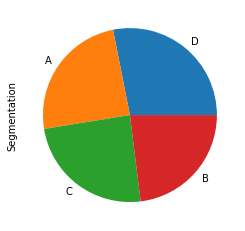

In [53]:
#review variable we are classifying
print(train['Segmentation'].value_counts())
train['Segmentation'].value_counts().plot.pie()

###  Data Cleaning- Duplicates

In [54]:
print('# of duplicate IDs in train data is',sum(train['ID'].value_counts()>1))

print('There are no direct duplicates to remove')

# of duplicate IDs in train data is 0
There are no direct duplicates to remove


In [55]:
#Count where everything is the same but ID
z= train.drop(columns=['ID'])
print('# of rows in train =' , z.shape[0])
print('# of rows in train when duplicate rows (ignoring ID) are droped ' , z.drop_duplicates().shape[0])
print('This tells us there are pottentially ',  z.shape[0] - z.drop_duplicates().shape[0], 'duplicate rows')

#How much does this not explain the data
z= train.drop(columns=['ID', 'Segmentation'])
print('# of rows in train when duplicate rows (ignoring ID, Segmentation) are droped ' , z.drop_duplicates().shape[0])
print('This tells us thereis a variable we are missing out in for at least',  z.shape[0] - z.drop_duplicates().shape[0], 'rows')


# of rows in train = 8068
# of rows in train when duplicate rows (ignoring ID) are droped  7651
This tells us there are pottentially  417 duplicate rows
# of rows in train when duplicate rows (ignoring ID, Segmentation) are droped  7334
This tells us thereis a variable we are missing out in for at least 734 rows


### Data Cleaning- Reducing Number of Nulls

In [56]:
#Print the columns names of the entire dataframe
print(train.columns)
# Review the column names, null value counts and data types of your data frame.
train.info()

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [57]:
# how many null values 
train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

<AxesSubplot:>

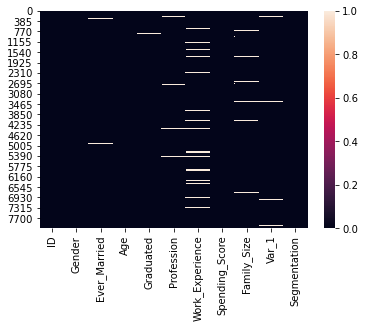

In [58]:
#Visualization to check for missing values
sns.heatmap(train.isna())

Not much overlap on null values in the row so getting rid of all rows with null is not that useful. That said it does mean that if there are more than one null in the row that row is an outlier.

Further most nulls as we can tell are in work experience

In [59]:
train= train.dropna(thresh=8)
train=train.dropna(subset=[n for n in train if n != 'Work_Experience'], thresh=9)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8011 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8011 non-null   int64  
 1   Gender           8011 non-null   object 
 2   Ever_Married     7889 non-null   object 
 3   Age              8011 non-null   int64  
 4   Graduated        7950 non-null   object 
 5   Profession       7910 non-null   object 
 6   Work_Experience  7198 non-null   float64
 7   Spending_Score   8011 non-null   object 
 8   Family_Size      7718 non-null   float64
 9   Var_1            7953 non-null   object 
 10  Segmentation     8011 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 751.0+ KB


Fill category variables for large values with 'Missing'. Exception Var_1 which the company themselves created (as it is our own product). As there are Categories 1 to 6 we make this 'Cat_0'

In [60]:
print(train['Var_1'].value_counts())
train['Ever_Married'] = train['Ever_Married'].fillna('zMissing')
train['Graduated'] = train['Graduated'].fillna('zMissing')
train['Profession'] = train['Profession'].fillna('zMissing')
train['Var_1'] = train['Var_1'].fillna('Cat_0')
train.info()

Cat_6    5226
Cat_4    1079
Cat_3     810
Cat_2     420
Cat_7     201
Cat_1     132
Cat_5      85
Name: Var_1, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8011 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8011 non-null   int64  
 1   Gender           8011 non-null   object 
 2   Ever_Married     8011 non-null   object 
 3   Age              8011 non-null   int64  
 4   Graduated        8011 non-null   object 
 5   Profession       8011 non-null   object 
 6   Work_Experience  7198 non-null   float64
 7   Spending_Score   8011 non-null   object 
 8   Family_Size      7718 non-null   float64
 9   Var_1            8011 non-null   object 
 10  Segmentation     8011 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 751.0+ KB


I will use an iterave imputater on my machine learning classification model for the numerical features that have missing aka "work esperience" and "size"

In [61]:
#finding categorical data
print(train.dtypes)
categorical_features = train.select_dtypes(include=[np.object]).columns
print("total categorical_features",len(categorical_features))

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object
total categorical_features 7


Potentially there are 417 duplicate rows where they randomly got assigned another ID. However we cannot garantee that. 

We also know there is a potential variable missing because there are customers who have all the same features as another customer (barring ID) except for their segmentsegment. 

## EDA 

### Univariate EDA Numerical-  (Also includes outlier data cleaning)

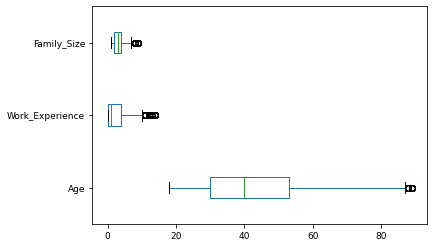

In [62]:
boxplot = train.drop(columns=['ID']).boxplot(grid=False, vert=False,fontsize=9)

In [63]:
train.describe(percentiles= [0.05, .25, .5, .75, 0.95])

ID          Age  Work_Experience  Family_Size
count    8011.000000  8011.000000      7198.000000  7718.000000
mean   463482.863188    43.468730         2.638233     2.849832
std      2593.678626    16.699252         3.406178     1.531618
min    458982.000000    18.000000         0.000000     1.000000
5%     459438.500000    21.000000         0.000000     1.000000
25%    461250.500000    30.000000         0.000000     2.000000
50%    463475.000000    40.000000         1.000000     3.000000
75%    465743.500000    53.000000         4.000000     4.000000
95%    467522.500000    77.000000         9.000000     6.000000
max    467974.000000    89.000000        14.000000     9.000000

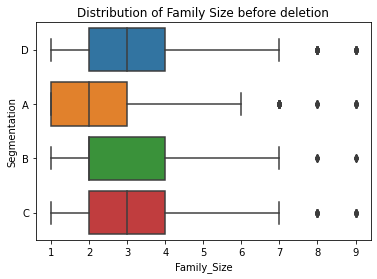

In [64]:
#Investigate Family_Size using boxplot
sns.boxplot(x='Family_Size', y='Segmentation', data=train)
plt.title("Distribution of Family Size before deletion")
plt.show()
#Outliers Ages 8 and 9

In [65]:
#train.groupby('Family_Size').Segmentation.value_counts()
table = pd.pivot_table(train[['Family_Size', 'Segmentation', 'ID']], index=['Family_Size'], columns=['Segmentation'], aggfunc='count')
table

ID               
Segmentation    A    B    C    D
Family_Size                     
1.0           560  362  140  388
2.0           620  620  773  373
3.0           316  331  391  459
4.0           218  299  390  466
5.0            81  136  148  245
6.0            35   39   43   95
7.0            26   14   14   42
8.0             7    5   13   25
9.0            11    4   11   18

#### Outliers Family size
Family Size skew left with over 85% of customers having a family size of 4 or less and only
At Family Size 7 and greater there are less than 3% of the people. That said this a skew not really outliers so I feel no real need to eliminate them.

Text(0.5, 1.0, 'Distribution of Age before deletion')

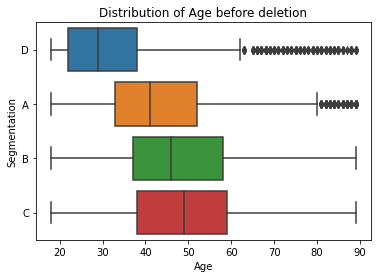

In [66]:
#Investigate Age using boxplot
sns.boxplot(x='Age', y='Segmentation', data=train)
plt.title("Distribution of Age before deletion")


#### Outliers Age
No outliers found. If we look at segment B and C we notice that the entire Age is within the box and whisker's plot. 

Other notes: Age does skew left though for Segment D. Though the skew is not as grand for A they average age is younger for segment A customers than B or C. 

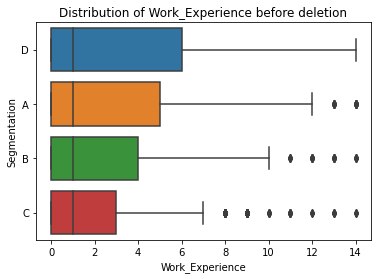

In [67]:
#Investigate Age using boxplot
sns.boxplot(x='Work_Experience', y='Segmentation', data=train)
plt.title("Distribution of Work_Experience before deletion")
plt.show()
#Outliers:NA -Looking at outliers  in Work_Experience from a segmentation point of view we see no outliers in segment D

#### Outliers Work Experience
No outliers found. If we look at segment D we see that the entire work experience range is in the box and whiskers.

#### Notes EDA Univariate Numeric
Segment D skews Young and with large amount of work experience.
Segment A likely has a family size 3 or less, are relatively young and havemore work experience
Segments B and C customers skew older and usually have less work experience than segments D and A

### EDA- Univariate Categorical

In [68]:
# groupby to create another dataframe
def quick_bargraph(q, df):
    """
    Put in variable name and dataset
    ___
    Returns:  count graph, and percent graph
    """
    p= 'Segmentation'
    df_pcts = (df.groupby(q).Segmentation.value_counts(normalize=True).mul(100)
              .unstack().stack(dropna=False).fillna(0)
              .rename('Percent').reset_index())
    df=df.sort_values(by=[q,p])
    df_pcts=df_pcts.sort_values(by=[q,p])
    # create my bar plot
    fig, axs = plt.subplots(2, 2, figsize=(14,5), sharex=True)
    fig.suptitle('{} with regard to {}'.format(p,q), fontsize=16, y=1 , x= 0.45)

    ax1 = plt.subplot(121)

    sns.countplot(x=q ,hue=p, data=df,  hue_order = ['A', 'B','C','D'])
    plt.legend([],[], frameon=False)
    plt.title("As Number of Individiuals")

    # label the bars
    for ps in ax1.patches:
        ax1.text(ps.get_x() + ps.get_width()/2., ps.get_height(), '%d' % round(ps.get_height(), -1), 
            fontsize=10, color='black', ha='center', va='bottom')

    ax2 = plt.subplot(122)
    sns.barplot(x=q, hue=p,  y="Percent", hue_order = ['A', 'B','C','D'] , data=df_pcts, ci = None)
    plt.title("As a Percentage of Inidivduals within {}".format(q))
    yt= 'Percentage (%)'

    # label the bars
    for p in ax2.patches:
        ax2.text(p.get_x() + p.get_width()/2., p.get_height(), '%d%%' % round(p.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')
    plt.legend(bbox_to_anchor=(1.05, 1), title='Segmentation', loc=2, borderaxespad=0.)

    plt.show()


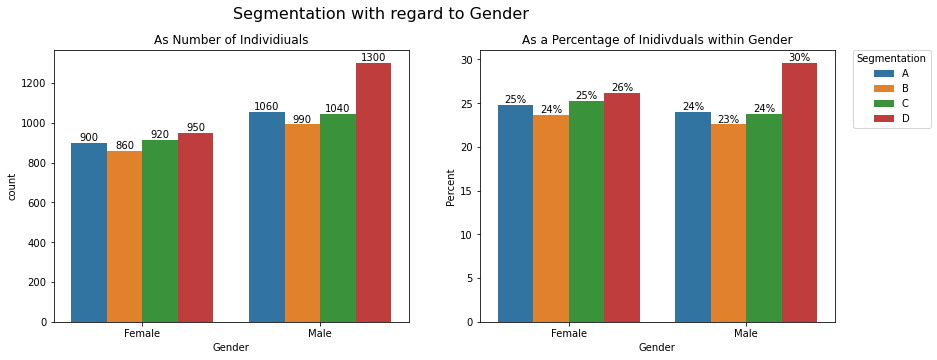

In [69]:
quick_bargraph('Gender', train)

#### Gender Segment 
Overall: More Men clients then female
Men: More likely to be Segment D
Segment D: More likey to be Men

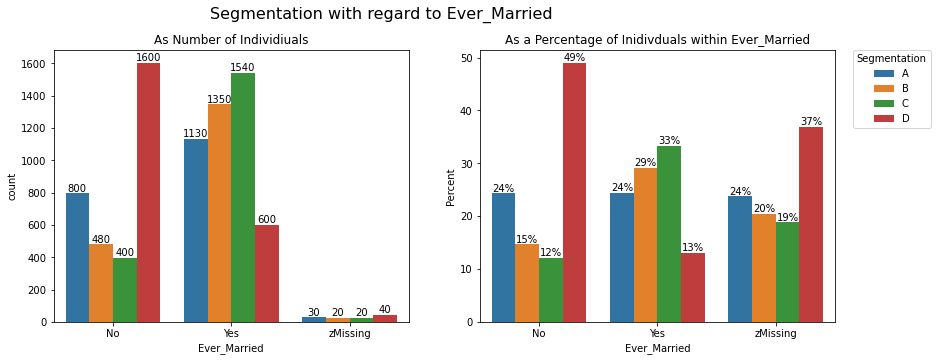

In [70]:
quick_bargraph('Ever_Married', train)

#### Ever Married
Segment D is usually Single: We can see from the above graph that if you are single you have a 50% likelood of being D segmentation. Once you get married that drops to around 13%

Segments B and C: Over a 75% likelyhood of being Married to being single

Segment A: Skews to being Married t

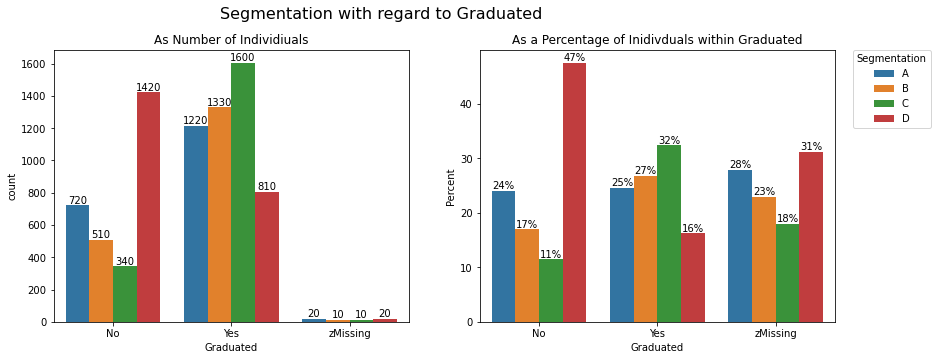

In [71]:
quick_bargraph('Graduated', train)

One key note here is that not graduated and Single seem to act in a simalar matter. We should see if they compound each other's effects

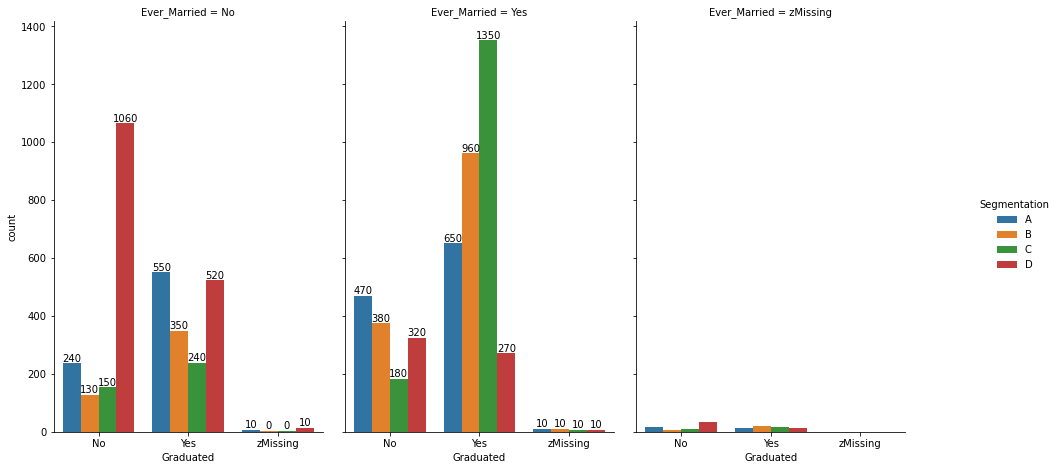

In [72]:
g=sns.catplot(x="Graduated", hue="Segmentation", col="Ever_Married", data=train, hue_order = ['A', 'B','C','D'],
                kind="count", height=4, aspect=.7)

g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)

# extract the matplotlib axes_subplot objects from the FacetGrid
for i in np.arange(2):
    ax = g.facet_axis(0, i)
    # iterate through the axes containers
    for ps in ax.patches:
        ax.text(ps.get_x() + ps.get_width()/2., ps.get_height(), '%d' % round(ps.get_height(), -1), fontsize=10,
                color='black', ha='center', va='bottom')


##### Single and Grduated
Interesting! 

If you are segment C you have a 70% likelihood of being both married and Graduated. While if you are segment D you have a 50% likelihood of being single and not graduated. 

If you are married and you have graduated you are most likely to be in segment C followed B then A. If you are married and not graduated you are most likely segment A

If you are single and you haven't graduated you have a 2 of 3 chance of beind segment D. However if you are single and you have single and gruduated you have an around an 1 of 3 chance of being A or D

Does this have an age Dynamic?

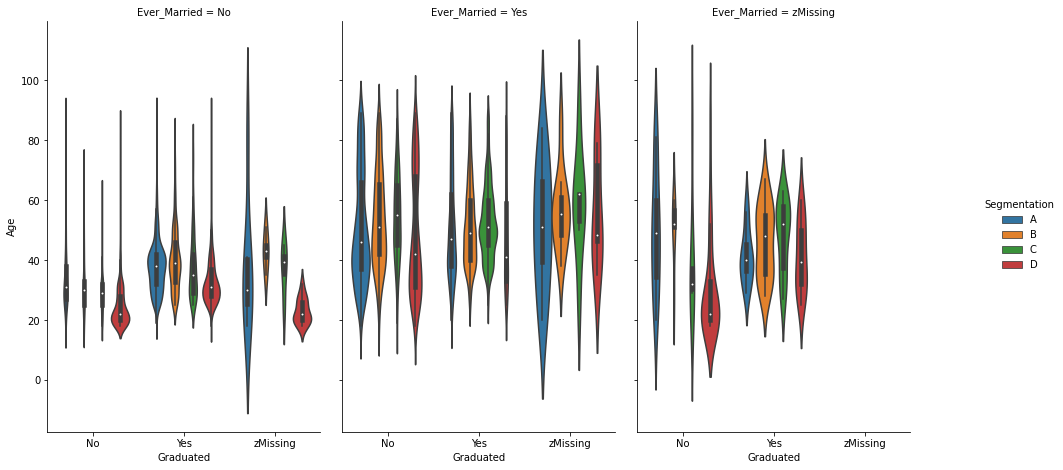

In [73]:
g=sns.catplot(x="Graduated", y='Age', hue="Segmentation", col="Ever_Married", data=train, hue_order = ['A', 'B','C','D'],
                kind="violin", height=4, aspect=.7, scale='count')
g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)

##### Single and Graduated (cont)
It does. D does skew young if you are not married. Orinally we said you had graduated and are not married you have an appromimate equal likelihood of being A or C. Now we can clarify that now . If you graduated, single and under 30 yrs old you are more likely to be in Segment D.  If you graduated, single and over 30 you are more likely to be segment D 

##### Spending Score

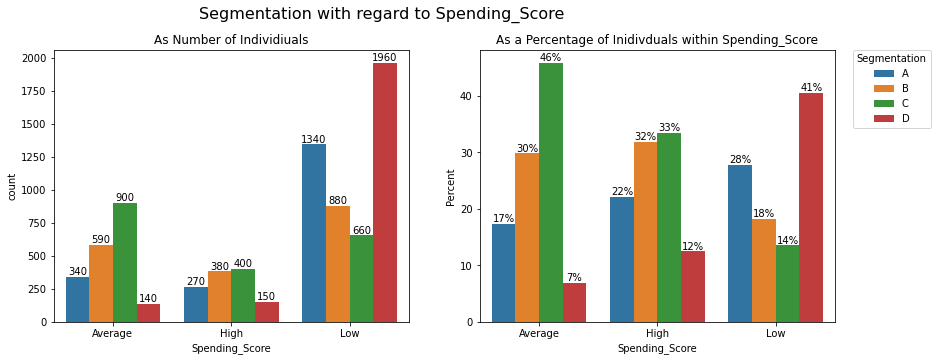

In [74]:
quick_bargraph('Spending_Score', train)

##### Spending Score
Low spending score means likely D followed by A.  Average score means 50% likelihood C. This make

### Bivariate EDA

<AxesSubplot:>

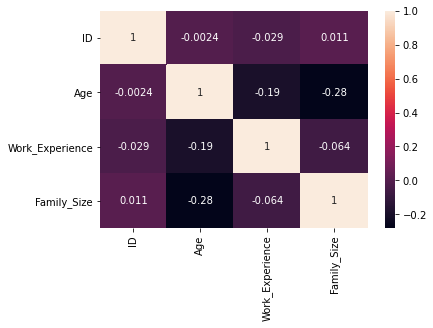

In [75]:
sns.heatmap(train.corr(),annot=True) 
#No really high correlation which is surpising since Age should correlate with work experience

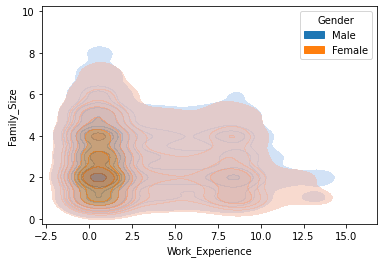

In [76]:
#kde plot Work Experience            
ax= sns.kdeplot(x="Work_Experience", y="Family_Size",data=train, fill= True, hue= 'Gender', alpha=0.5 )
#We see  a huge group ing at family size 3 and 0 to 1 years of work experience. This makes sense

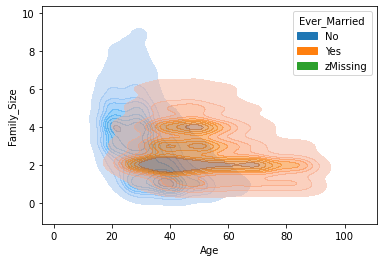

In [77]:
#kde plot            
ax= sns.kdeplot(x="Age", y="Family_Size", hue='Ever_Married', data=train, alpha=0.5, fill= True)

Married and Single act differently with regard to Age and family size. 
If you are single:
* there is a cluster at 1 person family size centered at Age 40. 
* There is a cluster for 2 to 4 person family size centered around ages 20 to 30. 

If you are Married:
* there is a cluster at 2 person family size centered at ages 25 to 40. 
* There is a cluster for 3 person family size ages 30 to 50. 
* There is a cluster for 4 person family size ages 40 to 50. 

This is just demographic info though

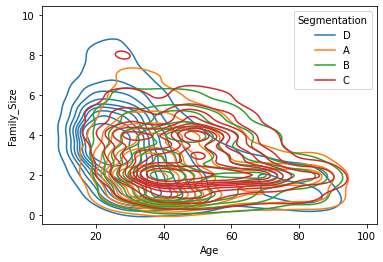

In [78]:
#kde plot            
ax= sns.kdeplot(x="Age", y="Family_Size", hue='Segmentation', data=train, )
#There are clusters with Age and family size but we get a whole lot of nothing when graph them together let's seperate it out

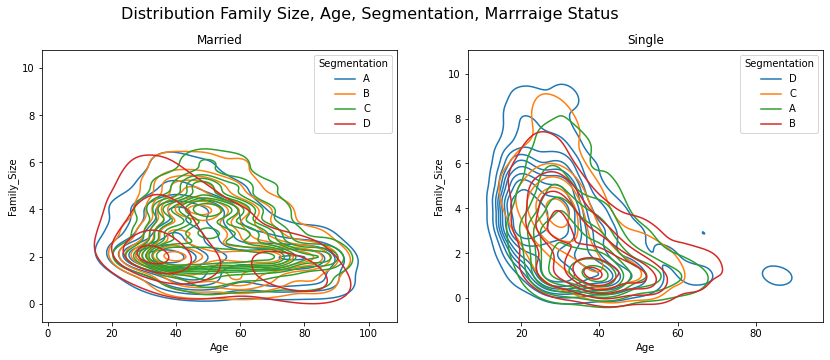

In [79]:
z= train
z['MG']= np.where(z['Ever_Married']=='Yes', np.where(z['Graduated']=='Yes', 'Married Graduate', 'Married Non_Graduate'), np.where(z['Graduated']=='Yes', 'Single Graduate', 'Single Non_Graduate'))

fig, axs = plt.subplots(2, 2, figsize=(14,5), sharey=True) #Create two sub plots sharing x and y axis
fig.suptitle('Distribution Family Size, Age, Segmentation, Marrraige Status', fontsize=16, y=1 , x= 0.45)
from scipy.stats import kde
ax1 = plt.subplot(121)
sns.kdeplot(x="Age", y="Family_Size", hue='Segmentation', data=z[z['Ever_Married']=='Yes'])
plt.title('Married')

ax2 = plt.subplot(122)
# Plot a simple distribution of the desired columns
sns.kdeplot(x="Age", y="Family_Size", hue='Segmentation', data=z[z['Ever_Married']=='No'])
plt.title('Single')
plt.savefig("sample.png")
 #There does appear to be some clear groupings here beyong just single and married.  We will remember this when aking new features

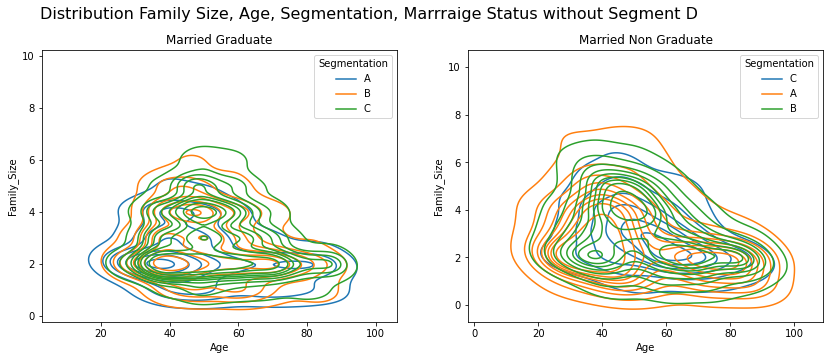

In [80]:
z= train
z['MG']= np.where(z['Ever_Married']=='Yes', np.where(z['Graduated']=='Yes', 'Married Graduate', 'Married Non_Graduate'), np.where(z['Graduated']=='Yes', 'Single Graduate', 'Single Non_Graduate'))

fig, axs = plt.subplots(2, 2, figsize=(14,5)) #Create two sub plots sharing x and y axis
fig.suptitle('Distribution Family Size, Age, Segmentation, Marrraige Status without Segment D', fontsize=16, y=1 , x= 0.45)
from scipy.stats import kde
ax1 = plt.subplot(121)
sns.kdeplot(x="Age", y="Family_Size", hue='Segmentation', data=z[(z['MG']=='Married Graduate') & (z['Segmentation']!='D') ])
plt.title('Married Graduate')

ax2 = plt.subplot(122)
# Plot a simple distribution of the desired columns
sns.kdeplot(x="Age", y="Family_Size", hue='Segmentation', data=z[(z['MG']=='Married Non_Graduate') & (z['Segmentation']!='D')])
plt.title('Married Non Graduate')

plt.savefig("KDE Married Family Size.png")
 #There does appear to be some clear groupings here again this should be put forth

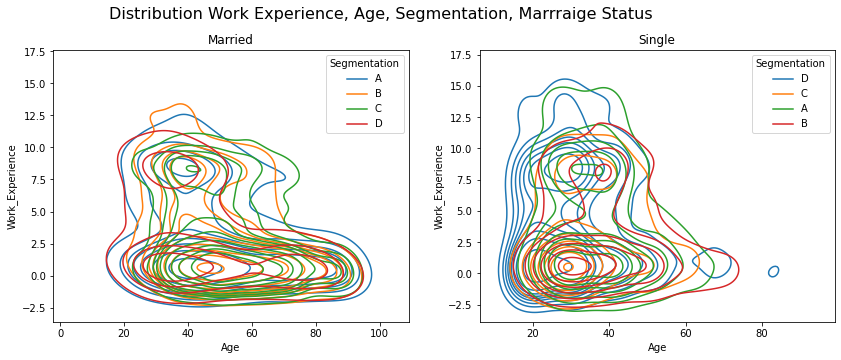

In [81]:
fig, axs = plt.subplots(2, 2, figsize=(14,5), sharey=True) #Create two sub plots sharing x and y axis
fig.suptitle('Distribution Work Experience, Age, Segmentation, Marrraige Status', fontsize=16, y=1 , x= 0.45)
from scipy.stats import kde
ax1 = plt.subplot(121)
sns.kdeplot(x="Age", y="Work_Experience", hue='Segmentation', data=z[z['Ever_Married']=='Yes'])
plt.title('Married')

ax2 = plt.subplot(122)
# Plot a simple distribution of the desired columns
sns.kdeplot(x="Age", y="Work_Experience", hue='Segmentation', data=z[z['Ever_Married']=='No'])
plt.title('Single')
plt.savefig("sample.png")

Errr... We don't get much from looking at the segments with workplace yrs and age even though we know there should be. Does it get clearer if we dig deeper?

Nope. Well we are done with then onto age and family size

#### Additional Data Wrangling

Convert Spending Score to Ordinal, shrink data

In [82]:
file_name_path1 = os.path.join(basepath, sub_file, file1)
file_name_path2 = os.path.join(basepath, sub_file, file2)
train= pd.read_csv(file_name_path1)
test= pd.read_csv(file_name_path2)

#Remove rows with lots of missing
train= train.dropna(thresh=8)
train=train.dropna(subset=[n for n in train if n != 'Work_Experience'], thresh=9)
train.info()

#fill missing
print(train['Segmentation'].value_counts())
train['Ever_Married'] = train['Ever_Married'].fillna('zMissing')
train['Graduated'] = train['Graduated'].fillna('zMissing')
train['Profession'] = train['Profession'].fillna('zMissing')
train['Var_1'] = train['Var_1'].fillna('Cat_0')
train['MG'] = train['Var_1'].fillna('Cat_0')
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8011 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8011 non-null   int64  
 1   Gender           8011 non-null   object 
 2   Ever_Married     7889 non-null   object 
 3   Age              8011 non-null   int64  
 4   Graduated        7950 non-null   object 
 5   Profession       7910 non-null   object 
 6   Work_Experience  7198 non-null   float64
 7   Spending_Score   8011 non-null   object 
 8   Family_Size      7718 non-null   float64
 9   Var_1            7953 non-null   object 
 10  Segmentation     8011 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 751.0+ KB
D    2248
C    1959
A    1954
B    1850
Name: Segmentation, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8011 entries, 0 to 8067
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  

## Pre-Processing

In [83]:
#Spending Score change to Ordinals
train['Spending_Score'] = train['Spending_Score'].replace({'Low':0,'Average':1,'High':2})
train['Spending_Score']=train['Spending_Score'].astype('int')
train['Segmentation']=train['Segmentation'].astype('category')
print(train.Segmentation.value_counts())
#Encode Var_1
train['Var_1']=train['Var_1'].apply(lambda x:x[-1])
train['Var_1']=train['Var_1'].astype('int')
train= train.drop(columns= ['MG'])

#shrink data where we can
#numerical_features = train.select_dtypes(include=['int32', 'int64','float64']).columns.tolist(
# items to be removed
#unwanted_num = {'ID', 'Segmentation'}
#numerical_features = [ele for ele in numerical_features if ele not in unwanted_num]
#numerical_features.remove('ID')
#print(numerical_features)

categorical_features = train.select_dtypes(exclude=['int32', 'int64','float64']).columns.tolist()
for col in categorical_features:
    train[col] = train[col].astype('category')
categorical_features.remove('Segmentation')
print(categorical_features)
print(train.info())
train.head()

D    2248
C    1959
A    1954
B    1850
Name: Segmentation, dtype: int64
['Gender', 'Ever_Married', 'Graduated', 'Profession']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8011 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               8011 non-null   int64   
 1   Gender           8011 non-null   category
 2   Ever_Married     8011 non-null   category
 3   Age              8011 non-null   int64   
 4   Graduated        8011 non-null   category
 5   Profession       8011 non-null   category
 6   Work_Experience  7198 non-null   float64 
 7   Spending_Score   8011 non-null   int32   
 8   Family_Size      7718 non-null   float64 
 9   Var_1            8011 non-null   int32   
 10  Segmentation     8011 non-null   category
dtypes: category(5), float64(2), int32(2), int64(2)
memory usage: 415.5 KB
None


ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

   Spending_Score  Family_Size  Var_1 Segmentation  
0               0          4.0      4            D  
1               1          3.0      4            A  
2               0          1.0      6            B  
3               2          2.0      6            B  
4               2          6.0      6            A

In [84]:
#Train & Test Split
from sklearn.model_selection import train_test_split

label_col = 'Segmentation'
cat_cols =['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1', 'Spending_Score']
train_dummies=pd.get_dummies(train, prefix=cat_cols, columns=cat_cols, drop_first=True) 


df_train1, df_eval1 = train_test_split(train_dummies, test_size=0.25, random_state=101, shuffle=True, stratify=train[label_col])
all_colsz = df_train1.columns.tolist()
print(all_colsz)
feature_cols = df_train1.columns.tolist()
feature_cols.remove('ID')
feature_cols.remove('Segmentation')
df_train1.info()
X_train= df_train1.drop(columns= ['Segmentation', 'ID' ], axis=1)
X_test= df_eval1.drop(columns= ['Segmentation', 'ID' ], axis=1)
y_train= df_train1['Segmentation']
y_test= df_eval1['Segmentation']
print(X_train.info())


['ID', 'Age', 'Work_Experience', 'Family_Size', 'Segmentation', 'Gender_Male', 'Ever_Married_Yes', 'Ever_Married_zMissing', 'Graduated_Yes', 'Graduated_zMissing', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing', 'Profession_zMissing', 'Var_1_1', 'Var_1_2', 'Var_1_3', 'Var_1_4', 'Var_1_5', 'Var_1_6', 'Var_1_7', 'Spending_Score_1', 'Spending_Score_2']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6008 entries, 6173 to 6496
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ID                        6008 non-null   int64   
 1   Age                       6008 non-null   int64   
 2   Work_Experience           5407 non-null   float64 
 3   Family_Size               5797 non-null   float64 
 4   Segmentation              6008 non-null   category
 5   

### Chosing Scaler Standardization

##### Standizing Data
* We have a few methods of standardization to choose from: Robust, Minmax, Normalize and Standardize
* We use Robust if we want to minimize impact of outliers
* We use Normalize if we think the distrubtion within a variable needs to be normalized and/or has a normal distribution
* We use Standardize when we think most of the variables have similar distribution and no/few dummy variables

##### Choosing Min Max Scaler
* The data for price is and age are not a normal destribution we eliminate normalize scaler
* No large outliers as noted earlier so no need for Robust Scaler
* As we have dummy variables we can eliminate standard scaler 
* That leaves us with Min Max scaler

In [85]:
#Things I'll need for Precossing
category_features = X_train.select_dtypes(include=['category']).columns.tolist()
print(category_features)
numerical_features = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
print(numerical_features)

#Family size is a category since it is only whole numbers
cat_cols= ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Family_Size']
num_cols= ['Age', 'Work_Experience']

#Column Order
f1= numerical_features+categorical_features
diff_list = np.setdiff1d(feature_cols,f1).tolist()
f2= f1+diff_list #columns
print(f2)


[]
['Age', 'Work_Experience', 'Family_Size']
['Age', 'Work_Experience', 'Family_Size', 'Gender', 'Ever_Married', 'Graduated', 'Profession', 'Ever_Married_Yes', 'Ever_Married_zMissing', 'Gender_Male', 'Graduated_Yes', 'Graduated_zMissing', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing', 'Profession_zMissing', 'Spending_Score_1', 'Spending_Score_2', 'Var_1_1', 'Var_1_2', 'Var_1_3', 'Var_1_4', 'Var_1_5', 'Var_1_6', 'Var_1_7']


In [86]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer



#Scale and impute for numeric features
#We use median imputer because there are outliers for Age
numerical_features = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

#Categorical Features already turned to dummy features
ct_lgb = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features)],
        remainder='passthrough')


#ct_lgb = ColumnTransformer(
#    transformers=[
#        ('num', numeric_transformer, numerical_features),
#        ('cat', categorical_transformer, categorical_features)], remainder='passthrough')


X_train_lgb= ct_lgb.fit_transform(X_train)
X_test_lgb = ct_lgb.transform(X_test)

f2= X_train.columns.tolist() #get rid of if not ussing dummmies


#turn arrays back into dataframes
X_train_lgb = pd.DataFrame(X_train_lgb, columns=f2)
X_test_lgb  = pd.DataFrame(X_test_lgb, columns=f2)

## Model Building

We are going to start with a Random Forest Model,  light gradient Boosting Model


### Random Forest Base Model

In [402]:
## Import Skills

from sklearn.ensemble import RandomForestClassifier ## gradient boost model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, mean_squared_log_error, mean_squared_error, roc_auc_score, RocCurveDisplay
from sklearn.metrics import accuracy_score, log_loss
import seaborn as sns
from collections import Counter


## Set Params for

params2 = {}
params2['random_state'] = 314
params2['n_estimators'] = 100
max_depth = [6, 9, 12]
min_samples_leafs= [15, 20,25]
 
randfor = RandomForestClassifier(**params2, verbose=3)
rfg = GridSearchCV(randfor, {'min_samples_leaf': min_samples_leafs, 'max_depth': max_depth}
                        , cv=5, scoring='accuracy')
rfg.fit(X_train_lgb, y_train)


# Predict on the test (and training) set to calculate metrics:
y_predict_train_rf = rfg.predict(X_train_lgb)
y_predict_test_rf = rfg.predict(X_test_lgb)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [403]:
print('For Hypertuned Random Forest')
print('Best parameters for min samples leaf, n estimators and max_depth: \n')
print(rfg.best_params_, rfg.best_score_)
print('\nAccuracy Score:')
rf_accuracy_score= accuracy_score(y_predict_test_rf, y_test)
print(rf_accuracy_score)
print("\n[Training Classification Report:]")
print(classification_report(y_train, y_predict_train_rf))
print("[Test Classification Report:]")
print(classification_report(y_test, y_predict_test_rf))

For Hypertuned Random Forest
Best parameters for min samples leaf, n estimators and max_depth: 

{'max_depth': 12, 'min_samples_leaf': 15} 0.5161451702061927

Accuracy Score:
0.5222166749875187

[Training Classification Report:]
              precision    recall  f1-score   support

           A       0.49      0.55      0.51      1465
           B       0.50      0.29      0.37      1388
           C       0.57      0.64      0.60      1469
           D       0.65      0.73      0.69      1686

    accuracy                           0.56      6008
   macro avg       0.55      0.55      0.54      6008
weighted avg       0.55      0.56      0.55      6008

[Test Classification Report:]
              precision    recall  f1-score   support

           A       0.43      0.48      0.45       489
           B       0.42      0.25      0.31       462
           C       0.53      0.60      0.56       490
           D       0.64      0.72      0.68       562

    accuracy                      

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Accuracy of Random Forest Classifier 52.42136794807788
ROC AUC score for class A is 0.64
ROC AUC score for class B is 0.58
ROC AUC score for class C is 0.71
ROC AUC score for class D is 0.78


Text(0.5, 1.0, 'ROC AUC Score')

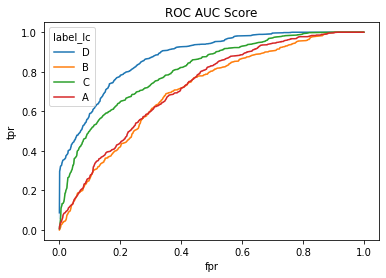

In [241]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, RocCurveDisplay, PrecisionRecallDisplay, plot_roc_curve

proba_rfg = rfg.predict_proba(X_test_lgb)
print("Accuracy of Random Forest Classifier", accuracy_score(y_test, y_predict_test_rf) * 100)
classes = rfg.classes_
cmapx = ['Orange', 'Green', 'Red', 'Blue' ]
data = []
dic_a = {}
dict_auc = {}
for i in range(len(classes)):
    y_score_rfg = proba_rfg[:,i]
    cl_i = classes[i]
    prec_rfg, recall_rfg, _ = precision_recall_curve(y_test, y_score_rfg, pos_label=cl_i)
    fpr_rfg, tpr_rfg, _ = roc_curve(y_test, y_score_rfg, pos_label=cl_i)
    a1= zip(prec_rfg, recall_rfg, fpr_rfg, tpr_rfg)
    df2= pd.DataFrame(a1, columns=['prec', 'recall', 'fpr', 'tpr'])
    auc = roc_auc_score(y_test==cl_i,y_predict_test_rf==cl_i)
    dict_auc[cl_i] = auc 
    df2['label_lc'] = classes[i]
    dic_a[cl_i] = df2

df1= dic_a['D'].append([dic_a['B'], dic_a['C'], dic_a['A']])

for i in range(len(classes)):
    cl_i = classes[i]
    print('ROC AUC score for class {} is {:.2f}'.format(cl_i, dict_auc[cl_i]))
sns.lineplot(x = 'fpr', y = 'tpr', data=df1, hue='label_lc')
plt.title('ROC AUC Score')

Random Forest has decent accuracy predicting class C and D not so well with classes A and B

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Accuracy of Random Forest Classifier 52.42136794807788
['A' 'B' 'C' 'D']


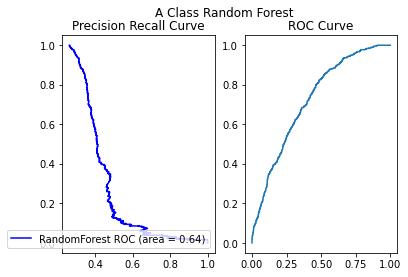

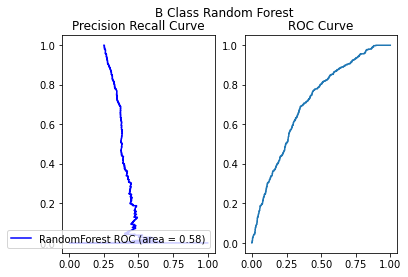

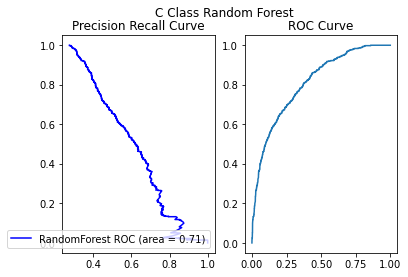

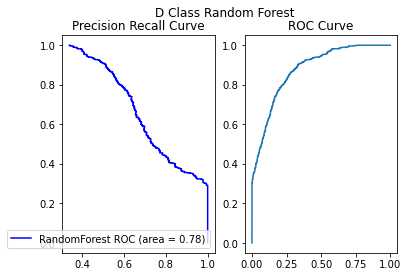

In [242]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, RocCurveDisplay, PrecisionRecallDisplay, plot_roc_curve

proba_rfg = rfg.predict_proba(X_test_lgb)
print("Accuracy of Random Forest Classifier", accuracy_score(y_test, y_predict_test_rf) * 100)
classes = rfg.classes_
print(classes)


for i in range(len(classes)):
    y_score_rfg = proba_rfg[:,i]
    cl_i = classes[i]
    prec_rfg, recall_rfg, _ = precision_recall_curve(y_test, y_score_rfg, pos_label=cl_i)
    fpr_rfg, tpr_rfg, _ = roc_curve(y_test, y_score_rfg, pos_label=cl_i)
    fig, (ax1, ax2) = plt.subplots(2, 2, sharey=True)
    fig.suptitle('{} Class Random Forest'.format(cl_i) )
    ax1 = plt.subplot(121)
    auc = roc_auc_score(y_test==cl_i,y_predict_test_rf==cl_i)
    plt.plot(prec_rfg, recall_rfg, label='%s ROC (area = %0.2f)' % ('RandomForest', auc), c='blue')
    plt.legend(loc="lower right")
    #pr_display = PrecisionRecallDisplay(precision=prec_rfg, recall=recall_rfg).plot(ax=ax1)
    plt.title('Precision Recall Curve' .format(cl_i) )
    ax2 = plt.subplot(122)
    plt.plot(fpr_rfg, tpr_rfg, label='%s ROC (area = %0.2f)' % ('RandomForest', auc))
    plt.title('ROC Curve' .format(cl_i))
    plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


LGB GS boost AUC = 0.518
[[0.45398773 0.15337423 0.16768916 0.22494888]
 [0.28354978 0.30519481 0.29220779 0.11904762]
 [0.13469388 0.16938776 0.56530612 0.13061224]
 [0.22597865 0.03558719 0.03202847 0.70640569]]


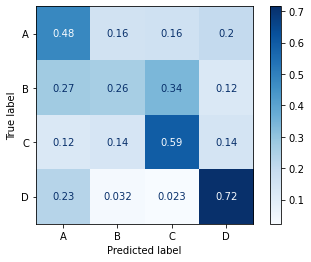

In [243]:
plot_confusion_matrix(rfg, X_test_lgb, y_test, display_labels=classes, cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('Random Forrest Confusion matrix, with hypertuning')
print(title)
print(disp.confusion_matrix)


### LightGBM Base Model - gradient boosted decision trees

In [346]:
## Import Skills

import lightgbm as lgb ## gradient boost model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, mean_squared_log_error, mean_squared_error, roc_auc_score
from sklearn.metrics import accuracy_score, log_loss
import seaborn as sns
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

## Set Params for

params = {}
params['random_state'] = 314
params['n_estimators'] = 100
params['num_class'] = 4
params['objective'] = 'multiclass'




In [315]:
clf = lgb.LGBMClassifier(**params)
# Predict on the test (and training) se
#clf.fit(X_train_lgb, y_train, early_stopping_rounds=100, eval_set=[(X_train_lgb, y_train), (X_test_lgb, y_test)], eval_metric='multi_error', verbose=True, categorical_feature=cat_cols)
clf.fit(X_train_lgb, y_train, early_stopping_rounds=100, eval_set=[(X_train_lgb, y_train), (X_test_lgb, y_test)], eval_metric='multi_error', verbose=True)

y_pred_LGB =clf.predict(X_test_lgb)
eval_score = accuracy_score(y_test, y_pred_LGB)

print('Eval ACC: {}'.format(eval_score))


[1]	training's multi_error: 0.54494	training's multi_logloss: 1.32121	valid_1's multi_error: 0.568647	valid_1's multi_logloss: 1.3266
Training until validation scores don't improve for 100 rounds
[2]	training's multi_error: 0.478695	training's multi_logloss: 1.27218	valid_1's multi_error: 0.513729	valid_1's multi_logloss: 1.28327
[3]	training's multi_error: 0.457057	training's multi_logloss: 1.23213	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.24791
[4]	training's multi_error: 0.450233	training's multi_logloss: 1.19862	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.21976
[5]	training's multi_error: 0.451232	training's multi_logloss: 1.17011	valid_1's multi_error: 0.496755	valid_1's multi_logloss: 1.19611
[6]	training's multi_error: 0.445406	training's multi_logloss: 1.14604	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.17617
[7]	training's multi_error: 0.441744	training's multi_logloss: 1.12483	valid_1's multi_error: 0.484773	valid_1's multi_loglo

[60]	training's multi_error: 0.343209	training's multi_logloss: 0.844781	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.0534
[61]	training's multi_error: 0.340879	training's multi_logloss: 0.842689	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.05302
[62]	training's multi_error: 0.340213	training's multi_logloss: 0.840018	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.0531
[63]	training's multi_error: 0.338049	training's multi_logloss: 0.837729	valid_1's multi_error: 0.478782	valid_1's multi_logloss: 1.0538
[64]	training's multi_error: 0.336551	training's multi_logloss: 0.83571	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.05412
[65]	training's multi_error: 0.336218	training's multi_logloss: 0.833767	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.05454
[66]	training's multi_error: 0.334387	training's multi_logloss: 0.831251	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.05517
[67]	training's multi_error: 0.33239	tr

Accuracy of LGB Classifier 50.923614578132806


KeyboardInterrupt: 

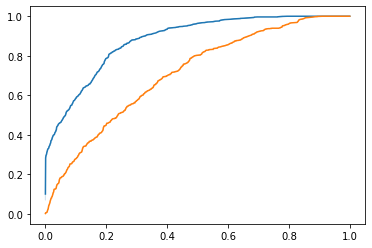

In [316]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, RocCurveDisplay, PrecisionRecallDisplay, plot_roc_curve

proba_lgb = clf.predict_proba(X_test_lgb)
print("Accuracy of LGB Classifier", accuracy_score(y_test, y_pred_LGB) * 100)
data = []
dic_lgb = {}
dict_auc_lgb = {}
for i in range(len(classes)):
    y_score_lgb = proba_lgb[:,i]
    cl_i = classes[i]
    prec_lgb, recall_lgb, _ = precision_recall_curve(y_test, y_score_lgb, pos_label=cl_i)
    fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_score_lgb, pos_label=cl_i)
    a1= zip(prec_lgb, recall_lgb, fpr_lgb, tpr_lgb)
    df2= pd.DataFrame(a1, columns=['prec', 'recall', 'fpr', 'tpr'])
    df2['label_lc'] = classes[i]
    dic_lgb[cl_i] = df2
    auc = roc_auc_score(y_test==cl_i,y_pred_LGB==cl_i)
    dict_auc_lgb[cl_i] = auc 
df_lgb= dic_lgb['D'].append([dic_lgb['B'], dic_lgb['C'], dic_lgb['A']])
sns.lineplot(x = 'fpr', y = 'tpr', data=df_lgb, hue='label_lc')
for i in range(len(classes)):
    cl_i = classes[i]
    print('ROC AUC score for class {} is {:.2f}'.format(cl_i, dict_auc_lgb[cl_i]))


Light GBM is also better at at predicting classes D and C and not so much A and B

### LightGBM base - Hyper Parameter Tuning

In [407]:
params = {}
params['random_state'] = 314
params['n_estimators'] = 100
params['num_class'] = 4
params['objective'] = 'multiclass'
params['learning_rate'] = 0.04
params['feature_fraction']=0.7
params['reg_lambda'] = 1.1
params['reg_alpha'] = 0


min_data_in_leafs = [50, 60, 75]
max_depth = [6, 9, 12]


clf1 = lgb.LGBMClassifier(**params)
clf_grid = GridSearchCV(clf1, { 'min_data_in_leaf': min_data_in_leafs, 'max_depth': max_depth}
                        , cv=5, scoring='accuracy')
clf_grid.fit(X_train_lgb, y_train, early_stopping_rounds=50, eval_set=[(X_train_lgb, y_train), (X_test_lgb, y_test)], eval_metric='multi_error', verbose=True)


# Predict on the test (and training) set to calculate metrics:
y_predict_train = clf_grid.predict(X_train_lgb)
y_predict_test = clf_grid.predict(X_test_lgb)


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36245	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.3635
Training until validation scores don't improve for 50 rounds
[2]	valid_0's multi_error: 0.626498	valid_0's multi_logloss: 1.34309	valid_1's multi_error: 0.627559	valid_1's multi_logloss: 1.34516
[3]	valid_0's multi_error: 0.56508	valid_0's multi_logloss: 1.32593	valid_1's multi_error: 0.579631	valid_1's multi_logloss: 1.32896
[4]	valid_0's multi_error: 0.534621	valid_0's multi_logloss: 1.31003	valid_1's multi_error: 0.55317	valid_1's multi_logloss: 1.31409
[5]	valid_0's multi_error: 0.5

[63]	valid_0's multi_error: 0.439747	valid_0's multi_logloss: 1.02773	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.07862
[64]	valid_0's multi_error: 0.439081	valid_0's multi_logloss: 1.02653	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.07802
[65]	valid_0's multi_error: 0.438415	valid_0's multi_logloss: 1.02529	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.07728
[66]	valid_0's multi_error: 0.436585	valid_0's multi_logloss: 1.02387	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.07654
[67]	valid_0's multi_error: 0.435752	valid_0's multi_logloss: 1.02264	valid_1's multi_error: 0.477783	valid_1's multi_logloss: 1.07589
[68]	valid_0's multi_error: 0.435419	valid_0's multi_logloss: 1.02156	valid_1's multi_error: 0.47978	valid_1's multi_logloss: 1.07537
[69]	valid_0's multi_error: 0.434088	valid_0's multi_logloss: 1.02046	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.07478
[70]	valid_0's multi_error: 0.434088	valid_0's multi_log

[29]	valid_0's multi_error: 0.459387	valid_0's multi_logloss: 1.10898	valid_1's multi_error: 0.496256	valid_1's multi_logloss: 1.13632
[30]	valid_0's multi_error: 0.458056	valid_0's multi_logloss: 1.10518	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.13361
[31]	valid_0's multi_error: 0.456558	valid_0's multi_logloss: 1.10129	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.13046
[32]	valid_0's multi_error: 0.457723	valid_0's multi_logloss: 1.09739	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.12733
[33]	valid_0's multi_error: 0.457057	valid_0's multi_logloss: 1.09384	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.12437
[34]	valid_0's multi_error: 0.455559	valid_0's multi_logloss: 1.09056	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.12155
[35]	valid_0's multi_error: 0.455892	valid_0's multi_logloss: 1.08736	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.11919
[36]	valid_0's multi_error: 0.455393	valid_0's multi_log

[98]	valid_0's multi_error: 0.429095	valid_0's multi_logloss: 0.993856	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.06478
[99]	valid_0's multi_error: 0.428262	valid_0's multi_logloss: 0.993074	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.06471
[100]	valid_0's multi_error: 0.427763	valid_0's multi_logloss: 0.992375	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.06451
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_error: 0.427763	valid_0's multi_logloss: 0.992375	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.06451
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.7

[54]	valid_0's multi_error: 0.446738	valid_0's multi_logloss: 1.04117	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.08592
[55]	valid_0's multi_error: 0.444907	valid_0's multi_logloss: 1.03929	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.08479
[56]	valid_0's multi_error: 0.44474	valid_0's multi_logloss: 1.03785	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.08416
[57]	valid_0's multi_error: 0.444241	valid_0's multi_logloss: 1.03629	valid_1's multi_error: 0.477783	valid_1's multi_logloss: 1.08328
[58]	valid_0's multi_error: 0.443575	valid_0's multi_logloss: 1.03473	valid_1's multi_error: 0.478283	valid_1's multi_logloss: 1.08228
[59]	valid_0's multi_error: 0.443575	valid_0's multi_logloss: 1.03331	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.08163
[60]	valid_0's multi_error: 0.442909	valid_0's multi_logloss: 1.03172	valid_1's multi_error: 0.478782	valid_1's multi_logloss: 1.08075
[61]	valid_0's multi_error: 0.442743	valid_0's multi_log

[16]	valid_0's multi_error: 0.467377	valid_0's multi_logloss: 1.17906	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.19488
[17]	valid_0's multi_error: 0.465879	valid_0's multi_logloss: 1.17192	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.18842
[18]	valid_0's multi_error: 0.465047	valid_0's multi_logloss: 1.16493	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.18187
[19]	valid_0's multi_error: 0.464048	valid_0's multi_logloss: 1.15869	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.17672
[20]	valid_0's multi_error: 0.463216	valid_0's multi_logloss: 1.15222	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.17123
[21]	valid_0's multi_error: 0.464381	valid_0's multi_logloss: 1.14595	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.16573
[22]	valid_0's multi_error: 0.462383	valid_0's multi_logloss: 1.13999	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.16062
[23]	valid_0's multi_error: 0.461884	valid_0's multi_lo

[88]	valid_0's multi_error: 0.429261	valid_0's multi_logloss: 0.998957	valid_1's multi_error: 0.474788	valid_1's multi_logloss: 1.06699
[89]	valid_0's multi_error: 0.428096	valid_0's multi_logloss: 0.997969	valid_1's multi_error: 0.474788	valid_1's multi_logloss: 1.06677
[90]	valid_0's multi_error: 0.428762	valid_0's multi_logloss: 0.997109	valid_1's multi_error: 0.473789	valid_1's multi_logloss: 1.06642
[91]	valid_0's multi_error: 0.429095	valid_0's multi_logloss: 0.996275	valid_1's multi_error: 0.473789	valid_1's multi_logloss: 1.06618
[92]	valid_0's multi_error: 0.427929	valid_0's multi_logloss: 0.995317	valid_1's multi_error: 0.473789	valid_1's multi_logloss: 1.06574
[93]	valid_0's multi_error: 0.427597	valid_0's multi_logloss: 0.994331	valid_1's multi_error: 0.472292	valid_1's multi_logloss: 1.06554
[94]	valid_0's multi_error: 0.426764	valid_0's multi_logloss: 0.993439	valid_1's multi_error: 0.471293	valid_1's multi_logloss: 1.06522
[95]	valid_0's multi_error: 0.426598	valid_0's m

[54]	valid_0's multi_error: 0.443908	valid_0's multi_logloss: 1.04173	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.08609
[55]	valid_0's multi_error: 0.442577	valid_0's multi_logloss: 1.0398	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.085
[56]	valid_0's multi_error: 0.441079	valid_0's multi_logloss: 1.03823	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.08409
[57]	valid_0's multi_error: 0.44241	valid_0's multi_logloss: 1.03662	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.08315
[58]	valid_0's multi_error: 0.441578	valid_0's multi_logloss: 1.03489	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.08199
[59]	valid_0's multi_error: 0.441744	valid_0's multi_logloss: 1.03332	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.08118
[60]	valid_0's multi_error: 0.441578	valid_0's multi_logloss: 1.0317	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.08037
[61]	valid_0's multi_error: 0.441245	valid_0's multi_logloss

[20]	valid_0's multi_error: 0.46255	valid_0's multi_logloss: 1.15727	valid_1's multi_error: 0.496256	valid_1's multi_logloss: 1.17544
[21]	valid_0's multi_error: 0.459387	valid_0's multi_logloss: 1.15117	valid_1's multi_error: 0.496755	valid_1's multi_logloss: 1.17026
[22]	valid_0's multi_error: 0.461218	valid_0's multi_logloss: 1.1451	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.16502
[23]	valid_0's multi_error: 0.46022	valid_0's multi_logloss: 1.13951	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.16022
[24]	valid_0's multi_error: 0.458389	valid_0's multi_logloss: 1.13391	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.15554
[25]	valid_0's multi_error: 0.458722	valid_0's multi_logloss: 1.12952	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.15211
[26]	valid_0's multi_error: 0.457889	valid_0's multi_logloss: 1.12459	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.1481
[27]	valid_0's multi_error: 0.458555	valid_0's multi_loglos

[85]	valid_0's multi_error: 0.431258	valid_0's multi_logloss: 1.00947	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.06804
[86]	valid_0's multi_error: 0.429927	valid_0's multi_logloss: 1.0086	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.06754
[87]	valid_0's multi_error: 0.430759	valid_0's multi_logloss: 1.00787	valid_1's multi_error: 0.47978	valid_1's multi_logloss: 1.06712
[88]	valid_0's multi_error: 0.430759	valid_0's multi_logloss: 1.00724	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.06687
[89]	valid_0's multi_error: 0.429927	valid_0's multi_logloss: 1.00626	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.06656
[90]	valid_0's multi_error: 0.43026	valid_0's multi_logloss: 1.00552	valid_1's multi_error: 0.478782	valid_1's multi_logloss: 1.06618
[91]	valid_0's multi_error: 0.429927	valid_0's multi_logloss: 1.00468	valid_1's multi_error: 0.477284	valid_1's multi_logloss: 1.06576
[92]	valid_0's multi_error: 0.429594	valid_0's multi_loglo

[46]	valid_0's multi_error: 0.453063	valid_0's multi_logloss: 1.06286	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.10019
[47]	valid_0's multi_error: 0.452896	valid_0's multi_logloss: 1.06095	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.0991
[48]	valid_0's multi_error: 0.453728	valid_0's multi_logloss: 1.05882	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.09734
[49]	valid_0's multi_error: 0.451897	valid_0's multi_logloss: 1.05721	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.09616
[50]	valid_0's multi_error: 0.452896	valid_0's multi_logloss: 1.05521	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.095
[51]	valid_0's multi_error: 0.452064	valid_0's multi_logloss: 1.05311	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.09365
[52]	valid_0's multi_error: 0.451232	valid_0's multi_logloss: 1.05157	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.09302
[53]	valid_0's multi_error: 0.450899	valid_0's multi_loglo

[15]	valid_0's multi_error: 0.467044	valid_0's multi_logloss: 1.19027	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.20409
[16]	valid_0's multi_error: 0.467377	valid_0's multi_logloss: 1.18231	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.19664
[17]	valid_0's multi_error: 0.466045	valid_0's multi_logloss: 1.17435	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.18932
[18]	valid_0's multi_error: 0.465879	valid_0's multi_logloss: 1.16742	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.18313
[19]	valid_0's multi_error: 0.466045	valid_0's multi_logloss: 1.1606	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.17752
[20]	valid_0's multi_error: 0.464547	valid_0's multi_logloss: 1.15423	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.1716
[21]	valid_0's multi_error: 0.463049	valid_0's multi_logloss: 1.14818	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.16633
[22]	valid_0's multi_error: 0.463881	valid_0's multi_loglo

[95]	valid_0's multi_error: 0.435586	valid_0's multi_logloss: 1.00017	valid_1's multi_error: 0.47329	valid_1's multi_logloss: 1.06673
[96]	valid_0's multi_error: 0.435087	valid_0's multi_logloss: 0.999347	valid_1's multi_error: 0.474289	valid_1's multi_logloss: 1.06645
[97]	valid_0's multi_error: 0.435419	valid_0's multi_logloss: 0.998581	valid_1's multi_error: 0.475786	valid_1's multi_logloss: 1.06627
[98]	valid_0's multi_error: 0.435586	valid_0's multi_logloss: 0.997854	valid_1's multi_error: 0.474788	valid_1's multi_logloss: 1.06626
[99]	valid_0's multi_error: 0.435253	valid_0's multi_logloss: 0.997134	valid_1's multi_error: 0.474788	valid_1's multi_logloss: 1.06618
[100]	valid_0's multi_error: 0.435586	valid_0's multi_logloss: 0.996312	valid_1's multi_error: 0.476286	valid_1's multi_logloss: 1.06591
Did not meet early stopping. Best iteration is:
[96]	valid_0's multi_error: 0.435087	valid_0's multi_logloss: 0.999347	valid_1's multi_error: 0.474289	valid_1's multi_logloss: 1.06645
[

[72]	valid_0's multi_error: 0.438083	valid_0's multi_logloss: 1.02177	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.07506
[73]	valid_0's multi_error: 0.437417	valid_0's multi_logloss: 1.0208	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.07481
[74]	valid_0's multi_error: 0.436085	valid_0's multi_logloss: 1.01968	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.07424
[75]	valid_0's multi_error: 0.436252	valid_0's multi_logloss: 1.01875	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.07389
[76]	valid_0's multi_error: 0.436585	valid_0's multi_logloss: 1.01774	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.0736
[77]	valid_0's multi_error: 0.435419	valid_0's multi_logloss: 1.01667	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.07316
[78]	valid_0's multi_error: 0.434587	valid_0's multi_logloss: 1.01552	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.07246
[79]	valid_0's multi_error: 0.434088	valid_0's multi_loglo

[40]	valid_0's multi_error: 0.452064	valid_0's multi_logloss: 1.07455	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.10909
[41]	valid_0's multi_error: 0.452563	valid_0's multi_logloss: 1.07197	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.1075
[42]	valid_0's multi_error: 0.4499	valid_0's multi_logloss: 1.06961	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.10587
[43]	valid_0's multi_error: 0.448735	valid_0's multi_logloss: 1.06728	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.10443
[44]	valid_0's multi_error: 0.450899	valid_0's multi_logloss: 1.06502	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.10267
[45]	valid_0's multi_error: 0.4499	valid_0's multi_logloss: 1.06282	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.10109
[46]	valid_0's multi_error: 0.448236	valid_0's multi_logloss: 1.06096	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.09975
[47]	valid_0's multi_error: 0.447903	valid_0's multi_logloss: 

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36495	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36574
Training until validation scores don't improve for 50 rounds
[2]	valid_0's multi_error: 0.62783	valid_0's multi_logloss: 1.3451	valid_1's multi_error: 0.625562	valid_1's multi_logloss: 1.34653
[3]	valid_0's multi_error: 0.579394	valid_0's multi_logloss: 1.32887	valid_1's multi_error: 0.583125	valid_1's multi_logloss: 1.33106
[4]	valid_0's multi_error: 0.527796	valid_0's multi_logloss: 1.31211	valid_1's multi_error: 0.54668	valid_1's multi_logloss: 1.31494
[5]	valid_0's multi_error: 0.5

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36369	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36484
Training until validation scores don't improve for 50 rounds
[2]	valid_0's multi_error: 0.619674	valid_0's multi_logloss: 1.34442	valid_1's multi_error: 0.623065	valid_1's multi_logloss: 1.34617
[3]	valid_0's multi_error: 0.583222	valid_0's multi_logloss: 1.32814	valid_1's multi_error: 0.590115	valid_1's multi_logloss: 1.33074
[4]	valid_0's multi_error: 0.542111	valid_0's multi_logloss: 1.31127	valid_1's multi_error: 0.549675	valid_1's multi_logloss: 1.31511
[5]	valid_0's multi_error: 

[79]	valid_0's multi_error: 0.43775	valid_0's multi_logloss: 1.02146	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.07367
[80]	valid_0's multi_error: 0.438083	valid_0's multi_logloss: 1.02049	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.07312
[81]	valid_0's multi_error: 0.438582	valid_0's multi_logloss: 1.0196	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.07266
[82]	valid_0's multi_error: 0.439414	valid_0's multi_logloss: 1.0187	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.07223
[83]	valid_0's multi_error: 0.438748	valid_0's multi_logloss: 1.01769	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.07148
[84]	valid_0's multi_error: 0.438083	valid_0's multi_logloss: 1.01669	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.07093
[85]	valid_0's multi_error: 0.438083	valid_0's multi_logloss: 1.01585	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.07059
[86]	valid_0's multi_error: 0.438083	valid_0's multi_loglo

[43]	valid_0's multi_error: 0.451398	valid_0's multi_logloss: 1.07134	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.10269
[44]	valid_0's multi_error: 0.449734	valid_0's multi_logloss: 1.06909	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.10108
[45]	valid_0's multi_error: 0.448569	valid_0's multi_logloss: 1.067	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.09943
[46]	valid_0's multi_error: 0.447403	valid_0's multi_logloss: 1.06497	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.0983
[47]	valid_0's multi_error: 0.448402	valid_0's multi_logloss: 1.06251	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.09649
[48]	valid_0's multi_error: 0.448901	valid_0's multi_logloss: 1.06061	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.09545
[49]	valid_0's multi_error: 0.447903	valid_0's multi_logloss: 1.05879	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.09412
[50]	valid_0's multi_error: 0.448402	valid_0's multi_loglo

[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36202	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36285
Training until validation scores don't improve for 50 rounds
[2]	valid_0's multi_error: 0.626165	valid_0's multi_logloss: 1.34223	valid_1's multi_error: 0.628557	valid_1's multi_logloss: 1.34416
[3]	valid_0's multi_error: 0.565579	valid_0's multi_logloss: 1.32732	valid_1's multi_error: 0.577634	valid_1's multi_logloss: 1.32954
[4]	valid_0's multi_error: 0.53279	valid_0's multi_logloss: 1.31297	valid_1's multi_error: 0.547179	valid_1's multi_logloss: 1.31697
[5]	valid_0's multi_error: 0.515979	valid_0's multi_logloss: 1.2972	valid_1's multi_error: 0.534199	valid_1's multi_logloss: 1.30223
[6]	valid_0's multi_error: 0.492177	valid_0's multi_logloss: 1.28246	valid_1's multi_error: 0.525711	valid_1's multi_logloss: 1.28809
[7]	valid_0's multi_error: 0.478362	valid_0's multi_logloss: 1.26909	valid_1's multi_error: 0.512232	valid_1's multi_logloss: 1.27529
[8]

[75]	valid_0's multi_error: 0.441578	valid_0's multi_logloss: 1.02172	valid_1's multi_error: 0.477783	valid_1's multi_logloss: 1.0729
[76]	valid_0's multi_error: 0.441079	valid_0's multi_logloss: 1.02081	valid_1's multi_error: 0.477284	valid_1's multi_logloss: 1.07239
[77]	valid_0's multi_error: 0.441079	valid_0's multi_logloss: 1.01991	valid_1's multi_error: 0.477783	valid_1's multi_logloss: 1.07199
[78]	valid_0's multi_error: 0.440413	valid_0's multi_logloss: 1.01892	valid_1's multi_error: 0.475786	valid_1's multi_logloss: 1.07158
[79]	valid_0's multi_error: 0.439414	valid_0's multi_logloss: 1.01788	valid_1's multi_error: 0.477284	valid_1's multi_logloss: 1.07102
[80]	valid_0's multi_error: 0.438915	valid_0's multi_logloss: 1.0169	valid_1's multi_error: 0.477783	valid_1's multi_logloss: 1.07057
[81]	valid_0's multi_error: 0.437417	valid_0's multi_logloss: 1.01588	valid_1's multi_error: 0.476286	valid_1's multi_logloss: 1.07012
[82]	valid_0's multi_error: 0.436252	valid_0's multi_logl

[47]	valid_0's multi_error: 0.454228	valid_0's multi_logloss: 1.0655	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.09913
[48]	valid_0's multi_error: 0.45273	valid_0's multi_logloss: 1.06352	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.09772
[49]	valid_0's multi_error: 0.451731	valid_0's multi_logloss: 1.06167	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.09627
[50]	valid_0's multi_error: 0.452896	valid_0's multi_logloss: 1.05994	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.09494
[51]	valid_0's multi_error: 0.451565	valid_0's multi_logloss: 1.0576	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.093
[52]	valid_0's multi_error: 0.451398	valid_0's multi_logloss: 1.05604	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.09198
[53]	valid_0's multi_error: 0.451232	valid_0's multi_logloss: 1.05403	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.09048
[54]	valid_0's multi_error: 0.450899	valid_0's multi_logloss: 

[23]	valid_0's multi_error: 0.446571	valid_0's multi_logloss: 1.12275	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.15038
[24]	valid_0's multi_error: 0.446738	valid_0's multi_logloss: 1.1183	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.1471
[25]	valid_0's multi_error: 0.444241	valid_0's multi_logloss: 1.11341	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.14337
[26]	valid_0's multi_error: 0.443908	valid_0's multi_logloss: 1.10928	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.14039
[27]	valid_0's multi_error: 0.441911	valid_0's multi_logloss: 1.10424	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.13621
[28]	valid_0's multi_error: 0.441079	valid_0's multi_logloss: 1.09985	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.13285
[29]	valid_0's multi_error: 0.441411	valid_0's multi_logloss: 1.09555	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.12956
[30]	valid_0's multi_error: 0.441079	valid_0's multi_logl

[85]	valid_0's multi_error: 0.411618	valid_0's multi_logloss: 0.977222	valid_1's multi_error: 0.478782	valid_1's multi_logloss: 1.06311
[86]	valid_0's multi_error: 0.411285	valid_0's multi_logloss: 0.976094	valid_1's multi_error: 0.478283	valid_1's multi_logloss: 1.0629
[87]	valid_0's multi_error: 0.410619	valid_0's multi_logloss: 0.974984	valid_1's multi_error: 0.47978	valid_1's multi_logloss: 1.06231
[88]	valid_0's multi_error: 0.410786	valid_0's multi_logloss: 0.974173	valid_1's multi_error: 0.47978	valid_1's multi_logloss: 1.06179
[89]	valid_0's multi_error: 0.409621	valid_0's multi_logloss: 0.973294	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.06141
[90]	valid_0's multi_error: 0.408455	valid_0's multi_logloss: 0.972237	valid_1's multi_error: 0.478283	valid_1's multi_logloss: 1.06101
[91]	valid_0's multi_error: 0.408289	valid_0's multi_logloss: 0.971274	valid_1's multi_error: 0.478782	valid_1's multi_logloss: 1.06099
[92]	valid_0's multi_error: 0.40729	valid_0's multi

[61]	valid_0's multi_error: 0.424601	valid_0's multi_logloss: 1.01379	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.08119
[62]	valid_0's multi_error: 0.425599	valid_0's multi_logloss: 1.01206	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.08025
[63]	valid_0's multi_error: 0.425932	valid_0's multi_logloss: 1.01029	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.07935
[64]	valid_0's multi_error: 0.423602	valid_0's multi_logloss: 1.00849	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.07853
[65]	valid_0's multi_error: 0.423935	valid_0's multi_logloss: 1.00703	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.07792
[66]	valid_0's multi_error: 0.423935	valid_0's multi_logloss: 1.00548	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.07726
[67]	valid_0's multi_error: 0.421937	valid_0's multi_logloss: 1.00389	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.07621
[68]	valid_0's multi_error: 0.42227	valid_0's multi_logl

[19]	valid_0's multi_error: 0.450399	valid_0's multi_logloss: 1.14435	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.16834
[20]	valid_0's multi_error: 0.448735	valid_0's multi_logloss: 1.13791	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.16292
[21]	valid_0's multi_error: 0.448402	valid_0's multi_logloss: 1.13114	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.15734
[22]	valid_0's multi_error: 0.448901	valid_0's multi_logloss: 1.12466	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.15235
[23]	valid_0's multi_error: 0.447237	valid_0's multi_logloss: 1.11927	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.14767
[24]	valid_0's multi_error: 0.447071	valid_0's multi_logloss: 1.11475	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.14459
[25]	valid_0's multi_error: 0.445573	valid_0's multi_logloss: 1.10996	valid_1's multi_error: 0.496256	valid_1's multi_logloss: 1.14071
[26]	valid_0's multi_error: 0.44474	valid_0's multi_log

[82]	valid_0's multi_error: 0.414447	valid_0's multi_logloss: 0.980114	valid_1's multi_error: 0.477783	valid_1's multi_logloss: 1.0674
[83]	valid_0's multi_error: 0.41478	valid_0's multi_logloss: 0.979031	valid_1's multi_error: 0.476286	valid_1's multi_logloss: 1.06685
[84]	valid_0's multi_error: 0.414614	valid_0's multi_logloss: 0.977569	valid_1's multi_error: 0.478782	valid_1's multi_logloss: 1.06662
[85]	valid_0's multi_error: 0.414947	valid_0's multi_logloss: 0.976302	valid_1's multi_error: 0.478283	valid_1's multi_logloss: 1.06614
[86]	valid_0's multi_error: 0.414447	valid_0's multi_logloss: 0.975166	valid_1's multi_error: 0.47978	valid_1's multi_logloss: 1.06615
[87]	valid_0's multi_error: 0.414281	valid_0's multi_logloss: 0.973989	valid_1's multi_error: 0.477783	valid_1's multi_logloss: 1.06565
[88]	valid_0's multi_error: 0.414947	valid_0's multi_logloss: 0.973258	valid_1's multi_error: 0.477783	valid_1's multi_logloss: 1.06545
[89]	valid_0's multi_error: 0.413782	valid_0's mult

[38]	valid_0's multi_error: 0.435253	valid_0's multi_logloss: 1.06175	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.10642
[39]	valid_0's multi_error: 0.433755	valid_0's multi_logloss: 1.05853	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.10434
[40]	valid_0's multi_error: 0.433589	valid_0's multi_logloss: 1.05519	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.10233
[41]	valid_0's multi_error: 0.432923	valid_0's multi_logloss: 1.05211	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.10041
[42]	valid_0's multi_error: 0.43259	valid_0's multi_logloss: 1.04933	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.09884
[43]	valid_0's multi_error: 0.431425	valid_0's multi_logloss: 1.04647	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.0972
[44]	valid_0's multi_error: 0.431092	valid_0's multi_logloss: 1.04399	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.09569
[45]	valid_0's multi_error: 0.430925	valid_0's multi_logl

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36092	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36242
Training until validation scores don't improve for 50 rounds
[2]	valid_0's multi_error: 0.616345	valid_0's multi_logloss: 1.34026	valid_1's multi_error: 0.62007	valid_1's multi_logloss: 1.34314
[3]	valid_0's multi_error: 0.553928	valid_0's multi_logloss: 1.32166	valid_1's multi_error: 0.567649	valid_1's multi_logloss: 1.32584
[4]	valid_0's multi_error: 0.520473	valid_0's multi_logloss: 1.30511	valid_1's multi_error: 0.53969	valid_1's multi_logloss: 1.31055
[5]	valid_0's multi_error: 0.

[62]	valid_0's multi_error: 0.424767	valid_0's multi_logloss: 1.00787	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.07508
[63]	valid_0's multi_error: 0.425433	valid_0's multi_logloss: 1.00649	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.07447
[64]	valid_0's multi_error: 0.424601	valid_0's multi_logloss: 1.00517	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.07381
[65]	valid_0's multi_error: 0.423768	valid_0's multi_logloss: 1.00361	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.07313
[66]	valid_0's multi_error: 0.423935	valid_0's multi_logloss: 1.00192	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.07247
[67]	valid_0's multi_error: 0.4251	valid_0's multi_logloss: 1.00055	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.07175
[68]	valid_0's multi_error: 0.423269	valid_0's multi_logloss: 0.999178	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.07112
[69]	valid_0's multi_error: 0.422437	valid_0's multi_log

[18]	valid_0's multi_error: 0.443409	valid_0's multi_logloss: 1.16063	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.18281
[19]	valid_0's multi_error: 0.442743	valid_0's multi_logloss: 1.15373	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.1771
[20]	valid_0's multi_error: 0.441245	valid_0's multi_logloss: 1.14685	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.17098
[21]	valid_0's multi_error: 0.442577	valid_0's multi_logloss: 1.14054	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.16556
[22]	valid_0's multi_error: 0.442743	valid_0's multi_logloss: 1.13426	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.16021
[23]	valid_0's multi_error: 0.444907	valid_0's multi_logloss: 1.12828	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.1554
[24]	valid_0's multi_error: 0.443242	valid_0's multi_logloss: 1.12239	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.15053
[25]	valid_0's multi_error: 0.441245	valid_0's multi_loglo

[83]	valid_0's multi_error: 0.41528	valid_0's multi_logloss: 0.985519	valid_1's multi_error: 0.477284	valid_1's multi_logloss: 1.06293
[84]	valid_0's multi_error: 0.414281	valid_0's multi_logloss: 0.984552	valid_1's multi_error: 0.476286	valid_1's multi_logloss: 1.06256
[85]	valid_0's multi_error: 0.412949	valid_0's multi_logloss: 0.983468	valid_1's multi_error: 0.477783	valid_1's multi_logloss: 1.06215
[86]	valid_0's multi_error: 0.414115	valid_0's multi_logloss: 0.982483	valid_1's multi_error: 0.476286	valid_1's multi_logloss: 1.0619
[87]	valid_0's multi_error: 0.413282	valid_0's multi_logloss: 0.981547	valid_1's multi_error: 0.478782	valid_1's multi_logloss: 1.0617
[88]	valid_0's multi_error: 0.412783	valid_0's multi_logloss: 0.980638	valid_1's multi_error: 0.478283	valid_1's multi_logloss: 1.06142
[89]	valid_0's multi_error: 0.412949	valid_0's multi_logloss: 0.979433	valid_1's multi_error: 0.478283	valid_1's multi_logloss: 1.06108
[90]	valid_0's multi_error: 0.413615	valid_0's mult

[41]	valid_0's multi_error: 0.442077	valid_0's multi_logloss: 1.0582	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.10302
[42]	valid_0's multi_error: 0.439581	valid_0's multi_logloss: 1.05563	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.10175
[43]	valid_0's multi_error: 0.439913	valid_0's multi_logloss: 1.05322	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.10048
[44]	valid_0's multi_error: 0.440579	valid_0's multi_logloss: 1.05067	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.09893
[45]	valid_0's multi_error: 0.440912	valid_0's multi_logloss: 1.04849	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.09778
[46]	valid_0's multi_error: 0.440246	valid_0's multi_logloss: 1.04646	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.09685
[47]	valid_0's multi_error: 0.439913	valid_0's multi_logloss: 1.0445	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.09573
[48]	valid_0's multi_error: 0.439414	valid_0's multi_logl

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36335	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36479
Training until validation scores don't improve for 50 rounds
[2]	valid_0's multi_error: 0.615846	valid_0's multi_logloss: 1.3444	valid_1's multi_error: 0.610584	valid_1's multi_logloss: 1.34684
[3]	valid_0's multi_error: 0.576897	valid_0's multi_logloss: 1.32589	valid_1's multi_error: 0.581128	valid_1's multi_logloss: 1.33012
[4]	valid_0's multi_error: 0.525466	valid_0's multi_logloss: 1.30979	valid_1's multi_error: 0.545681	valid_1's multi_logloss: 1.31534
[5]	valid_0's multi_error: 0

[67]	valid_0's multi_error: 0.43026	valid_0's multi_logloss: 1.00675	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.07423
[68]	valid_0's multi_error: 0.429594	valid_0's multi_logloss: 1.00509	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.07348
[69]	valid_0's multi_error: 0.430593	valid_0's multi_logloss: 1.00364	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.07289
[70]	valid_0's multi_error: 0.428928	valid_0's multi_logloss: 1.00233	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.07214
[71]	valid_0's multi_error: 0.42743	valid_0's multi_logloss: 1.00106	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.07185
[72]	valid_0's multi_error: 0.429427	valid_0's multi_logloss: 0.999859	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.0716
[73]	valid_0's multi_error: 0.427264	valid_0's multi_logloss: 0.99831	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.07094
[74]	valid_0's multi_error: 0.426099	valid_0's multi_logl

[39]	valid_0's multi_error: 0.44008	valid_0's multi_logloss: 1.06517	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.10648
[40]	valid_0's multi_error: 0.439081	valid_0's multi_logloss: 1.06213	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.10402
[41]	valid_0's multi_error: 0.439248	valid_0's multi_logloss: 1.05893	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.10199
[42]	valid_0's multi_error: 0.439414	valid_0's multi_logloss: 1.0561	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.09991
[43]	valid_0's multi_error: 0.437916	valid_0's multi_logloss: 1.05371	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.09851
[44]	valid_0's multi_error: 0.436917	valid_0's multi_logloss: 1.05126	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.09702
[45]	valid_0's multi_error: 0.435919	valid_0's multi_logloss: 1.04882	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.09561
[46]	valid_0's multi_error: 0.434254	valid_0's multi_logl

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36342	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36477
Training until validation scores don't improve for 50 rounds
[2]	valid_0's multi_error: 0.620173	valid_0's multi_logloss: 1.3443	valid_1's multi_error: 0.624064	valid_1's multi_logloss: 1.34697
[3]	valid_0's multi_error: 0.57257	valid_0's multi_logloss: 1.32591	valid_1's multi_error: 0.585122	valid_1's multi_logloss: 1.33027
[4]	valid_0's multi_error: 0.525799	valid_0's multi_logloss: 1.30981	valid_1's multi_error: 0.54668	valid_1's multi_logloss: 1.31571
[5]	valid_0's multi_error: 0.5

[59]	valid_0's multi_error: 0.430759	valid_0's multi_logloss: 1.01969	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.08207
[60]	valid_0's multi_error: 0.431092	valid_0's multi_logloss: 1.01787	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.08117
[61]	valid_0's multi_error: 0.430759	valid_0's multi_logloss: 1.0164	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.08057
[62]	valid_0's multi_error: 0.430593	valid_0's multi_logloss: 1.01454	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.07949
[63]	valid_0's multi_error: 0.42976	valid_0's multi_logloss: 1.01299	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.07895
[64]	valid_0's multi_error: 0.428762	valid_0's multi_logloss: 1.01129	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.07812
[65]	valid_0's multi_error: 0.428096	valid_0's multi_logloss: 1.00987	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.07754
[66]	valid_0's multi_error: 0.427763	valid_0's multi_logl

[18]	valid_0's multi_error: 0.454394	valid_0's multi_logloss: 1.16564	valid_1's multi_error: 0.478283	valid_1's multi_logloss: 1.18415
[19]	valid_0's multi_error: 0.454893	valid_0's multi_logloss: 1.15939	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.17852
[20]	valid_0's multi_error: 0.453395	valid_0's multi_logloss: 1.15282	valid_1's multi_error: 0.478782	valid_1's multi_logloss: 1.17276
[21]	valid_0's multi_error: 0.452896	valid_0's multi_logloss: 1.14653	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.16749
[22]	valid_0's multi_error: 0.452563	valid_0's multi_logloss: 1.14104	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.16244
[23]	valid_0's multi_error: 0.451565	valid_0's multi_logloss: 1.13519	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.15788
[24]	valid_0's multi_error: 0.452064	valid_0's multi_logloss: 1.13032	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.15402
[25]	valid_0's multi_error: 0.450566	valid_0's multi_log

[26]	valid_0's multi_error: 0.45223	valid_0's multi_logloss: 1.11759	valid_1's multi_error: 0.50025	valid_1's multi_logloss: 1.14438
[27]	valid_0's multi_error: 0.451565	valid_0's multi_logloss: 1.11303	valid_1's multi_error: 0.497753	valid_1's multi_logloss: 1.14086
[28]	valid_0's multi_error: 0.451065	valid_0's multi_logloss: 1.10813	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.13714
[29]	valid_0's multi_error: 0.451731	valid_0's multi_logloss: 1.10337	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.13355
[30]	valid_0's multi_error: 0.450399	valid_0's multi_logloss: 1.09922	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.13012
[31]	valid_0's multi_error: 0.449234	valid_0's multi_logloss: 1.0955	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.12711
[32]	valid_0's multi_error: 0.445905	valid_0's multi_logloss: 1.092	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.12408
[33]	valid_0's multi_error: 0.445073	valid_0's multi_logloss

[92]	valid_0's multi_error: 0.418941	valid_0's multi_logloss: 0.98687	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.06538
[93]	valid_0's multi_error: 0.418609	valid_0's multi_logloss: 0.985785	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.06473
[94]	valid_0's multi_error: 0.418609	valid_0's multi_logloss: 0.984787	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.06441
[95]	valid_0's multi_error: 0.418442	valid_0's multi_logloss: 0.983817	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.0642
[96]	valid_0's multi_error: 0.418276	valid_0's multi_logloss: 0.982777	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.0639
[97]	valid_0's multi_error: 0.416944	valid_0's multi_logloss: 0.981858	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.06386
[98]	valid_0's multi_error: 0.416611	valid_0's multi_logloss: 0.981004	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.06391
[99]	valid_0's multi_error: 0.416112	valid_0's multi

[64]	valid_0's multi_error: 0.432423	valid_0's multi_logloss: 1.01883	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.07781
[65]	valid_0's multi_error: 0.432423	valid_0's multi_logloss: 1.01721	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.07724
[66]	valid_0's multi_error: 0.431258	valid_0's multi_logloss: 1.01576	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.07687
[67]	valid_0's multi_error: 0.431425	valid_0's multi_logloss: 1.01459	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.07648
[68]	valid_0's multi_error: 0.429927	valid_0's multi_logloss: 1.01303	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.07551
[69]	valid_0's multi_error: 0.430426	valid_0's multi_logloss: 1.01168	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.07489
[70]	valid_0's multi_error: 0.43026	valid_0's multi_logloss: 1.01031	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.07457
[71]	valid_0's multi_error: 0.428595	valid_0's multi_logl

[41]	valid_0's multi_error: 0.442577	valid_0's multi_logloss: 1.06232	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.10276
[42]	valid_0's multi_error: 0.442577	valid_0's multi_logloss: 1.05999	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.10126
[43]	valid_0's multi_error: 0.442577	valid_0's multi_logloss: 1.05748	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.09945
[44]	valid_0's multi_error: 0.441245	valid_0's multi_logloss: 1.05501	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.0973
[45]	valid_0's multi_error: 0.441411	valid_0's multi_logloss: 1.05307	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.09572
[46]	valid_0's multi_error: 0.441744	valid_0's multi_logloss: 1.05087	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.09426
[47]	valid_0's multi_error: 0.441911	valid_0's multi_logloss: 1.04847	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.09268
[48]	valid_0's multi_error: 0.441079	valid_0's multi_log

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36374	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.3648
Training until validation scores don't improve for 50 rounds
[2]	valid_0's multi_error: 0.62267	valid_0's multi_logloss: 1.34267	valid_1's multi_error: 0.624064	valid_1's multi_logloss: 1.34495
[3]	valid_0's multi_error: 0.564248	valid_0's multi_logloss: 1.32601	valid_1's multi_error: 0.577134	valid_1's multi_logloss: 1.32893
[4]	valid_0's multi_error: 0.52014	valid_0's multi_logloss: 1.30786	valid_1's multi_error: 0.533699	valid_1's multi_logloss: 1.31197
[5]	valid_0's multi_error: 0.4

[64]	valid_0's multi_error: 0.436252	valid_0's multi_logloss: 1.01971	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.07753
[65]	valid_0's multi_error: 0.435087	valid_0's multi_logloss: 1.01817	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.07687
[66]	valid_0's multi_error: 0.435087	valid_0's multi_logloss: 1.01652	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.07629
[67]	valid_0's multi_error: 0.435253	valid_0's multi_logloss: 1.01523	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.07585
[68]	valid_0's multi_error: 0.436085	valid_0's multi_logloss: 1.01383	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.07549
[69]	valid_0's multi_error: 0.435919	valid_0's multi_logloss: 1.0125	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.07509
[70]	valid_0's multi_error: 0.435752	valid_0's multi_logloss: 1.01123	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.07459
[71]	valid_0's multi_error: 0.43492	valid_0's multi_loglo

[39]	valid_0's multi_error: 0.435586	valid_0's multi_logloss: 1.0573	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.10273
[40]	valid_0's multi_error: 0.435087	valid_0's multi_logloss: 1.05416	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.10075
[41]	valid_0's multi_error: 0.433422	valid_0's multi_logloss: 1.05105	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.09886
[42]	valid_0's multi_error: 0.433755	valid_0's multi_logloss: 1.0483	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.09721
[43]	valid_0's multi_error: 0.431591	valid_0's multi_logloss: 1.04529	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.09575
[44]	valid_0's multi_error: 0.430925	valid_0's multi_logloss: 1.04256	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.09421
[45]	valid_0's multi_error: 0.42976	valid_0's multi_logloss: 1.03992	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.09269
[46]	valid_0's multi_error: 0.427929	valid_0's multi_loglo

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36357	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36515
Training until validation scores don't improve for 50 rounds
[2]	valid_0's multi_error: 0.609521	valid_0's multi_logloss: 1.34407	valid_1's multi_error: 0.612581	valid_1's multi_logloss: 1.34686
[3]	valid_0's multi_error: 0.574234	valid_0's multi_logloss: 1.32529	valid_1's multi_error: 0.581128	valid_1's multi_logloss: 1.33027
[4]	valid_0's multi_error: 0.526465	valid_0's multi_logloss: 1.30899	valid_1's multi_error: 0.553669	valid_1's multi_logloss: 1.31587
[5]	valid_0's multi_error: 

[62]	valid_0's multi_error: 0.428262	valid_0's multi_logloss: 1.00993	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.07946
[63]	valid_0's multi_error: 0.426931	valid_0's multi_logloss: 1.0082	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.0787
[64]	valid_0's multi_error: 0.426099	valid_0's multi_logloss: 1.00637	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.07777
[65]	valid_0's multi_error: 0.425266	valid_0's multi_logloss: 1.00481	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.07707
[66]	valid_0's multi_error: 0.424601	valid_0's multi_logloss: 1.00323	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.07636
[67]	valid_0's multi_error: 0.423602	valid_0's multi_logloss: 1.00165	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.07519
[68]	valid_0's multi_error: 0.422603	valid_0's multi_logloss: 0.999974	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.07455
[69]	valid_0's multi_error: 0.421605	valid_0's multi_logl

[38]	valid_0's multi_error: 0.437084	valid_0's multi_logloss: 1.05892	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.10319
[39]	valid_0's multi_error: 0.436252	valid_0's multi_logloss: 1.05585	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.10141
[40]	valid_0's multi_error: 0.435586	valid_0's multi_logloss: 1.05284	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.09949
[41]	valid_0's multi_error: 0.434587	valid_0's multi_logloss: 1.04983	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.09755
[42]	valid_0's multi_error: 0.434088	valid_0's multi_logloss: 1.04718	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.09614
[43]	valid_0's multi_error: 0.433589	valid_0's multi_logloss: 1.04449	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.09456
[44]	valid_0's multi_error: 0.433256	valid_0's multi_logloss: 1.04207	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.09304
[45]	valid_0's multi_error: 0.432923	valid_0's multi_logl

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36134	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36249
Training until validation scores don't improve for 50 rounds
[2]	valid_0's multi_error: 0.597537	valid_0's multi_logloss: 1.34092	valid_1's multi_error: 0.602097	valid_1's multi_logloss: 1.34358
[3]	valid_0's multi_error: 0.558755	valid_0's multi_logloss: 1.32293	valid_1's multi_error: 0.569646	valid_1's multi_logloss: 1.3268
[4]	valid_0's multi_error: 0.524634	valid_0's multi_logloss: 1.30643	valid_1's multi_error: 0.53969	valid_1's multi_logloss: 1.31175
[5]	valid_0's multi_error: 0.

[60]	valid_0's multi_error: 0.422104	valid_0's multi_logloss: 1.0091	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.07822
[61]	valid_0's multi_error: 0.419108	valid_0's multi_logloss: 1.00715	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.07735
[62]	valid_0's multi_error: 0.418442	valid_0's multi_logloss: 1.00541	valid_1's multi_error: 0.478283	valid_1's multi_logloss: 1.07677
[63]	valid_0's multi_error: 0.417943	valid_0's multi_logloss: 1.00392	valid_1's multi_error: 0.477783	valid_1's multi_logloss: 1.07624
[64]	valid_0's multi_error: 0.418442	valid_0's multi_logloss: 1.00261	valid_1's multi_error: 0.476286	valid_1's multi_logloss: 1.07572
[65]	valid_0's multi_error: 0.416944	valid_0's multi_logloss: 1.00096	valid_1's multi_error: 0.476785	valid_1's multi_logloss: 1.075
[66]	valid_0's multi_error: 0.416611	valid_0's multi_logloss: 0.999321	valid_1's multi_error: 0.477783	valid_1's multi_logloss: 1.07447
[67]	valid_0's multi_error: 0.417443	valid_0's multi_loglo

[37]	valid_0's multi_error: 0.436751	valid_0's multi_logloss: 1.06244	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.10643
[38]	valid_0's multi_error: 0.435752	valid_0's multi_logloss: 1.05925	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.10431
[39]	valid_0's multi_error: 0.435253	valid_0's multi_logloss: 1.05607	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.10232
[40]	valid_0's multi_error: 0.434421	valid_0's multi_logloss: 1.05297	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.10024
[41]	valid_0's multi_error: 0.433256	valid_0's multi_logloss: 1.05002	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.09843
[42]	valid_0's multi_error: 0.43259	valid_0's multi_logloss: 1.04731	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.09689
[43]	valid_0's multi_error: 0.432756	valid_0's multi_logloss: 1.04462	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.09527
[44]	valid_0's multi_error: 0.431758	valid_0's multi_logl

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36376	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36509
Training until validation scores don't improve for 50 rounds
[2]	valid_0's multi_error: 0.619174	valid_0's multi_logloss: 1.34496	valid_1's multi_error: 0.618073	valid_1's multi_logloss: 1.34747
[3]	valid_0's multi_error: 0.565912	valid_0's multi_logloss: 1.32652	valid_1's multi_error: 0.578632	valid_1's multi_logloss: 1.3312
[4]	valid_0's multi_error: 0.528296	valid_0's multi_logloss: 1.31059	valid_1's multi_error: 0.547179	valid_1's multi_logloss: 1.3169
[5]	valid_0's multi_error: 0.

[62]	valid_0's multi_error: 0.420772	valid_0's multi_logloss: 1.01097	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.07737
[63]	valid_0's multi_error: 0.419774	valid_0's multi_logloss: 1.00939	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.07672
[64]	valid_0's multi_error: 0.418941	valid_0's multi_logloss: 1.00774	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.07587
[65]	valid_0's multi_error: 0.419108	valid_0's multi_logloss: 1.00638	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.07517
[66]	valid_0's multi_error: 0.417943	valid_0's multi_logloss: 1.00492	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.07431
[67]	valid_0's multi_error: 0.418442	valid_0's multi_logloss: 1.00353	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.07329
[68]	valid_0's multi_error: 0.417943	valid_0's multi_logloss: 1.00193	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.07247
[69]	valid_0's multi_error: 0.417111	valid_0's multi_lo

[18]	valid_0's multi_error: 0.453728	valid_0's multi_logloss: 1.16001	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.18296
[19]	valid_0's multi_error: 0.453395	valid_0's multi_logloss: 1.15319	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.17722
[20]	valid_0's multi_error: 0.452064	valid_0's multi_logloss: 1.14634	valid_1's multi_error: 0.497753	valid_1's multi_logloss: 1.17114
[21]	valid_0's multi_error: 0.451398	valid_0's multi_logloss: 1.13999	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.16593
[22]	valid_0's multi_error: 0.451065	valid_0's multi_logloss: 1.13351	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.16051
[23]	valid_0's multi_error: 0.450566	valid_0's multi_logloss: 1.12728	valid_1's multi_error: 0.496755	valid_1's multi_logloss: 1.15546
[24]	valid_0's multi_error: 0.44757	valid_0's multi_logloss: 1.12124	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.15047
[25]	valid_0's multi_error: 0.446904	valid_0's multi_logl

[83]	valid_0's multi_error: 0.412617	valid_0's multi_logloss: 0.982731	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.06601
[84]	valid_0's multi_error: 0.413116	valid_0's multi_logloss: 0.981664	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.06593
[85]	valid_0's multi_error: 0.411784	valid_0's multi_logloss: 0.980427	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.06534
[86]	valid_0's multi_error: 0.411784	valid_0's multi_logloss: 0.979431	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.06524
[87]	valid_0's multi_error: 0.41245	valid_0's multi_logloss: 0.978497	valid_1's multi_error: 0.478782	valid_1's multi_logloss: 1.065
[88]	valid_0's multi_error: 0.411618	valid_0's multi_logloss: 0.977391	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.06491
[89]	valid_0's multi_error: 0.410786	valid_0's multi_logloss: 0.976126	valid_1's multi_error: 0.478782	valid_1's multi_logloss: 1.06445
[90]	valid_0's multi_error: 0.411451	valid_0's multi_

[56]	valid_0's multi_error: 0.429594	valid_0's multi_logloss: 1.02187	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.08318
[57]	valid_0's multi_error: 0.430759	valid_0's multi_logloss: 1.02035	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.08249
[58]	valid_0's multi_error: 0.430925	valid_0's multi_logloss: 1.01865	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.08152
[59]	valid_0's multi_error: 0.430925	valid_0's multi_logloss: 1.01711	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.08067
[60]	valid_0's multi_error: 0.430426	valid_0's multi_logloss: 1.01536	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.07987
[61]	valid_0's multi_error: 0.430925	valid_0's multi_logloss: 1.01366	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.07899
[62]	valid_0's multi_error: 0.430925	valid_0's multi_logloss: 1.01197	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.07793
[63]	valid_0's multi_error: 0.430759	valid_0's multi_lo

[18]	valid_0's multi_error: 0.4499	valid_0's multi_logloss: 1.16015	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.1816
[19]	valid_0's multi_error: 0.446238	valid_0's multi_logloss: 1.15352	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.17597
[20]	valid_0's multi_error: 0.446405	valid_0's multi_logloss: 1.14739	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.17099
[21]	valid_0's multi_error: 0.444907	valid_0's multi_logloss: 1.1412	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.16615
[22]	valid_0's multi_error: 0.443742	valid_0's multi_logloss: 1.13466	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.16069
[23]	valid_0's multi_error: 0.442077	valid_0's multi_logloss: 1.12842	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.15527
[24]	valid_0's multi_error: 0.443409	valid_0's multi_logloss: 1.12293	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.15076
[25]	valid_0's multi_error: 0.442577	valid_0's multi_loglos

[82]	valid_0's multi_error: 0.414447	valid_0's multi_logloss: 0.9859	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.06614
[83]	valid_0's multi_error: 0.413948	valid_0's multi_logloss: 0.984668	valid_1's multi_error: 0.47978	valid_1's multi_logloss: 1.06563
[84]	valid_0's multi_error: 0.413782	valid_0's multi_logloss: 0.983396	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.06508
[85]	valid_0's multi_error: 0.412617	valid_0's multi_logloss: 0.982045	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.065
[86]	valid_0's multi_error: 0.412617	valid_0's multi_logloss: 0.98067	valid_1's multi_error: 0.477783	valid_1's multi_logloss: 1.06447
[87]	valid_0's multi_error: 0.41245	valid_0's multi_logloss: 0.979466	valid_1's multi_error: 0.478782	valid_1's multi_logloss: 1.06419
[88]	valid_0's multi_error: 0.412117	valid_0's multi_logloss: 0.978533	valid_1's multi_error: 0.478283	valid_1's multi_logloss: 1.06408
[89]	valid_0's multi_error: 0.410952	valid_0's multi_lo

[39]	valid_0's multi_error: 0.440912	valid_0's multi_logloss: 1.06124	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.10667
[40]	valid_0's multi_error: 0.438748	valid_0's multi_logloss: 1.05815	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.10458
[41]	valid_0's multi_error: 0.438748	valid_0's multi_logloss: 1.05532	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.10291
[42]	valid_0's multi_error: 0.438415	valid_0's multi_logloss: 1.05253	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.10132
[43]	valid_0's multi_error: 0.437417	valid_0's multi_logloss: 1.04997	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.09986
[44]	valid_0's multi_error: 0.435586	valid_0's multi_logloss: 1.04755	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.09848
[45]	valid_0's multi_error: 0.434421	valid_0's multi_logloss: 1.04522	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.09711
[46]	valid_0's multi_error: 0.433755	valid_0's multi_log

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36389	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36503
Training until validation scores don't improve for 50 rounds
[2]	valid_0's multi_error: 0.624834	valid_0's multi_logloss: 1.34318	valid_1's multi_error: 0.623065	valid_1's multi_logloss: 1.34544
[3]	valid_0's multi_error: 0.56741	valid_0's multi_logloss: 1.32648	valid_1's multi_error: 0.586121	valid_1's multi_logloss: 1.32947
[4]	valid_0's multi_error: 0.519973	valid_0's multi_logloss: 1.30854	valid_1's multi_error: 0.543684	valid_1's multi_logloss: 1.31279
[5]	valid_0's multi_error: 0

[62]	valid_0's multi_error: 0.428928	valid_0's multi_logloss: 1.01898	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.07801
[63]	valid_0's multi_error: 0.428928	valid_0's multi_logloss: 1.01753	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.07709
[64]	valid_0's multi_error: 0.428762	valid_0's multi_logloss: 1.01561	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.07594
[65]	valid_0's multi_error: 0.426598	valid_0's multi_logloss: 1.01398	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.07525
[66]	valid_0's multi_error: 0.427097	valid_0's multi_logloss: 1.01235	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.07448
[67]	valid_0's multi_error: 0.426099	valid_0's multi_logloss: 1.0109	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.07373
Early stopping, best iteration is:
[17]	valid_0's multi_error: 0.451565	valid_0's multi_logloss: 1.17037	valid_1's multi_error: 0.478782	valid_1's multi_logloss: 1.18896
[LightGBM] [Warning] 

[71]	valid_0's multi_error: 0.425932	valid_0's multi_logloss: 1.008	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.07463
[72]	valid_0's multi_error: 0.424933	valid_0's multi_logloss: 1.00641	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.07395
[73]	valid_0's multi_error: 0.424268	valid_0's multi_logloss: 1.00534	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.07373
[74]	valid_0's multi_error: 0.424434	valid_0's multi_logloss: 1.00403	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.07312
[75]	valid_0's multi_error: 0.422936	valid_0's multi_logloss: 1.00247	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.07244
[76]	valid_0's multi_error: 0.423103	valid_0's multi_logloss: 1.00109	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.07192
[77]	valid_0's multi_error: 0.42277	valid_0's multi_logloss: 0.999941	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.07147
[78]	valid_0's multi_error: 0.421771	valid_0's multi_loglo

[40]	valid_0's multi_error: 0.442244	valid_0's multi_logloss: 1.06482	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.10448
[41]	valid_0's multi_error: 0.440746	valid_0's multi_logloss: 1.0619	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.10253
[42]	valid_0's multi_error: 0.441744	valid_0's multi_logloss: 1.05926	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.10068
[43]	valid_0's multi_error: 0.441411	valid_0's multi_logloss: 1.05701	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.09952
[44]	valid_0's multi_error: 0.440746	valid_0's multi_logloss: 1.05445	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.09788
[45]	valid_0's multi_error: 0.440579	valid_0's multi_logloss: 1.05224	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.09632
[46]	valid_0's multi_error: 0.437583	valid_0's multi_logloss: 1.04978	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.0951
[47]	valid_0's multi_error: 0.436917	valid_0's multi_loglos

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36121	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.3623
Training until validation scores don't improve for 50 rounds
[2]	valid_0's multi_error: 0.604361	valid_0's multi_logloss: 1.34079	valid_1's multi_error: 0.614079	valid_1's multi_logloss: 1.34298
[3]	valid_0's multi_error: 0.557257	valid_0's multi_logloss: 1.32512	valid_1's multi_error: 0.570644	valid_1's multi_logloss: 1.32794
[4]	valid_0's multi_error: 0.525799	valid_0's multi_logloss: 1.31014	valid_1's multi_error: 0.541687	valid_1's multi_logloss: 1.31459
[5]	valid_0's multi_error: 0

[61]	valid_0's multi_error: 0.435419	valid_0's multi_logloss: 1.0193	valid_1's multi_error: 0.478782	valid_1's multi_logloss: 1.07871
[62]	valid_0's multi_error: 0.434088	valid_0's multi_logloss: 1.01741	valid_1's multi_error: 0.476785	valid_1's multi_logloss: 1.078
[63]	valid_0's multi_error: 0.43259	valid_0's multi_logloss: 1.01571	valid_1's multi_error: 0.475786	valid_1's multi_logloss: 1.07698
[64]	valid_0's multi_error: 0.431591	valid_0's multi_logloss: 1.01398	valid_1's multi_error: 0.475287	valid_1's multi_logloss: 1.07595
[65]	valid_0's multi_error: 0.431258	valid_0's multi_logloss: 1.01263	valid_1's multi_error: 0.476286	valid_1's multi_logloss: 1.07553
[66]	valid_0's multi_error: 0.429927	valid_0's multi_logloss: 1.01092	valid_1's multi_error: 0.475786	valid_1's multi_logloss: 1.07465
[67]	valid_0's multi_error: 0.430426	valid_0's multi_logloss: 1.00913	valid_1's multi_error: 0.472292	valid_1's multi_logloss: 1.07389
[68]	valid_0's multi_error: 0.430925	valid_0's multi_loglos

[18]	valid_0's multi_error: 0.457889	valid_0's multi_logloss: 1.16369	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.18293
[19]	valid_0's multi_error: 0.457557	valid_0's multi_logloss: 1.15748	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.17715
[20]	valid_0's multi_error: 0.458389	valid_0's multi_logloss: 1.15098	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.17168
[21]	valid_0's multi_error: 0.458888	valid_0's multi_logloss: 1.14451	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.16621
[22]	valid_0's multi_error: 0.459554	valid_0's multi_logloss: 1.13915	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.16144
[23]	valid_0's multi_error: 0.45739	valid_0's multi_logloss: 1.13333	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.15685
[24]	valid_0's multi_error: 0.456225	valid_0's multi_logloss: 1.12862	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.15312
[25]	valid_0's multi_error: 0.454394	valid_0's multi_log

[83]	valid_0's multi_error: 0.426764	valid_0's multi_logloss: 0.991601	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.06809
[84]	valid_0's multi_error: 0.426265	valid_0's multi_logloss: 0.990595	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.06785
[85]	valid_0's multi_error: 0.424933	valid_0's multi_logloss: 0.989585	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.06754
[86]	valid_0's multi_error: 0.425266	valid_0's multi_logloss: 0.988532	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.06729
[87]	valid_0's multi_error: 0.423602	valid_0's multi_logloss: 0.987523	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.06723
[88]	valid_0's multi_error: 0.424601	valid_0's multi_logloss: 0.986376	valid_1's multi_error: 0.47978	valid_1's multi_logloss: 1.06674
[89]	valid_0's multi_error: 0.424601	valid_0's multi_logloss: 0.985299	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.06647
[90]	valid_0's multi_error: 0.425266	valid_0's mult

[50]	training's multi_error: 0.44241	training's multi_logloss: 1.04068	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.08912
[51]	training's multi_error: 0.440746	training's multi_logloss: 1.03867	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.08785
[52]	training's multi_error: 0.441079	training's multi_logloss: 1.0366	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.0868
[53]	training's multi_error: 0.440246	training's multi_logloss: 1.03474	valid_1's multi_error: 0.478782	valid_1's multi_logloss: 1.08588
[54]	training's multi_error: 0.441245	training's multi_logloss: 1.03307	valid_1's multi_error: 0.47978	valid_1's multi_logloss: 1.08502
[55]	training's multi_error: 0.440413	training's multi_logloss: 1.0311	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.08379
[56]	training's multi_error: 0.44008	training's multi_logloss: 1.02938	valid_1's multi_error: 0.477284	valid_1's multi_logloss: 1.08279
[57]	training's multi_error: 0.440579	training'

In [408]:
from sklearn.metrics import confusion_matrix

print('Best parameters for n_estimators, max_features, and max_depth: \n')
print(clf_grid.best_params_, clf_grid.best_score_)
#{'max_depth': 6, 'min_data_in_leaf': 50} 0.5332896463152587
print(accuracy_score(y_test, y_predict_test))
cfmatrix_untuned= confusion_matrix(y_predict_test, y_test)
cfmatrix_tuned= confusion_matrix(y_pred_LGB, y_test)
print("\n[Training Classification Report:]")
print(classification_report(y_train, y_predict_train))

print("[Test Classification Report:]")
print(classification_report(y_test, y_predict_test))

Best parameters for n_estimators, max_features, and max_depth: 

{'max_depth': 6, 'min_data_in_leaf': 50} 0.5322903404123851
0.5341987019470794

[Training Classification Report:]
              precision    recall  f1-score   support

           A       0.50      0.55      0.53      1465
           B       0.50      0.34      0.40      1388
           C       0.60      0.63      0.61      1469
           D       0.66      0.75      0.70      1686

    accuracy                           0.58      6008
   macro avg       0.56      0.57      0.56      6008
weighted avg       0.57      0.58      0.57      6008

[Test Classification Report:]
              precision    recall  f1-score   support

           A       0.44      0.47      0.45       489
           B       0.45      0.31      0.37       462
           C       0.55      0.58      0.57       490
           D       0.65      0.73      0.69       562

    accuracy                           0.53      2003
   macro avg       0.52      0

Accuracy of LGB Classifier 52.17
ROC AUC score for class A is 0.64
ROC AUC score for class B is 0.58
ROC AUC score for class C is 0.71
ROC AUC score for class D is 0.78


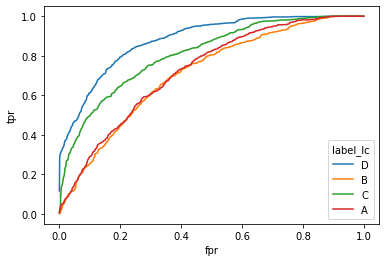

In [252]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, RocCurveDisplay, PrecisionRecallDisplay, plot_roc_curve

proba_lgb = clf_grid.predict_proba(X_test_lgb)
auc_lgb= accuracy_score(y_test, y_predict_test)
print("Accuracy of LGB Classifier {:.2f}".format( accuracy_score(y_test, y_predict_test) * 100))
data = []
dic_lgbg = {}
dict_auc_lgbg = {}
for i in range(len(classes)):
    y_score_lgb = proba_lgb[:,i]
    cl_i = classes[i]
    prec_lgb, recall_lgb, _ = precision_recall_curve(y_test, y_score_lgb, pos_label=cl_i)
    fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_score_lgb, pos_label=cl_i)
    a1= zip(prec_lgb, recall_lgb, fpr_lgb, tpr_lgb)
    df2= pd.DataFrame(a1, columns=['prec', 'recall', 'fpr', 'tpr'])
    df2['label_lc'] = classes[i]
    dic_lgbg[cl_i] = df2
    auc = roc_auc_score(y_test==cl_i,y_predict_test_rf==cl_i)
    dict_auc_lgbg[cl_i] = auc 
df_lgbg= dic_lgbg['D'].append([dic_lgbg['B'], dic_lgbg['C'], dic_lgbg['A']])
sns.lineplot(x = 'fpr', y = 'tpr', data=df_lgbg, hue='label_lc')
for i in range(len(classes)):
    cl_i = classes[i]
    print('ROC AUC score for class {} is {:.2f}'.format(cl_i, dict_auc_lgbg[cl_i]))


Actual B's are often categorized as either A or C...

### Iterative 1  Boosting Sampling Sampling:

In [363]:
params['min_data_in_leaf'] =clf_grid.best_params_['min_data_in_leaf']
params['max_depth'] = clf_grid.best_params_['max_depth']
params['boosting_type'] = 'gbdt'

#52347
sub_samples =[0.2, 0.5, 0.7] #% of samples
subsample_freqs = [5, 10]

    
clf2 = lgb.LGBMClassifier(**params)
gs_grid = GridSearchCV(clf2, {'subsample': sub_samples, 'subsample_freq': subsample_freqs}
                        , cv=5, scoring='accuracy')
gs_grid.fit(X_train_lgb, y_train, early_stopping_rounds=75, eval_set=[(X_train_lgb, y_train), (X_test_lgb, y_test)], eval_metric='multi_error', verbose=True)


# Predict on the test (and training) set to calculate metrics:
y_train_gs = gs_grid.predict(X_train_lgb)
y_test_gs = gs_grid.predict(X_test_lgb)


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36588	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36648
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.623668	valid_0's multi_logloss: 1.34954	valid_1's multi_error: 0.627559	valid_1's multi_logloss: 1.35101
[3]	valid_0's multi_error: 0.569075	valid_0's multi_logloss: 1.33561	valid_1's multi_error: 0.57364	valid_1's multi_logloss: 1.33792
[4]	valid_0's multi_error: 0.551598	valid_0's multi_logloss: 1.32194	valid_1's multi_error: 0.558163	valid_1's multi_logloss: 1.32472
[5]	valid_0's multi_error: 0

[62]	valid_0's multi_error: 0.47287	valid_0's multi_logloss: 1.08839	valid_1's multi_error: 0.49975	valid_1's multi_logloss: 1.10975
[63]	valid_0's multi_error: 0.473036	valid_0's multi_logloss: 1.0873	valid_1's multi_error: 0.501248	valid_1's multi_logloss: 1.10907
[64]	valid_0's multi_error: 0.473036	valid_0's multi_logloss: 1.08627	valid_1's multi_error: 0.50025	valid_1's multi_logloss: 1.10823
[65]	valid_0's multi_error: 0.473369	valid_0's multi_logloss: 1.08534	valid_1's multi_error: 0.496755	valid_1's multi_logloss: 1.10774
[66]	valid_0's multi_error: 0.473702	valid_0's multi_logloss: 1.08434	valid_1's multi_error: 0.497753	valid_1's multi_logloss: 1.10712
[67]	valid_0's multi_error: 0.47237	valid_0's multi_logloss: 1.08351	valid_1's multi_error: 0.496256	valid_1's multi_logloss: 1.10632
[68]	valid_0's multi_error: 0.471205	valid_0's multi_logloss: 1.08273	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.10579
[69]	valid_0's multi_error: 0.470706	valid_0's multi_logloss

[20]	valid_0's multi_error: 0.485519	valid_0's multi_logloss: 1.19165	valid_1's multi_error: 0.519221	valid_1's multi_logloss: 1.20295
[21]	valid_0's multi_error: 0.485686	valid_0's multi_logloss: 1.18697	valid_1's multi_error: 0.516725	valid_1's multi_logloss: 1.19875
[22]	valid_0's multi_error: 0.486352	valid_0's multi_logloss: 1.18249	valid_1's multi_error: 0.518722	valid_1's multi_logloss: 1.19435
[23]	valid_0's multi_error: 0.486518	valid_0's multi_logloss: 1.17819	valid_1's multi_error: 0.517224	valid_1's multi_logloss: 1.1901
[24]	valid_0's multi_error: 0.488182	valid_0's multi_logloss: 1.17373	valid_1's multi_error: 0.514728	valid_1's multi_logloss: 1.18586
[25]	valid_0's multi_error: 0.488682	valid_0's multi_logloss: 1.17068	valid_1's multi_error: 0.518722	valid_1's multi_logloss: 1.18344
[26]	valid_0's multi_error: 0.486352	valid_0's multi_logloss: 1.16706	valid_1's multi_error: 0.518223	valid_1's multi_logloss: 1.18041
[27]	valid_0's multi_error: 0.485353	valid_0's multi_log

[95]	valid_0's multi_error: 0.461884	valid_0's multi_logloss: 1.06416	valid_1's multi_error: 0.49975	valid_1's multi_logloss: 1.0997
[96]	valid_0's multi_error: 0.462217	valid_0's multi_logloss: 1.0633	valid_1's multi_error: 0.501248	valid_1's multi_logloss: 1.09931
[97]	valid_0's multi_error: 0.460885	valid_0's multi_logloss: 1.06241	valid_1's multi_error: 0.503245	valid_1's multi_logloss: 1.09923
[98]	valid_0's multi_error: 0.460053	valid_0's multi_logloss: 1.06174	valid_1's multi_error: 0.501747	valid_1's multi_logloss: 1.09917
[99]	valid_0's multi_error: 0.460719	valid_0's multi_logloss: 1.06106	valid_1's multi_error: 0.502247	valid_1's multi_logloss: 1.09922
[100]	valid_0's multi_error: 0.460885	valid_0's multi_logloss: 1.06044	valid_1's multi_error: 0.503744	valid_1's multi_logloss: 1.09921
Did not meet early stopping. Best iteration is:
[98]	valid_0's multi_error: 0.460053	valid_0's multi_logloss: 1.06174	valid_1's multi_error: 0.501747	valid_1's multi_logloss: 1.09917
[LightGBM

[55]	valid_0's multi_error: 0.484021	valid_0's multi_logloss: 1.09791	valid_1's multi_error: 0.505242	valid_1's multi_logloss: 1.11643
[56]	valid_0's multi_error: 0.483522	valid_0's multi_logloss: 1.09675	valid_1's multi_error: 0.506241	valid_1's multi_logloss: 1.1157
[57]	valid_0's multi_error: 0.48036	valid_0's multi_logloss: 1.09534	valid_1's multi_error: 0.510734	valid_1's multi_logloss: 1.11459
[58]	valid_0's multi_error: 0.47986	valid_0's multi_logloss: 1.09364	valid_1's multi_error: 0.504743	valid_1's multi_logloss: 1.11335
[59]	valid_0's multi_error: 0.480027	valid_0's multi_logloss: 1.09239	valid_1's multi_error: 0.505242	valid_1's multi_logloss: 1.11241
[60]	valid_0's multi_error: 0.48036	valid_0's multi_logloss: 1.09112	valid_1's multi_error: 0.506241	valid_1's multi_logloss: 1.1112
[61]	valid_0's multi_error: 0.480193	valid_0's multi_logloss: 1.09013	valid_1's multi_error: 0.50674	valid_1's multi_logloss: 1.11094
[62]	valid_0's multi_error: 0.481025	valid_0's multi_logloss:

[28]	valid_0's multi_error: 0.488682	valid_0's multi_logloss: 1.15793	valid_1's multi_error: 0.498752	valid_1's multi_logloss: 1.16545
[29]	valid_0's multi_error: 0.486518	valid_0's multi_logloss: 1.15449	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.16239
[30]	valid_0's multi_error: 0.48785	valid_0's multi_logloss: 1.15097	valid_1's multi_error: 0.50025	valid_1's multi_logloss: 1.15899
[31]	valid_0's multi_error: 0.485519	valid_0's multi_logloss: 1.14758	valid_1's multi_error: 0.50025	valid_1's multi_logloss: 1.15576
[32]	valid_0's multi_error: 0.483356	valid_0's multi_logloss: 1.1448	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.15324
[33]	valid_0's multi_error: 0.483522	valid_0's multi_logloss: 1.14167	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.15049
[34]	valid_0's multi_error: 0.485519	valid_0's multi_logloss: 1.13942	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.14894
[35]	valid_0's multi_error: 0.486851	valid_0's multi_loglos

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.3663	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36644
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.640479	valid_0's multi_logloss: 1.35043	valid_1's multi_error: 0.644034	valid_1's multi_logloss: 1.35093
[3]	valid_0's multi_error: 0.598369	valid_0's multi_logloss: 1.33602	valid_1's multi_error: 0.603095	valid_1's multi_logloss: 1.33729
[4]	valid_0's multi_error: 0.553429	valid_0's multi_logloss: 1.32267	valid_1's multi_error: 0.560659	valid_1's multi_logloss: 1.32477
[5]	valid_0's multi_error: 0

[77]	valid_0's multi_error: 0.474201	valid_0's multi_logloss: 1.0775	valid_1's multi_error: 0.504244	valid_1's multi_logloss: 1.10269
[78]	valid_0's multi_error: 0.474035	valid_0's multi_logloss: 1.07675	valid_1's multi_error: 0.502247	valid_1's multi_logloss: 1.10205
[79]	valid_0's multi_error: 0.472037	valid_0's multi_logloss: 1.07608	valid_1's multi_error: 0.503744	valid_1's multi_logloss: 1.10145
[80]	valid_0's multi_error: 0.471205	valid_0's multi_logloss: 1.0755	valid_1's multi_error: 0.502247	valid_1's multi_logloss: 1.10099
[81]	valid_0's multi_error: 0.472537	valid_0's multi_logloss: 1.07463	valid_1's multi_error: 0.50025	valid_1's multi_logloss: 1.10041
[82]	valid_0's multi_error: 0.470539	valid_0's multi_logloss: 1.07385	valid_1's multi_error: 0.50025	valid_1's multi_logloss: 1.09993
[83]	valid_0's multi_error: 0.471871	valid_0's multi_logloss: 1.07319	valid_1's multi_error: 0.502247	valid_1's multi_logloss: 1.09972
[84]	valid_0's multi_error: 0.469874	valid_0's multi_loglos

[54]	valid_0's multi_error: 0.478029	valid_0's multi_logloss: 1.10287	valid_1's multi_error: 0.501248	valid_1's multi_logloss: 1.12103
[55]	valid_0's multi_error: 0.478029	valid_0's multi_logloss: 1.10144	valid_1's multi_error: 0.502746	valid_1's multi_logloss: 1.12006
[56]	valid_0's multi_error: 0.476032	valid_0's multi_logloss: 1.10023	valid_1's multi_error: 0.504743	valid_1's multi_logloss: 1.11941
[57]	valid_0's multi_error: 0.47753	valid_0's multi_logloss: 1.09952	valid_1's multi_error: 0.503744	valid_1's multi_logloss: 1.11883
[58]	valid_0's multi_error: 0.473535	valid_0's multi_logloss: 1.09831	valid_1's multi_error: 0.501248	valid_1's multi_logloss: 1.11815
[59]	valid_0's multi_error: 0.474368	valid_0's multi_logloss: 1.09717	valid_1's multi_error: 0.500749	valid_1's multi_logloss: 1.11748
[60]	valid_0's multi_error: 0.47287	valid_0's multi_logloss: 1.09656	valid_1's multi_error: 0.49975	valid_1's multi_logloss: 1.11717
[61]	valid_0's multi_error: 0.471039	valid_0's multi_loglo

[32]	valid_0's multi_error: 0.484854	valid_0's multi_logloss: 1.14514	valid_1's multi_error: 0.509735	valid_1's multi_logloss: 1.16072
[33]	valid_0's multi_error: 0.486185	valid_0's multi_logloss: 1.14193	valid_1's multi_error: 0.509735	valid_1's multi_logloss: 1.15757
[34]	valid_0's multi_error: 0.486019	valid_0's multi_logloss: 1.13874	valid_1's multi_error: 0.506241	valid_1's multi_logloss: 1.15491
[35]	valid_0's multi_error: 0.484521	valid_0's multi_logloss: 1.13586	valid_1's multi_error: 0.503245	valid_1's multi_logloss: 1.15241
[36]	valid_0's multi_error: 0.486352	valid_0's multi_logloss: 1.13311	valid_1's multi_error: 0.507738	valid_1's multi_logloss: 1.15003
[37]	valid_0's multi_error: 0.485519	valid_0's multi_logloss: 1.13098	valid_1's multi_error: 0.509236	valid_1's multi_logloss: 1.14837
[38]	valid_0's multi_error: 0.485186	valid_0's multi_logloss: 1.12863	valid_1's multi_error: 0.505741	valid_1's multi_logloss: 1.14636
[39]	valid_0's multi_error: 0.484354	valid_0's multi_lo

[95]	valid_0's multi_error: 0.470706	valid_0's multi_logloss: 1.06832	valid_1's multi_error: 0.501747	valid_1's multi_logloss: 1.10395
[96]	valid_0's multi_error: 0.470872	valid_0's multi_logloss: 1.06723	valid_1's multi_error: 0.502247	valid_1's multi_logloss: 1.10309
[97]	valid_0's multi_error: 0.469874	valid_0's multi_logloss: 1.06659	valid_1's multi_error: 0.503744	valid_1's multi_logloss: 1.10266
[98]	valid_0's multi_error: 0.47004	valid_0's multi_logloss: 1.06585	valid_1's multi_error: 0.506241	valid_1's multi_logloss: 1.10216
[99]	valid_0's multi_error: 0.470706	valid_0's multi_logloss: 1.06531	valid_1's multi_error: 0.502746	valid_1's multi_logloss: 1.10173
[100]	valid_0's multi_error: 0.471538	valid_0's multi_logloss: 1.06498	valid_1's multi_error: 0.501747	valid_1's multi_logloss: 1.1015
Did not meet early stopping. Best iteration is:
[94]	valid_0's multi_error: 0.469208	valid_0's multi_logloss: 1.06908	valid_1's multi_error: 0.501747	valid_1's multi_logloss: 1.10451
[LightGB

[67]	valid_0's multi_error: 0.476198	valid_0's multi_logloss: 1.08876	valid_1's multi_error: 0.504743	valid_1's multi_logloss: 1.10923
[68]	valid_0's multi_error: 0.474201	valid_0's multi_logloss: 1.08754	valid_1's multi_error: 0.501747	valid_1's multi_logloss: 1.10804
[69]	valid_0's multi_error: 0.473202	valid_0's multi_logloss: 1.08682	valid_1's multi_error: 0.49975	valid_1's multi_logloss: 1.10757
[70]	valid_0's multi_error: 0.471372	valid_0's multi_logloss: 1.08596	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.10684
[71]	valid_0's multi_error: 0.472703	valid_0's multi_logloss: 1.08558	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.10665
[72]	valid_0's multi_error: 0.472703	valid_0's multi_logloss: 1.0845	valid_1's multi_error: 0.500749	valid_1's multi_logloss: 1.10556
[73]	valid_0's multi_error: 0.473868	valid_0's multi_logloss: 1.0836	valid_1's multi_error: 0.50025	valid_1's multi_logloss: 1.10517
[74]	valid_0's multi_error: 0.474534	valid_0's multi_loglos

[35]	valid_0's multi_error: 0.484854	valid_0's multi_logloss: 1.13908	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.1489
[36]	valid_0's multi_error: 0.484854	valid_0's multi_logloss: 1.1366	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.14677
[37]	valid_0's multi_error: 0.484687	valid_0's multi_logloss: 1.13425	valid_1's multi_error: 0.501747	valid_1's multi_logloss: 1.14485
[38]	valid_0's multi_error: 0.483855	valid_0's multi_logloss: 1.13141	valid_1's multi_error: 0.505242	valid_1's multi_logloss: 1.14262
[39]	valid_0's multi_error: 0.483855	valid_0's multi_logloss: 1.12863	valid_1's multi_error: 0.505242	valid_1's multi_logloss: 1.14056
[40]	valid_0's multi_error: 0.483356	valid_0's multi_logloss: 1.12602	valid_1's multi_error: 0.503245	valid_1's multi_logloss: 1.13851
[41]	valid_0's multi_error: 0.483189	valid_0's multi_logloss: 1.12368	valid_1's multi_error: 0.505741	valid_1's multi_logloss: 1.1363
[42]	valid_0's multi_error: 0.482024	valid_0's multi_loglo

[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.3663	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36644
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.640479	valid_0's multi_logloss: 1.35043	valid_1's multi_error: 0.644034	valid_1's multi_logloss: 1.35093
[3]	valid_0's multi_error: 0.598369	valid_0's multi_logloss: 1.33602	valid_1's multi_error: 0.603095	valid_1's multi_logloss: 1.33729
[4]	valid_0's multi_error: 0.553429	valid_0's multi_logloss: 1.32267	valid_1's multi_error: 0.560659	valid_1's multi_logloss: 1.32477
[5]	valid_0's multi_error: 0.534621	valid_0's multi_logloss: 1.30996	valid_1's multi_error: 0.543185	valid_1's multi_logloss: 1.31215
[6]	valid_0's multi_error: 0.518142	valid_0's multi_logloss: 1.29762	valid_1's multi_error: 0.528208	valid_1's multi_logloss: 1.30024
[7]	valid_0's multi_error: 0.514148	valid_0's multi_logloss: 1.28813	valid_1's multi_error: 0.52671	valid_1's multi_logloss: 1.29099
[8]

[64]	valid_0's multi_error: 0.474035	valid_0's multi_logloss: 1.09099	valid_1's multi_error: 0.501248	valid_1's multi_logloss: 1.11042
[65]	valid_0's multi_error: 0.4747	valid_0's multi_logloss: 1.09001	valid_1's multi_error: 0.501747	valid_1's multi_logloss: 1.11001
[66]	valid_0's multi_error: 0.474368	valid_0's multi_logloss: 1.08952	valid_1's multi_error: 0.500749	valid_1's multi_logloss: 1.10957
[67]	valid_0's multi_error: 0.472703	valid_0's multi_logloss: 1.08868	valid_1's multi_error: 0.49975	valid_1's multi_logloss: 1.10904
[68]	valid_0's multi_error: 0.474534	valid_0's multi_logloss: 1.08799	valid_1's multi_error: 0.50025	valid_1's multi_logloss: 1.10827
[69]	valid_0's multi_error: 0.47287	valid_0's multi_logloss: 1.08753	valid_1's multi_error: 0.501248	valid_1's multi_logloss: 1.10789
[70]	valid_0's multi_error: 0.473702	valid_0's multi_logloss: 1.08686	valid_1's multi_error: 0.50025	valid_1's multi_logloss: 1.10726
[71]	valid_0's multi_error: 0.473535	valid_0's multi_logloss:

[28]	valid_0's multi_error: 0.470539	valid_0's multi_logloss: 1.12936	valid_1's multi_error: 0.506241	valid_1's multi_logloss: 1.14764
[29]	valid_0's multi_error: 0.469208	valid_0's multi_logloss: 1.12585	valid_1's multi_error: 0.506241	valid_1's multi_logloss: 1.14427
[30]	valid_0's multi_error: 0.468708	valid_0's multi_logloss: 1.1219	valid_1's multi_error: 0.505741	valid_1's multi_logloss: 1.14082
[31]	valid_0's multi_error: 0.467377	valid_0's multi_logloss: 1.11786	valid_1's multi_error: 0.507239	valid_1's multi_logloss: 1.13712
[32]	valid_0's multi_error: 0.465879	valid_0's multi_logloss: 1.11447	valid_1's multi_error: 0.506241	valid_1's multi_logloss: 1.13426
[33]	valid_0's multi_error: 0.46488	valid_0's multi_logloss: 1.11035	valid_1's multi_error: 0.501248	valid_1's multi_logloss: 1.13087
[34]	valid_0's multi_error: 0.463881	valid_0's multi_logloss: 1.10739	valid_1's multi_error: 0.498752	valid_1's multi_logloss: 1.12886
[35]	valid_0's multi_error: 0.462716	valid_0's multi_logl

[96]	valid_0's multi_error: 0.435087	valid_0's multi_logloss: 1.0174	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.07009
[97]	valid_0's multi_error: 0.434088	valid_0's multi_logloss: 1.01669	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.0702
[98]	valid_0's multi_error: 0.433256	valid_0's multi_logloss: 1.01583	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.07001
[99]	valid_0's multi_error: 0.433256	valid_0's multi_logloss: 1.01522	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.06994
[100]	valid_0's multi_error: 0.432257	valid_0's multi_logloss: 1.01443	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.07011
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_error: 0.432257	valid_0's multi_logloss: 1.01443	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.07011
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warnin

[52]	valid_0's multi_error: 0.455393	valid_0's multi_logloss: 1.06403	valid_1's multi_error: 0.497753	valid_1's multi_logloss: 1.10135
[53]	valid_0's multi_error: 0.454394	valid_0's multi_logloss: 1.06189	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.0996
[54]	valid_0's multi_error: 0.454727	valid_0's multi_logloss: 1.06037	valid_1's multi_error: 0.498752	valid_1's multi_logloss: 1.09832
[55]	valid_0's multi_error: 0.454727	valid_0's multi_logloss: 1.05857	valid_1's multi_error: 0.49975	valid_1's multi_logloss: 1.0971
[56]	valid_0's multi_error: 0.45273	valid_0's multi_logloss: 1.05698	valid_1's multi_error: 0.499251	valid_1's multi_logloss: 1.09601
[57]	valid_0's multi_error: 0.453229	valid_0's multi_logloss: 1.05578	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.09533
[58]	valid_0's multi_error: 0.453063	valid_0's multi_logloss: 1.05428	valid_1's multi_error: 0.499251	valid_1's multi_logloss: 1.09429
[59]	valid_0's multi_error: 0.452896	valid_0's multi_loglos

[17]	valid_0's multi_error: 0.470206	valid_0's multi_logloss: 1.17889	valid_1's multi_error: 0.503744	valid_1's multi_logloss: 1.19154
[18]	valid_0's multi_error: 0.470872	valid_0's multi_logloss: 1.17188	valid_1's multi_error: 0.504244	valid_1's multi_logloss: 1.18513
[19]	valid_0's multi_error: 0.47004	valid_0's multi_logloss: 1.16619	valid_1's multi_error: 0.505242	valid_1's multi_logloss: 1.17993
[20]	valid_0's multi_error: 0.470539	valid_0's multi_logloss: 1.1602	valid_1's multi_error: 0.505741	valid_1's multi_logloss: 1.17463
[21]	valid_0's multi_error: 0.470706	valid_0's multi_logloss: 1.15448	valid_1's multi_error: 0.503245	valid_1's multi_logloss: 1.16983
[22]	valid_0's multi_error: 0.471538	valid_0's multi_logloss: 1.14896	valid_1's multi_error: 0.504743	valid_1's multi_logloss: 1.16511
[23]	valid_0's multi_error: 0.471538	valid_0's multi_logloss: 1.14423	valid_1's multi_error: 0.504244	valid_1's multi_logloss: 1.16129
[24]	valid_0's multi_error: 0.471205	valid_0's multi_logl

[80]	valid_0's multi_error: 0.447903	valid_0's multi_logloss: 1.02696	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.07552
[81]	valid_0's multi_error: 0.447403	valid_0's multi_logloss: 1.02612	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.07505
[82]	valid_0's multi_error: 0.447071	valid_0's multi_logloss: 1.02524	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.07453
[83]	valid_0's multi_error: 0.445573	valid_0's multi_logloss: 1.02444	valid_1's multi_error: 0.478283	valid_1's multi_logloss: 1.07422
[84]	valid_0's multi_error: 0.446238	valid_0's multi_logloss: 1.02369	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.07401
[85]	valid_0's multi_error: 0.44524	valid_0's multi_logloss: 1.02286	valid_1's multi_error: 0.47978	valid_1's multi_logloss: 1.0736
[86]	valid_0's multi_error: 0.444907	valid_0's multi_logloss: 1.02198	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.07344
[87]	valid_0's multi_error: 0.44524	valid_0's multi_logloss:

[43]	valid_0's multi_error: 0.462051	valid_0's multi_logloss: 1.08219	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.10971
[44]	valid_0's multi_error: 0.460386	valid_0's multi_logloss: 1.08012	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.10819
[45]	valid_0's multi_error: 0.461718	valid_0's multi_logloss: 1.07811	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.10659
[46]	valid_0's multi_error: 0.459887	valid_0's multi_logloss: 1.07594	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.10454
[47]	valid_0's multi_error: 0.459221	valid_0's multi_logloss: 1.07362	valid_1's multi_error: 0.478283	valid_1's multi_logloss: 1.10268
[48]	valid_0's multi_error: 0.458722	valid_0's multi_logloss: 1.07152	valid_1's multi_error: 0.477783	valid_1's multi_logloss: 1.10079
[49]	valid_0's multi_error: 0.457224	valid_0's multi_logloss: 1.06944	valid_1's multi_error: 0.478283	valid_1's multi_logloss: 1.09916
[50]	valid_0's multi_error: 0.455726	valid_0's multi_logl

[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36371	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36452
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.625832	valid_0's multi_logloss: 1.34551	valid_1's multi_error: 0.631553	valid_1's multi_logloss: 1.3472
[3]	valid_0's multi_error: 0.572736	valid_0's multi_logloss: 1.32979	valid_1's multi_error: 0.579631	valid_1's multi_logloss: 1.33227
[4]	valid_0's multi_error: 0.538282	valid_0's multi_logloss: 1.31499	valid_1's multi_error: 0.552671	valid_1's multi_logloss: 1.31832
[5]	valid_0's multi_error: 0.519141	valid_0's multi_logloss: 1.30091	valid_1's multi_error: 0.5332	valid_1's multi_logloss: 1.3051
[6]	valid_0's multi_error: 0.505659	valid_0's multi_logloss: 1.2867	valid_1's multi_error: 0.529206	valid_1's multi_logloss: 1.2913
[7]	valid_0's multi_error: 0.495173	valid_0's multi_logloss: 1.2754	valid_1's multi_error: 0.520719	valid_1's multi_logloss: 1.28057
[8]	vali

[77]	valid_0's multi_error: 0.445739	valid_0's multi_logloss: 1.03267	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.07746
[78]	valid_0's multi_error: 0.446072	valid_0's multi_logloss: 1.03175	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.07722
[79]	valid_0's multi_error: 0.446072	valid_0's multi_logloss: 1.03077	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.07642
[80]	valid_0's multi_error: 0.444907	valid_0's multi_logloss: 1.02953	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.0756
[81]	valid_0's multi_error: 0.44474	valid_0's multi_logloss: 1.02865	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.07536
[82]	valid_0's multi_error: 0.443076	valid_0's multi_logloss: 1.0277	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.07479
[83]	valid_0's multi_error: 0.443409	valid_0's multi_logloss: 1.02694	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.07436
[84]	valid_0's multi_error: 0.442577	valid_0's multi_loglo

[47]	valid_0's multi_error: 0.463382	valid_0's multi_logloss: 1.0749	valid_1's multi_error: 0.497753	valid_1's multi_logloss: 1.1046
[48]	valid_0's multi_error: 0.462716	valid_0's multi_logloss: 1.07315	valid_1's multi_error: 0.497753	valid_1's multi_logloss: 1.10324
[49]	valid_0's multi_error: 0.463881	valid_0's multi_logloss: 1.07142	valid_1's multi_error: 0.497753	valid_1's multi_logloss: 1.10207
[50]	valid_0's multi_error: 0.463216	valid_0's multi_logloss: 1.06975	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.10105
[51]	valid_0's multi_error: 0.463216	valid_0's multi_logloss: 1.0678	valid_1's multi_error: 0.497753	valid_1's multi_logloss: 1.09932
[52]	valid_0's multi_error: 0.462051	valid_0's multi_logloss: 1.06584	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.09779
[53]	valid_0's multi_error: 0.460885	valid_0's multi_logloss: 1.06442	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.09713
[54]	valid_0's multi_error: 0.460053	valid_0's multi_loglos

[3]	valid_0's multi_error: 0.584387	valid_0's multi_logloss: 1.33083	valid_1's multi_error: 0.590115	valid_1's multi_logloss: 1.33425
[4]	valid_0's multi_error: 0.549101	valid_0's multi_logloss: 1.31563	valid_1's multi_error: 0.563655	valid_1's multi_logloss: 1.32035
[5]	valid_0's multi_error: 0.531292	valid_0's multi_logloss: 1.30137	valid_1's multi_error: 0.546181	valid_1's multi_logloss: 1.30715
[6]	valid_0's multi_error: 0.518142	valid_0's multi_logloss: 1.28761	valid_1's multi_error: 0.533699	valid_1's multi_logloss: 1.29447
[7]	valid_0's multi_error: 0.509321	valid_0's multi_logloss: 1.27687	valid_1's multi_error: 0.530205	valid_1's multi_logloss: 1.28432
[8]	valid_0's multi_error: 0.507823	valid_0's multi_logloss: 1.26563	valid_1's multi_error: 0.529206	valid_1's multi_logloss: 1.27404
[9]	valid_0's multi_error: 0.501997	valid_0's multi_logloss: 1.25472	valid_1's multi_error: 0.525212	valid_1's multi_logloss: 1.26393
[10]	valid_0's multi_error: 0.499834	valid_0's multi_logloss: 

[79]	valid_0's multi_error: 0.449401	valid_0's multi_logloss: 1.03312	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.08747
[80]	valid_0's multi_error: 0.448402	valid_0's multi_logloss: 1.03221	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.08723
[81]	valid_0's multi_error: 0.447237	valid_0's multi_logloss: 1.03113	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.08663
[82]	valid_0's multi_error: 0.447736	valid_0's multi_logloss: 1.02993	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.08613
[83]	valid_0's multi_error: 0.446405	valid_0's multi_logloss: 1.02914	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.08569
[84]	valid_0's multi_error: 0.445739	valid_0's multi_logloss: 1.02853	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.08548
[85]	valid_0's multi_error: 0.446405	valid_0's multi_logloss: 1.02761	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.08511
[86]	valid_0's multi_error: 0.446571	valid_0's multi_lo

[49]	valid_0's multi_error: 0.457224	valid_0's multi_logloss: 1.06756	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.1011
[50]	valid_0's multi_error: 0.455559	valid_0's multi_logloss: 1.06607	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.10028
[51]	valid_0's multi_error: 0.456059	valid_0's multi_logloss: 1.06432	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.09885
[52]	valid_0's multi_error: 0.455559	valid_0's multi_logloss: 1.06256	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.0976
[53]	valid_0's multi_error: 0.454727	valid_0's multi_logloss: 1.06122	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.09645
[54]	valid_0's multi_error: 0.455892	valid_0's multi_logloss: 1.05975	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.09566
[55]	valid_0's multi_error: 0.455892	valid_0's multi_logloss: 1.05792	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.09443
[56]	valid_0's multi_error: 0.45506	valid_0's multi_logloss

[20]	valid_0's multi_error: 0.477696	valid_0's multi_logloss: 1.16827	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.18032
[21]	valid_0's multi_error: 0.476531	valid_0's multi_logloss: 1.16217	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.17476
[22]	valid_0's multi_error: 0.476531	valid_0's multi_logloss: 1.15649	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.16978
[23]	valid_0's multi_error: 0.475699	valid_0's multi_logloss: 1.15149	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.16498
[24]	valid_0's multi_error: 0.473535	valid_0's multi_logloss: 1.14735	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.16151
[25]	valid_0's multi_error: 0.471538	valid_0's multi_logloss: 1.14263	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.1575
[26]	valid_0's multi_error: 0.471704	valid_0's multi_logloss: 1.13906	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.1544
[27]	valid_0's multi_error: 0.472537	valid_0's multi_loglo

[93]	valid_0's multi_error: 0.440746	valid_0's multi_logloss: 1.02033	valid_1's multi_error: 0.475786	valid_1's multi_logloss: 1.07398
[94]	valid_0's multi_error: 0.437916	valid_0's multi_logloss: 1.01946	valid_1's multi_error: 0.476785	valid_1's multi_logloss: 1.07349
[95]	valid_0's multi_error: 0.438415	valid_0's multi_logloss: 1.01868	valid_1's multi_error: 0.476785	valid_1's multi_logloss: 1.07268
[96]	valid_0's multi_error: 0.438582	valid_0's multi_logloss: 1.01796	valid_1's multi_error: 0.474788	valid_1's multi_logloss: 1.07211
[97]	valid_0's multi_error: 0.439414	valid_0's multi_logloss: 1.01731	valid_1's multi_error: 0.475287	valid_1's multi_logloss: 1.07173
[98]	valid_0's multi_error: 0.438915	valid_0's multi_logloss: 1.01662	valid_1's multi_error: 0.475786	valid_1's multi_logloss: 1.07129
[99]	valid_0's multi_error: 0.438915	valid_0's multi_logloss: 1.01604	valid_1's multi_error: 0.476286	valid_1's multi_logloss: 1.07099
[100]	valid_0's multi_error: 0.438415	valid_0's multi_l

[53]	valid_0's multi_error: 0.456225	valid_0's multi_logloss: 1.06263	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.09521
[54]	valid_0's multi_error: 0.45506	valid_0's multi_logloss: 1.06124	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.09429
[55]	valid_0's multi_error: 0.455892	valid_0's multi_logloss: 1.05958	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.09327
[56]	valid_0's multi_error: 0.455726	valid_0's multi_logloss: 1.05827	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.09244
[57]	valid_0's multi_error: 0.455393	valid_0's multi_logloss: 1.05675	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.09166
[58]	valid_0's multi_error: 0.45506	valid_0's multi_logloss: 1.05504	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.09063
[59]	valid_0's multi_error: 0.453728	valid_0's multi_logloss: 1.05361	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.09004
[60]	valid_0's multi_error: 0.45273	valid_0's multi_loglo

[20]	valid_0's multi_error: 0.46771	valid_0's multi_logloss: 1.15671	valid_1's multi_error: 0.501747	valid_1's multi_logloss: 1.17469
[21]	valid_0's multi_error: 0.467876	valid_0's multi_logloss: 1.15046	valid_1's multi_error: 0.503245	valid_1's multi_logloss: 1.16934
[22]	valid_0's multi_error: 0.465379	valid_0's multi_logloss: 1.14436	valid_1's multi_error: 0.501248	valid_1's multi_logloss: 1.16398
[23]	valid_0's multi_error: 0.467377	valid_0's multi_logloss: 1.13937	valid_1's multi_error: 0.50025	valid_1's multi_logloss: 1.15984
[24]	valid_0's multi_error: 0.465379	valid_0's multi_logloss: 1.13518	valid_1's multi_error: 0.499251	valid_1's multi_logloss: 1.15667
[25]	valid_0's multi_error: 0.464048	valid_0's multi_logloss: 1.13085	valid_1's multi_error: 0.503245	valid_1's multi_logloss: 1.1532
[26]	valid_0's multi_error: 0.463549	valid_0's multi_logloss: 1.12688	valid_1's multi_error: 0.504743	valid_1's multi_logloss: 1.15033
[27]	valid_0's multi_error: 0.462217	valid_0's multi_loglo

[96]	valid_0's multi_error: 0.428096	valid_0's multi_logloss: 1.00172	valid_1's multi_error: 0.478782	valid_1's multi_logloss: 1.06557
[97]	valid_0's multi_error: 0.426265	valid_0's multi_logloss: 1.00103	valid_1's multi_error: 0.477783	valid_1's multi_logloss: 1.06545
[98]	valid_0's multi_error: 0.425599	valid_0's multi_logloss: 1.00019	valid_1's multi_error: 0.477284	valid_1's multi_logloss: 1.06513
[99]	valid_0's multi_error: 0.424434	valid_0's multi_logloss: 0.999454	valid_1's multi_error: 0.477284	valid_1's multi_logloss: 1.06483
[100]	valid_0's multi_error: 0.425766	valid_0's multi_logloss: 0.998661	valid_1's multi_error: 0.476286	valid_1's multi_logloss: 1.06487
Did not meet early stopping. Best iteration is:
[99]	valid_0's multi_error: 0.424434	valid_0's multi_logloss: 0.999454	valid_1's multi_error: 0.477284	valid_1's multi_logloss: 1.06483
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Wa

[70]	valid_0's multi_error: 0.442244	valid_0's multi_logloss: 1.0284	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.08013
[71]	valid_0's multi_error: 0.440246	valid_0's multi_logloss: 1.02733	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.07963
[72]	valid_0's multi_error: 0.440579	valid_0's multi_logloss: 1.02624	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.07915
[73]	valid_0's multi_error: 0.440579	valid_0's multi_logloss: 1.02497	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.07818
[74]	valid_0's multi_error: 0.439581	valid_0's multi_logloss: 1.02398	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.07749
[75]	valid_0's multi_error: 0.438582	valid_0's multi_logloss: 1.02284	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.07685
[76]	valid_0's multi_error: 0.438915	valid_0's multi_logloss: 1.02176	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.07642
[77]	valid_0's multi_error: 0.439248	valid_0's multi_log

[49]	valid_0's multi_error: 0.44757	valid_0's multi_logloss: 1.05645	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.09523
[50]	valid_0's multi_error: 0.44757	valid_0's multi_logloss: 1.05461	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.09433
[51]	valid_0's multi_error: 0.44757	valid_0's multi_logloss: 1.05279	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.09316
[52]	valid_0's multi_error: 0.446738	valid_0's multi_logloss: 1.05095	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.09206
[53]	valid_0's multi_error: 0.447403	valid_0's multi_logloss: 1.04931	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.09093
[54]	valid_0's multi_error: 0.445573	valid_0's multi_logloss: 1.04782	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.09016
[55]	valid_0's multi_error: 0.445573	valid_0's multi_logloss: 1.0459	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.08873
[56]	valid_0's multi_error: 0.444407	valid_0's multi_loglos

[25]	valid_0's multi_error: 0.466045	valid_0's multi_logloss: 1.1326	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.15102
[26]	valid_0's multi_error: 0.464048	valid_0's multi_logloss: 1.12864	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.1481
[27]	valid_0's multi_error: 0.464214	valid_0's multi_logloss: 1.1239	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.1437
[28]	valid_0's multi_error: 0.464048	valid_0's multi_logloss: 1.11997	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.14052
[29]	valid_0's multi_error: 0.459221	valid_0's multi_logloss: 1.11602	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.13701
[30]	valid_0's multi_error: 0.459055	valid_0's multi_logloss: 1.11195	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.13349
[31]	valid_0's multi_error: 0.457723	valid_0's multi_logloss: 1.1079	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.12999
[32]	valid_0's multi_error: 0.457557	valid_0's multi_logloss

[92]	valid_0's multi_error: 0.433589	valid_0's multi_logloss: 1.00526	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.06549
[93]	valid_0's multi_error: 0.433422	valid_0's multi_logloss: 1.00434	valid_1's multi_error: 0.476785	valid_1's multi_logloss: 1.0651
[94]	valid_0's multi_error: 0.432257	valid_0's multi_logloss: 1.00335	valid_1's multi_error: 0.476286	valid_1's multi_logloss: 1.06449
[95]	valid_0's multi_error: 0.433422	valid_0's multi_logloss: 1.00253	valid_1's multi_error: 0.476286	valid_1's multi_logloss: 1.06435
[96]	valid_0's multi_error: 0.43259	valid_0's multi_logloss: 1.00175	valid_1's multi_error: 0.475287	valid_1's multi_logloss: 1.06402
[97]	valid_0's multi_error: 0.431758	valid_0's multi_logloss: 1.001	valid_1's multi_error: 0.476785	valid_1's multi_logloss: 1.06399
[98]	valid_0's multi_error: 0.430093	valid_0's multi_logloss: 1.00015	valid_1's multi_error: 0.476785	valid_1's multi_logloss: 1.06372
[99]	valid_0's multi_error: 0.429927	valid_0's multi_loglos

[70]	valid_0's multi_error: 0.441411	valid_0's multi_logloss: 1.02671	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.07514
[71]	valid_0's multi_error: 0.441245	valid_0's multi_logloss: 1.02587	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.07448
[72]	valid_0's multi_error: 0.44008	valid_0's multi_logloss: 1.02483	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.07394
[73]	valid_0's multi_error: 0.439248	valid_0's multi_logloss: 1.02365	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.07357
[74]	valid_0's multi_error: 0.440912	valid_0's multi_logloss: 1.02255	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.07274
[75]	valid_0's multi_error: 0.439747	valid_0's multi_logloss: 1.02149	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.07205
[76]	valid_0's multi_error: 0.439081	valid_0's multi_logloss: 1.02016	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.07163
[77]	valid_0's multi_error: 0.438249	valid_0's multi_log

[43]	valid_0's multi_error: 0.450233	valid_0's multi_logloss: 1.07176	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.10497
[44]	valid_0's multi_error: 0.448569	valid_0's multi_logloss: 1.06955	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.10341
[45]	valid_0's multi_error: 0.448069	valid_0's multi_logloss: 1.06739	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.10175
[46]	valid_0's multi_error: 0.447237	valid_0's multi_logloss: 1.06519	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.1
[47]	valid_0's multi_error: 0.447736	valid_0's multi_logloss: 1.06306	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.09835
[48]	valid_0's multi_error: 0.447736	valid_0's multi_logloss: 1.06098	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.09693
[49]	valid_0's multi_error: 0.448069	valid_0's multi_logloss: 1.0588	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.09569
[50]	valid_0's multi_error: 0.447403	valid_0's multi_logloss

[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36429	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36552
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.609854	valid_0's multi_logloss: 1.34659	valid_1's multi_error: 0.610584	valid_1's multi_logloss: 1.34861
[3]	valid_0's multi_error: 0.581558	valid_0's multi_logloss: 1.32894	valid_1's multi_error: 0.587119	valid_1's multi_logloss: 1.33259
[4]	valid_0's multi_error: 0.541278	valid_0's multi_logloss: 1.31363	valid_1's multi_error: 0.554668	valid_1's multi_logloss: 1.31887
[5]	valid_0's multi_error: 0.528296	valid_0's multi_logloss: 1.29929	valid_1's multi_error: 0.547678	valid_1's multi_logloss: 1.30584
[6]	valid_0's multi_error: 0.510819	valid_0's multi_logloss: 1.28435	valid_1's multi_error: 0.536196	valid_1's multi_logloss: 1.29209
[7]	valid_0's multi_error: 0.503162	valid_0's multi_logloss: 1.27316	valid_1's multi_error: 0.527708	valid_1's multi_logloss: 1.28203
[

[76]	valid_0's multi_error: 0.441578	valid_0's multi_logloss: 1.02486	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.07888
[77]	valid_0's multi_error: 0.441245	valid_0's multi_logloss: 1.02408	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.07861
[78]	valid_0's multi_error: 0.440413	valid_0's multi_logloss: 1.02311	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.07846
[79]	valid_0's multi_error: 0.441578	valid_0's multi_logloss: 1.02202	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.07819
[80]	valid_0's multi_error: 0.440746	valid_0's multi_logloss: 1.02109	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.07794
[81]	valid_0's multi_error: 0.440246	valid_0's multi_logloss: 1.01989	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.07754
[82]	valid_0's multi_error: 0.439081	valid_0's multi_logloss: 1.01866	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.07715
[83]	valid_0's multi_error: 0.43775	valid_0's multi_log

[44]	valid_0's multi_error: 0.454394	valid_0's multi_logloss: 1.06686	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.10323
[45]	valid_0's multi_error: 0.453395	valid_0's multi_logloss: 1.06469	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.10169
[46]	valid_0's multi_error: 0.453728	valid_0's multi_logloss: 1.06263	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.10011
[47]	valid_0's multi_error: 0.451065	valid_0's multi_logloss: 1.06049	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.09872
[48]	valid_0's multi_error: 0.450899	valid_0's multi_logloss: 1.05874	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.09765
[49]	valid_0's multi_error: 0.451565	valid_0's multi_logloss: 1.05679	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.09659
[50]	valid_0's multi_error: 0.450399	valid_0's multi_logloss: 1.05509	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.09595
[51]	valid_0's multi_error: 0.4499	valid_0's multi_loglo

[21]	valid_0's multi_error: 0.462716	valid_0's multi_logloss: 1.15182	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.16815
[22]	valid_0's multi_error: 0.463549	valid_0's multi_logloss: 1.14606	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.16324
[23]	valid_0's multi_error: 0.464214	valid_0's multi_logloss: 1.14096	valid_1's multi_error: 0.496755	valid_1's multi_logloss: 1.15884
[24]	valid_0's multi_error: 0.463049	valid_0's multi_logloss: 1.1368	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.1555
[25]	valid_0's multi_error: 0.460719	valid_0's multi_logloss: 1.1324	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.15203
[26]	valid_0's multi_error: 0.459221	valid_0's multi_logloss: 1.12854	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.14925
[27]	valid_0's multi_error: 0.458888	valid_0's multi_logloss: 1.12374	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.14542
[28]	valid_0's multi_error: 0.458222	valid_0's multi_loglo

[93]	valid_0's multi_error: 0.432091	valid_0's multi_logloss: 1.00598	valid_1's multi_error: 0.472292	valid_1's multi_logloss: 1.06635
[94]	valid_0's multi_error: 0.432257	valid_0's multi_logloss: 1.00518	valid_1's multi_error: 0.472791	valid_1's multi_logloss: 1.06595
[95]	valid_0's multi_error: 0.432091	valid_0's multi_logloss: 1.0045	valid_1's multi_error: 0.47329	valid_1's multi_logloss: 1.06575
[96]	valid_0's multi_error: 0.431425	valid_0's multi_logloss: 1.00385	valid_1's multi_error: 0.472292	valid_1's multi_logloss: 1.0655
[97]	valid_0's multi_error: 0.430593	valid_0's multi_logloss: 1.00309	valid_1's multi_error: 0.47329	valid_1's multi_logloss: 1.0652
[98]	valid_0's multi_error: 0.430593	valid_0's multi_logloss: 1.0023	valid_1's multi_error: 0.473789	valid_1's multi_logloss: 1.06517
[99]	valid_0's multi_error: 0.430759	valid_0's multi_logloss: 1.00159	valid_1's multi_error: 0.474289	valid_1's multi_logloss: 1.06521
[100]	valid_0's multi_error: 0.431425	valid_0's multi_logloss

[52]	valid_0's multi_error: 0.444407	valid_0's multi_logloss: 1.05163	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.08881
[53]	valid_0's multi_error: 0.444407	valid_0's multi_logloss: 1.04992	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.08782
[54]	valid_0's multi_error: 0.444075	valid_0's multi_logloss: 1.04845	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.08709
[55]	valid_0's multi_error: 0.443742	valid_0's multi_logloss: 1.04665	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.08575
[56]	valid_0's multi_error: 0.442743	valid_0's multi_logloss: 1.04517	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.085
[57]	valid_0's multi_error: 0.441578	valid_0's multi_logloss: 1.04343	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.08414
[58]	valid_0's multi_error: 0.442909	valid_0's multi_logloss: 1.04189	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.08329
[59]	valid_0's multi_error: 0.442244	valid_0's multi_logl

[24]	training's multi_error: 0.457057	training's multi_logloss: 1.12934	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.15133
[25]	training's multi_error: 0.45506	training's multi_logloss: 1.12494	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.14753
[26]	training's multi_error: 0.453395	training's multi_logloss: 1.12089	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.14425
[27]	training's multi_error: 0.450899	training's multi_logloss: 1.11611	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.14036
[28]	training's multi_error: 0.450732	training's multi_logloss: 1.11215	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.13719
[29]	training's multi_error: 0.450899	training's multi_logloss: 1.10814	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.13384
[30]	training's multi_error: 0.450566	training's multi_logloss: 1.10424	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.13049
[31]	training's multi_error: 0.450233	trai

[100]	training's multi_error: 0.423602	training's multi_logloss: 0.98666	valid_1's multi_error: 0.478283	valid_1's multi_logloss: 1.06048
Did not meet early stopping. Best iteration is:
[98]	training's multi_error: 0.423435	training's multi_logloss: 0.988509	valid_1's multi_error: 0.476785	valid_1's multi_logloss: 1.06068


In [364]:
from sklearn.metrics import confusion_matrix

print('Best parameters for n_estimators, reg_alpha, and subsample: \n')
print(gs_grid.best_params_, gs_grid.best_score_)

print(accuracy_score(y_test, y_test_gs))

print("\n[Training Classification Report:]")
print(classification_report(y_train, y_train_gs))

print("[Test Classification Report:]")
print(classification_report(y_test, y_test_gs))

Best parameters for n_estimators, reg_alpha, and subsample: 

{'subsample': 0.7, 'subsample_freq': 5} 0.5244669929800596
0.5232151772341488

[Training Classification Report:]
              precision    recall  f1-score   support

           A       0.51      0.54      0.52      1465
           B       0.50      0.35      0.41      1388
           C       0.60      0.63      0.61      1469
           D       0.66      0.75      0.70      1686

    accuracy                           0.58      6008
   macro avg       0.56      0.57      0.56      6008
weighted avg       0.57      0.58      0.57      6008

[Test Classification Report:]
              precision    recall  f1-score   support

           A       0.42      0.44      0.43       489
           B       0.43      0.33      0.37       462
           C       0.56      0.56      0.56       490
           D       0.63      0.72      0.67       562

    accuracy                           0.52      2003
   macro avg       0.51      0.51 

### Iterative 2  Gradient Based One Side sampling sampling:

In [398]:
import copy
params3 = copy.deepcopy(params) 
params3['boosting_type'] = 'goss'
#params3['min_data_in_leaf']= 60 #60
#params3['max_depth']= 9 #9

#52347
top_rates = [0.2, 0.3, 0.4]
other_rates = [0.1, 0.2]
feature_rates = [0.6, 0.7, 0.8]


#0.526709935097354
#0.523
    
clf3 = lgb.LGBMClassifier(**params3)
go_grid = GridSearchCV(clf3, {'feature_fraction':feature_rates, 'other_rate':other_rates, 'top_rate': top_rates}
                        , cv=5, scoring='accuracy')
go_grid.fit(X_train_lgb, y_train, early_stopping_rounds=75, eval_set=[(X_train_lgb, y_train), (X_test_lgb, y_test)], eval_metric='multi_error', verbose=True)


# Predict on the test (and training) set to calculate metrics:
y_train_go = go_grid.predict(X_train_lgb)
y_test_go = go_grid.predict(X_test_lgb)


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36489	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36632
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.625499	valid_0's multi_logloss: 1.3459	valid_1's multi_error: 0.62656	valid_1's multi_logloss: 1.34816
[3]	valid_0's multi_error: 0.564081	valid_0's multi_logloss: 1.32877	valid_1's multi_error: 0.58013	valid_1's multi_logloss: 1.3322
[4]	valid_0's multi_error: 0.545606	valid_0's multi_logloss: 1.31271	valid_1's multi_error: 0.560659	valid_1's multi_logloss: 1.31714
[5]	valid_0's multi_error: 0.52

[61]	valid_0's multi_error: 0.447403	valid_0's multi_logloss: 1.06537	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.09965
[62]	valid_0's multi_error: 0.447403	valid_0's multi_logloss: 1.0649	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.09874
[63]	valid_0's multi_error: 0.449401	valid_0's multi_logloss: 1.06405	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.09719
[64]	valid_0's multi_error: 0.448236	valid_0's multi_logloss: 1.06335	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.09687
[65]	valid_0's multi_error: 0.446738	valid_0's multi_logloss: 1.0623	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.09653
[66]	valid_0's multi_error: 0.446738	valid_0's multi_logloss: 1.06172	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.09659
[67]	valid_0's multi_error: 0.447403	valid_0's multi_logloss: 1.06096	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.09616
[68]	valid_0's multi_error: 0.448402	valid_0's multi_loglo

[17]	valid_0's multi_error: 0.460053	valid_0's multi_logloss: 1.18704	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.20142
[18]	valid_0's multi_error: 0.45972	valid_0's multi_logloss: 1.17956	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.19483
[19]	valid_0's multi_error: 0.460386	valid_0's multi_logloss: 1.17278	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.18877
[20]	valid_0's multi_error: 0.458389	valid_0's multi_logloss: 1.16662	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.18341
[21]	valid_0's multi_error: 0.458389	valid_0's multi_logloss: 1.16029	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.17764
[22]	valid_0's multi_error: 0.458555	valid_0's multi_logloss: 1.15448	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.17272
[23]	valid_0's multi_error: 0.458222	valid_0's multi_logloss: 1.14896	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.1678
[24]	valid_0's multi_error: 0.457224	valid_0's multi_logl

[95]	valid_0's multi_error: 0.454893	valid_0's multi_logloss: 1.04506	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.08917
[96]	valid_0's multi_error: 0.455892	valid_0's multi_logloss: 1.04471	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.08845
[97]	valid_0's multi_error: 0.453562	valid_0's multi_logloss: 1.04448	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.08824
[98]	valid_0's multi_error: 0.453728	valid_0's multi_logloss: 1.04366	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.08789
[99]	valid_0's multi_error: 0.454228	valid_0's multi_logloss: 1.04326	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.0884
[100]	valid_0's multi_error: 0.453229	valid_0's multi_logloss: 1.04259	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.08849
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_error: 0.453229	valid_0's multi_logloss: 1.04259	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.08849
[LightGB

[70]	valid_0's multi_error: 0.458722	valid_0's multi_logloss: 1.0572	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.09578
[71]	valid_0's multi_error: 0.45739	valid_0's multi_logloss: 1.05633	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.0948
[72]	valid_0's multi_error: 0.455892	valid_0's multi_logloss: 1.05517	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.09433
[73]	valid_0's multi_error: 0.45739	valid_0's multi_logloss: 1.05451	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.09446
[74]	valid_0's multi_error: 0.458222	valid_0's multi_logloss: 1.05407	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.09456
[75]	valid_0's multi_error: 0.458222	valid_0's multi_logloss: 1.05324	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.09431
[76]	valid_0's multi_error: 0.456891	valid_0's multi_logloss: 1.0523	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.09345
[77]	valid_0's multi_error: 0.455892	valid_0's multi_logloss

[41]	valid_0's multi_error: 0.455226	valid_0's multi_logloss: 1.09144	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.11928
[42]	valid_0's multi_error: 0.45739	valid_0's multi_logloss: 1.08992	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.11828
[43]	valid_0's multi_error: 0.457057	valid_0's multi_logloss: 1.08878	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.11698
[44]	valid_0's multi_error: 0.459055	valid_0's multi_logloss: 1.08691	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.116
[45]	valid_0's multi_error: 0.458389	valid_0's multi_logloss: 1.08488	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.11455
[46]	valid_0's multi_error: 0.457057	valid_0's multi_logloss: 1.08341	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.11309
[47]	valid_0's multi_error: 0.456891	valid_0's multi_logloss: 1.08173	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.11135
[48]	valid_0's multi_error: 0.456558	valid_0's multi_loglos

[5]	valid_0's multi_error: 0.516811	valid_0's multi_logloss: 1.29703	valid_1's multi_error: 0.535197	valid_1's multi_logloss: 1.30213
[6]	valid_0's multi_error: 0.500333	valid_0's multi_logloss: 1.28263	valid_1's multi_error: 0.52671	valid_1's multi_logloss: 1.28864
[7]	valid_0's multi_error: 0.487517	valid_0's multi_logloss: 1.27047	valid_1's multi_error: 0.508737	valid_1's multi_logloss: 1.27731
[8]	valid_0's multi_error: 0.485186	valid_0's multi_logloss: 1.26109	valid_1's multi_error: 0.507738	valid_1's multi_logloss: 1.26902
[9]	valid_0's multi_error: 0.475033	valid_0's multi_logloss: 1.2489	valid_1's multi_error: 0.502746	valid_1's multi_logloss: 1.25814
[10]	valid_0's multi_error: 0.47004	valid_0's multi_logloss: 1.23803	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.24806
[11]	valid_0's multi_error: 0.468542	valid_0's multi_logloss: 1.22856	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.23994
[12]	valid_0's multi_error: 0.468043	valid_0's multi_logloss: 1

[86]	valid_0's multi_error: 0.450233	valid_0's multi_logloss: 1.04702	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.09336
[87]	valid_0's multi_error: 0.450566	valid_0's multi_logloss: 1.04632	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.09242
[88]	valid_0's multi_error: 0.451897	valid_0's multi_logloss: 1.04577	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.09195
[89]	valid_0's multi_error: 0.451398	valid_0's multi_logloss: 1.04511	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.09165
[90]	valid_0's multi_error: 0.451731	valid_0's multi_logloss: 1.0445	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.09168
[91]	valid_0's multi_error: 0.453395	valid_0's multi_logloss: 1.04411	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.09143
[92]	valid_0's multi_error: 0.45273	valid_0's multi_logloss: 1.04328	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.09076
[93]	valid_0's multi_error: 0.453728	valid_0's multi_logl

[66]	valid_0's multi_error: 0.445073	valid_0's multi_logloss: 1.05458	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.09568
[67]	valid_0's multi_error: 0.444574	valid_0's multi_logloss: 1.05341	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.09501
[68]	valid_0's multi_error: 0.447071	valid_0's multi_logloss: 1.05258	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.09417
[69]	valid_0's multi_error: 0.44474	valid_0's multi_logloss: 1.05175	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.09446
[70]	valid_0's multi_error: 0.444907	valid_0's multi_logloss: 1.05109	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.09394
[71]	valid_0's multi_error: 0.445406	valid_0's multi_logloss: 1.05006	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.09319
[72]	valid_0's multi_error: 0.444907	valid_0's multi_logloss: 1.04881	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.09271
[73]	valid_0's multi_error: 0.44524	valid_0's multi_loglos

[32]	valid_0's multi_error: 0.456724	valid_0's multi_logloss: 1.11498	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.14033
[33]	valid_0's multi_error: 0.456724	valid_0's multi_logloss: 1.11203	valid_1's multi_error: 0.496755	valid_1's multi_logloss: 1.13745
[34]	valid_0's multi_error: 0.458056	valid_0's multi_logloss: 1.10933	valid_1's multi_error: 0.496755	valid_1's multi_logloss: 1.13512
[35]	valid_0's multi_error: 0.458888	valid_0's multi_logloss: 1.10698	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.13309
[36]	valid_0's multi_error: 0.459055	valid_0's multi_logloss: 1.10385	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.13096
[37]	valid_0's multi_error: 0.458056	valid_0's multi_logloss: 1.10103	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.12938
[38]	valid_0's multi_error: 0.457224	valid_0's multi_logloss: 1.09823	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.1271
[39]	valid_0's multi_error: 0.457224	valid_0's multi_log

[98]	valid_0's multi_error: 0.441911	valid_0's multi_logloss: 1.03156	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.08448
[99]	valid_0's multi_error: 0.442077	valid_0's multi_logloss: 1.031	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.08421
[100]	valid_0's multi_error: 0.442077	valid_0's multi_logloss: 1.03048	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.0846
Did not meet early stopping. Best iteration is:
[97]	valid_0's multi_error: 0.441578	valid_0's multi_logloss: 1.03206	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.08445
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	va

[69]	valid_0's multi_error: 0.445905	valid_0's multi_logloss: 1.05052	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.09189
[70]	valid_0's multi_error: 0.444574	valid_0's multi_logloss: 1.04984	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.09176
[71]	valid_0's multi_error: 0.444075	valid_0's multi_logloss: 1.04914	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.09149
[72]	valid_0's multi_error: 0.443908	valid_0's multi_logloss: 1.04825	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.09074
[73]	valid_0's multi_error: 0.443242	valid_0's multi_logloss: 1.04723	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.09035
[74]	valid_0's multi_error: 0.443908	valid_0's multi_logloss: 1.04637	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.08963
[75]	valid_0's multi_error: 0.443908	valid_0's multi_logloss: 1.04547	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.08897
[76]	valid_0's multi_error: 0.444075	valid_0's multi_lo

[26]	valid_0's multi_error: 0.460386	valid_0's multi_logloss: 1.13346	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.1576
[27]	valid_0's multi_error: 0.456724	valid_0's multi_logloss: 1.12919	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.15361
[28]	valid_0's multi_error: 0.457557	valid_0's multi_logloss: 1.12628	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.15104
[29]	valid_0's multi_error: 0.459221	valid_0's multi_logloss: 1.12263	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.14758
[30]	valid_0's multi_error: 0.459221	valid_0's multi_logloss: 1.1202	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.14542
[31]	valid_0's multi_error: 0.458722	valid_0's multi_logloss: 1.11704	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.14286
[32]	valid_0's multi_error: 0.459887	valid_0's multi_logloss: 1.11431	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.14026
[33]	valid_0's multi_error: 0.459055	valid_0's multi_logl

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36469	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.3662
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.622004	valid_0's multi_logloss: 1.34575	valid_1's multi_error: 0.630055	valid_1's multi_logloss: 1.34776
[3]	valid_0's multi_error: 0.567743	valid_0's multi_logloss: 1.3281	valid_1's multi_error: 0.575637	valid_1's multi_logloss: 1.33113
[4]	valid_0's multi_error: 0.535286	valid_0's multi_logloss: 1.31185	valid_1's multi_error: 0.544683	valid_1's multi_logloss: 1.31587
[5]	valid_0's multi_error: 0.

[64]	valid_0's multi_error: 0.453395	valid_0's multi_logloss: 1.05503	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.09559
[65]	valid_0's multi_error: 0.45223	valid_0's multi_logloss: 1.05443	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.09505
[66]	valid_0's multi_error: 0.454061	valid_0's multi_logloss: 1.05356	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.09467
[67]	valid_0's multi_error: 0.453562	valid_0's multi_logloss: 1.05256	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.09415
[68]	valid_0's multi_error: 0.453562	valid_0's multi_logloss: 1.0517	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.09359
[69]	valid_0's multi_error: 0.453728	valid_0's multi_logloss: 1.05051	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.09257
[70]	valid_0's multi_error: 0.451565	valid_0's multi_logloss: 1.04953	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.09222
[71]	valid_0's multi_error: 0.451897	valid_0's multi_logl

[44]	valid_0's multi_error: 0.452397	valid_0's multi_logloss: 1.08444	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.11388
[45]	valid_0's multi_error: 0.453229	valid_0's multi_logloss: 1.0822	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.11237
[46]	valid_0's multi_error: 0.452064	valid_0's multi_logloss: 1.08001	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.11078
[47]	valid_0's multi_error: 0.453395	valid_0's multi_logloss: 1.07783	valid_1's multi_error: 0.496256	valid_1's multi_logloss: 1.10905
[48]	valid_0's multi_error: 0.451232	valid_0's multi_logloss: 1.07586	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.10769
[49]	valid_0's multi_error: 0.451398	valid_0's multi_logloss: 1.07389	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.10657
[50]	valid_0's multi_error: 0.447403	valid_0's multi_logloss: 1.07266	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.10573
[51]	valid_0's multi_error: 0.447071	valid_0's multi_log

[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36629	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36707
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.639814	valid_0's multi_logloss: 1.34917	valid_1's multi_error: 0.643535	valid_1's multi_logloss: 1.35036
[3]	valid_0's multi_error: 0.594208	valid_0's multi_logloss: 1.33134	valid_1's multi_error: 0.599101	valid_1's multi_logloss: 1.33384
[4]	valid_0's multi_error: 0.541944	valid_0's multi_logloss: 1.31558	valid_1's multi_error: 0.554169	valid_1's multi_logloss: 1.31953
[5]	valid_0's multi_error: 0.514814	valid_0's multi_logloss: 1.30326	valid_1's multi_error: 0.5332	valid_1's multi_logloss: 1.30808
[6]	valid_0's multi_error: 0.498502	valid_0's multi_logloss: 1.28886	valid_1's multi_error: 0.51972	valid_1's multi_logloss: 1.29432
[7]	valid_0's multi_error: 0.488349	valid_0's multi_logloss: 1.27806	valid_1's multi_error: 0.515227	valid_1's multi_logloss: 1.28401
[8]	

[74]	valid_0's multi_error: 0.442909	valid_0's multi_logloss: 1.04203	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.08615
[75]	valid_0's multi_error: 0.441411	valid_0's multi_logloss: 1.04126	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.08597
[76]	valid_0's multi_error: 0.441245	valid_0's multi_logloss: 1.04019	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.08548
[77]	valid_0's multi_error: 0.439913	valid_0's multi_logloss: 1.03927	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.08516
[78]	valid_0's multi_error: 0.44008	valid_0's multi_logloss: 1.03829	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.08478
[79]	valid_0's multi_error: 0.438582	valid_0's multi_logloss: 1.03767	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.08521
[80]	valid_0's multi_error: 0.438748	valid_0's multi_logloss: 1.03706	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.08449
[81]	valid_0's multi_error: 0.44008	valid_0's multi_logl

[53]	valid_0's multi_error: 0.450399	valid_0's multi_logloss: 1.06414	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.09982
[54]	valid_0's multi_error: 0.449734	valid_0's multi_logloss: 1.06284	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.09902
[55]	valid_0's multi_error: 0.449401	valid_0's multi_logloss: 1.06161	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.09814
[56]	valid_0's multi_error: 0.449401	valid_0's multi_logloss: 1.06059	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.09792
[57]	valid_0's multi_error: 0.446405	valid_0's multi_logloss: 1.05879	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.09715
[58]	valid_0's multi_error: 0.446738	valid_0's multi_logloss: 1.05747	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.09587
[59]	valid_0's multi_error: 0.445905	valid_0's multi_logloss: 1.05634	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.09575
[60]	valid_0's multi_error: 0.446571	valid_0's multi_lo

[19]	valid_0's multi_error: 0.463715	valid_0's multi_logloss: 1.16929	valid_1's multi_error: 0.504244	valid_1's multi_logloss: 1.18811
[20]	valid_0's multi_error: 0.462217	valid_0's multi_logloss: 1.16273	valid_1's multi_error: 0.497753	valid_1's multi_logloss: 1.18228
[21]	valid_0's multi_error: 0.461052	valid_0's multi_logloss: 1.15593	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.17613
[22]	valid_0's multi_error: 0.461718	valid_0's multi_logloss: 1.15071	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.1717
[23]	valid_0's multi_error: 0.463715	valid_0's multi_logloss: 1.1455	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.16712
[24]	valid_0's multi_error: 0.463881	valid_0's multi_logloss: 1.14116	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.1637
[25]	valid_0's multi_error: 0.461551	valid_0's multi_logloss: 1.13635	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.15986
[26]	valid_0's multi_error: 0.461884	valid_0's multi_loglo

[100]	valid_0's multi_error: 0.435087	valid_0's multi_logloss: 1.02292	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.07796
Did not meet early stopping. Best iteration is:
[98]	valid_0's multi_error: 0.434088	valid_0's multi_logloss: 1.02461	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.07914
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36469	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.3662
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.622004	valid_0's multi_logloss: 1.34575	valid_1's multi_error: 0.630055	valid_1's 

[73]	valid_0's multi_error: 0.442077	valid_0's multi_logloss: 1.04144	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.08942
[74]	valid_0's multi_error: 0.443242	valid_0's multi_logloss: 1.04055	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.08916
[75]	valid_0's multi_error: 0.441911	valid_0's multi_logloss: 1.03941	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.08861
[76]	valid_0's multi_error: 0.442244	valid_0's multi_logloss: 1.03837	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.08786
[77]	valid_0's multi_error: 0.444407	valid_0's multi_logloss: 1.03775	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.08772
[78]	valid_0's multi_error: 0.44474	valid_0's multi_logloss: 1.03703	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.08805
[79]	valid_0's multi_error: 0.445073	valid_0's multi_logloss: 1.03649	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.08826
[80]	valid_0's multi_error: 0.44524	valid_0's multi_logl

[57]	valid_0's multi_error: 0.448236	valid_0's multi_logloss: 1.06488	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.09865
[58]	valid_0's multi_error: 0.448735	valid_0's multi_logloss: 1.0637	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.09787
[59]	valid_0's multi_error: 0.449234	valid_0's multi_logloss: 1.06265	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.09717
[60]	valid_0's multi_error: 0.449401	valid_0's multi_logloss: 1.06175	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.09651
[61]	valid_0's multi_error: 0.449068	valid_0's multi_logloss: 1.0607	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.09568
[62]	valid_0's multi_error: 0.448236	valid_0's multi_logloss: 1.05979	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.09486
[63]	valid_0's multi_error: 0.448402	valid_0's multi_logloss: 1.05871	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.09431
[64]	valid_0's multi_error: 0.448735	valid_0's multi_loglos

[15]	valid_0's multi_error: 0.466711	valid_0's multi_logloss: 1.20267	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.21562
[16]	valid_0's multi_error: 0.464048	valid_0's multi_logloss: 1.19487	valid_1's multi_error: 0.496755	valid_1's multi_logloss: 1.20842
[17]	valid_0's multi_error: 0.460053	valid_0's multi_logloss: 1.18704	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.20142
[18]	valid_0's multi_error: 0.45972	valid_0's multi_logloss: 1.17956	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.19483
[19]	valid_0's multi_error: 0.460386	valid_0's multi_logloss: 1.17278	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.18877
[20]	valid_0's multi_error: 0.458389	valid_0's multi_logloss: 1.16662	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.18341
[21]	valid_0's multi_error: 0.458389	valid_0's multi_logloss: 1.16029	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.17764
[22]	valid_0's multi_error: 0.458555	valid_0's multi_log

[94]	valid_0's multi_error: 0.445905	valid_0's multi_logloss: 1.03647	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.08237
[95]	valid_0's multi_error: 0.446571	valid_0's multi_logloss: 1.0357	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.08198
[96]	valid_0's multi_error: 0.445905	valid_0's multi_logloss: 1.03516	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.0817
[97]	valid_0's multi_error: 0.446738	valid_0's multi_logloss: 1.03452	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.08162
[98]	valid_0's multi_error: 0.445573	valid_0's multi_logloss: 1.03392	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.08117
[99]	valid_0's multi_error: 0.444907	valid_0's multi_logloss: 1.03334	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.08105
[100]	valid_0's multi_error: 0.44524	valid_0's multi_logloss: 1.03292	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.08093
Did not meet early stopping. Best iteration is:
[99]	vali

[74]	valid_0's multi_error: 0.453063	valid_0's multi_logloss: 1.04898	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.08911
[75]	valid_0's multi_error: 0.451565	valid_0's multi_logloss: 1.04827	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.08867
[76]	valid_0's multi_error: 0.450566	valid_0's multi_logloss: 1.04764	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.08823
[77]	valid_0's multi_error: 0.451398	valid_0's multi_logloss: 1.04665	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.08774
[78]	valid_0's multi_error: 0.451731	valid_0's multi_logloss: 1.04563	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.08697
[79]	valid_0's multi_error: 0.451398	valid_0's multi_logloss: 1.04498	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.08671
[80]	valid_0's multi_error: 0.449401	valid_0's multi_logloss: 1.0443	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.08605
[81]	valid_0's multi_error: 0.448735	valid_0's multi_loglo

[32]	valid_0's multi_error: 0.46022	valid_0's multi_logloss: 1.11299	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.13953
[33]	valid_0's multi_error: 0.461052	valid_0's multi_logloss: 1.10928	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.13608
[34]	valid_0's multi_error: 0.460053	valid_0's multi_logloss: 1.10672	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.13355
[35]	valid_0's multi_error: 0.457557	valid_0's multi_logloss: 1.10396	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.13123
[36]	valid_0's multi_error: 0.458056	valid_0's multi_logloss: 1.10118	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.12908
[37]	valid_0's multi_error: 0.453395	valid_0's multi_logloss: 1.09887	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.12707
[38]	valid_0's multi_error: 0.455559	valid_0's multi_logloss: 1.09718	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.12546
[39]	valid_0's multi_error: 0.455559	valid_0's multi_log

[97]	valid_0's multi_error: 0.442577	valid_0's multi_logloss: 1.03243	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.08614
[98]	valid_0's multi_error: 0.44241	valid_0's multi_logloss: 1.03179	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.08571
[99]	valid_0's multi_error: 0.444075	valid_0's multi_logloss: 1.0312	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.08536
[100]	valid_0's multi_error: 0.443409	valid_0's multi_logloss: 1.03059	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.08517
Did not meet early stopping. Best iteration is:
[98]	valid_0's multi_error: 0.44241	valid_0's multi_logloss: 1.03179	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.08571
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may 

[54]	valid_0's multi_error: 0.451731	valid_0's multi_logloss: 1.06906	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.10511
[55]	valid_0's multi_error: 0.451565	valid_0's multi_logloss: 1.06767	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.10433
[56]	valid_0's multi_error: 0.452064	valid_0's multi_logloss: 1.06685	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.10375
[57]	valid_0's multi_error: 0.452563	valid_0's multi_logloss: 1.06536	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.10258
[58]	valid_0's multi_error: 0.454228	valid_0's multi_logloss: 1.06414	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.10123
[59]	valid_0's multi_error: 0.453728	valid_0's multi_logloss: 1.06297	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.10014
[60]	valid_0's multi_error: 0.453895	valid_0's multi_logloss: 1.06153	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.09863
[61]	valid_0's multi_error: 0.451565	valid_0's multi_lo

[18]	valid_0's multi_error: 0.465379	valid_0's multi_logloss: 1.17478	valid_1's multi_error: 0.497753	valid_1's multi_logloss: 1.19124
[19]	valid_0's multi_error: 0.464381	valid_0's multi_logloss: 1.16857	valid_1's multi_error: 0.496256	valid_1's multi_logloss: 1.1857
[20]	valid_0's multi_error: 0.464714	valid_0's multi_logloss: 1.16201	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.17977
[21]	valid_0's multi_error: 0.461385	valid_0's multi_logloss: 1.15531	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.17375
[22]	valid_0's multi_error: 0.459554	valid_0's multi_logloss: 1.15009	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.16916
[23]	valid_0's multi_error: 0.459221	valid_0's multi_logloss: 1.14485	valid_1's multi_error: 0.498752	valid_1's multi_logloss: 1.16461
[24]	valid_0's multi_error: 0.459887	valid_0's multi_logloss: 1.14059	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.16109
[25]	valid_0's multi_error: 0.459887	valid_0's multi_log

[93]	valid_0's multi_error: 0.436418	valid_0's multi_logloss: 1.02936	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.07585
[94]	valid_0's multi_error: 0.434754	valid_0's multi_logloss: 1.02859	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.07581
[95]	valid_0's multi_error: 0.433755	valid_0's multi_logloss: 1.02749	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.07528
[96]	valid_0's multi_error: 0.433256	valid_0's multi_logloss: 1.0267	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.07493
[97]	valid_0's multi_error: 0.433755	valid_0's multi_logloss: 1.02591	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.07432
[98]	valid_0's multi_error: 0.433921	valid_0's multi_logloss: 1.02525	valid_1's multi_error: 0.47978	valid_1's multi_logloss: 1.07397
[99]	valid_0's multi_error: 0.433422	valid_0's multi_logloss: 1.0247	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.07385
[100]	valid_0's multi_error: 0.431591	valid_0's multi_logl

[72]	valid_0's multi_error: 0.453063	valid_0's multi_logloss: 1.04418	valid_1's multi_error: 0.496256	valid_1's multi_logloss: 1.08846
[73]	valid_0's multi_error: 0.453395	valid_0's multi_logloss: 1.04277	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.08829
[74]	valid_0's multi_error: 0.452397	valid_0's multi_logloss: 1.04194	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.08801
[75]	valid_0's multi_error: 0.450732	valid_0's multi_logloss: 1.04087	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.08712
[76]	valid_0's multi_error: 0.449567	valid_0's multi_logloss: 1.04016	valid_1's multi_error: 0.496755	valid_1's multi_logloss: 1.08659
[77]	valid_0's multi_error: 0.449401	valid_0's multi_logloss: 1.03929	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.08624
[78]	valid_0's multi_error: 0.450233	valid_0's multi_logloss: 1.03846	valid_1's multi_error: 0.496755	valid_1's multi_logloss: 1.08604
[79]	valid_0's multi_error: 0.449567	valid_0's multi_lo

[36]	valid_0's multi_error: 0.456225	valid_0's multi_logloss: 1.09763	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.12543
[37]	valid_0's multi_error: 0.453895	valid_0's multi_logloss: 1.0951	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.12322
[38]	valid_0's multi_error: 0.455559	valid_0's multi_logloss: 1.09329	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.12189
[39]	valid_0's multi_error: 0.456059	valid_0's multi_logloss: 1.09105	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.12021
[40]	valid_0's multi_error: 0.456391	valid_0's multi_logloss: 1.08874	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.1183
[41]	valid_0's multi_error: 0.455892	valid_0's multi_logloss: 1.08607	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.11642
[42]	valid_0's multi_error: 0.456891	valid_0's multi_logloss: 1.08371	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.11479
[43]	valid_0's multi_error: 0.456558	valid_0's multi_loglo

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36491	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36615
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.632656	valid_0's multi_logloss: 1.34584	valid_1's multi_error: 0.636046	valid_1's multi_logloss: 1.34787
[3]	valid_0's multi_error: 0.56974	valid_0's multi_logloss: 1.32891	valid_1's multi_error: 0.578632	valid_1's multi_logloss: 1.33213
[4]	valid_0's multi_error: 0.548768	valid_0's multi_logloss: 1.31282	valid_1's multi_error: 0.556166	valid_1's multi_logloss: 1.31724
[5]	valid_0's multi_error: 0

[80]	valid_0's multi_error: 0.444574	valid_0's multi_logloss: 1.03819	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.08572
[81]	valid_0's multi_error: 0.444075	valid_0's multi_logloss: 1.03743	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.0851
[82]	valid_0's multi_error: 0.44474	valid_0's multi_logloss: 1.03665	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.08508
[83]	valid_0's multi_error: 0.443575	valid_0's multi_logloss: 1.03593	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.08447
[84]	valid_0's multi_error: 0.444574	valid_0's multi_logloss: 1.03514	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.08431
[85]	valid_0's multi_error: 0.444241	valid_0's multi_logloss: 1.03398	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.08385
[86]	valid_0's multi_error: 0.445573	valid_0's multi_logloss: 1.03289	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.0833
[87]	valid_0's multi_error: 0.443242	valid_0's multi_logloss

[48]	valid_0's multi_error: 0.45223	valid_0's multi_logloss: 1.07192	valid_1's multi_error: 0.500749	valid_1's multi_logloss: 1.10719
[49]	valid_0's multi_error: 0.451565	valid_0's multi_logloss: 1.07024	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.10619
[50]	valid_0's multi_error: 0.450566	valid_0's multi_logloss: 1.06851	valid_1's multi_error: 0.498752	valid_1's multi_logloss: 1.1051
[51]	valid_0's multi_error: 0.4499	valid_0's multi_logloss: 1.0668	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.104
[52]	valid_0's multi_error: 0.451065	valid_0's multi_logloss: 1.06522	valid_1's multi_error: 0.50025	valid_1's multi_logloss: 1.10312
[53]	valid_0's multi_error: 0.4499	valid_0's multi_logloss: 1.06353	valid_1's multi_error: 0.496755	valid_1's multi_logloss: 1.10202
[54]	valid_0's multi_error: 0.447903	valid_0's multi_logloss: 1.06224	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.10083
[55]	valid_0's multi_error: 0.447237	valid_0's multi_logloss: 1.0

[26]	valid_0's multi_error: 0.458555	valid_0's multi_logloss: 1.13261	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.15459
[27]	valid_0's multi_error: 0.458056	valid_0's multi_logloss: 1.12841	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.15071
[28]	valid_0's multi_error: 0.454727	valid_0's multi_logloss: 1.12489	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.14755
[29]	valid_0's multi_error: 0.454394	valid_0's multi_logloss: 1.12053	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.14405
[30]	valid_0's multi_error: 0.45506	valid_0's multi_logloss: 1.11652	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.1403
[31]	valid_0's multi_error: 0.45506	valid_0's multi_logloss: 1.11273	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.13654
[32]	valid_0's multi_error: 0.453063	valid_0's multi_logloss: 1.10978	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.13346
[33]	valid_0's multi_error: 0.450399	valid_0's multi_loglos

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36629	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36707
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.639814	valid_0's multi_logloss: 1.34917	valid_1's multi_error: 0.643535	valid_1's multi_logloss: 1.35036
[3]	valid_0's multi_error: 0.594208	valid_0's multi_logloss: 1.33134	valid_1's multi_error: 0.599101	valid_1's multi_logloss: 1.33384
[4]	valid_0's multi_error: 0.541944	valid_0's multi_logloss: 1.31558	valid_1's multi_error: 0.554169	valid_1's multi_logloss: 1.31953
[5]	valid_0's multi_error: 

[65]	valid_0's multi_error: 0.448901	valid_0's multi_logloss: 1.04815	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.09152
[66]	valid_0's multi_error: 0.445905	valid_0's multi_logloss: 1.04732	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.09118
[67]	valid_0's multi_error: 0.445573	valid_0's multi_logloss: 1.04623	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.09024
[68]	valid_0's multi_error: 0.445573	valid_0's multi_logloss: 1.04481	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.08916
[69]	valid_0's multi_error: 0.446238	valid_0's multi_logloss: 1.04317	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.08848
[70]	valid_0's multi_error: 0.445406	valid_0's multi_logloss: 1.04203	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.08777
[71]	valid_0's multi_error: 0.446238	valid_0's multi_logloss: 1.04106	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.0874
[72]	valid_0's multi_error: 0.446571	valid_0's multi_log

[44]	valid_0's multi_error: 0.451232	valid_0's multi_logloss: 1.07749	valid_1's multi_error: 0.496755	valid_1's multi_logloss: 1.10907
[45]	valid_0's multi_error: 0.453063	valid_0's multi_logloss: 1.0755	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.10757
[46]	valid_0's multi_error: 0.451065	valid_0's multi_logloss: 1.07374	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.10622
[47]	valid_0's multi_error: 0.449734	valid_0's multi_logloss: 1.07172	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.1043
[48]	valid_0's multi_error: 0.449734	valid_0's multi_logloss: 1.07021	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.10351
[49]	valid_0's multi_error: 0.449401	valid_0's multi_logloss: 1.06854	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.10281
[50]	valid_0's multi_error: 0.449401	valid_0's multi_logloss: 1.06662	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.10162
[51]	valid_0's multi_error: 0.448735	valid_0's multi_loglo

[19]	valid_0's multi_error: 0.463715	valid_0's multi_logloss: 1.16929	valid_1's multi_error: 0.504244	valid_1's multi_logloss: 1.18811
[20]	valid_0's multi_error: 0.462217	valid_0's multi_logloss: 1.16273	valid_1's multi_error: 0.497753	valid_1's multi_logloss: 1.18228
[21]	valid_0's multi_error: 0.461052	valid_0's multi_logloss: 1.15593	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.17613
[22]	valid_0's multi_error: 0.461718	valid_0's multi_logloss: 1.15071	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.1717
[23]	valid_0's multi_error: 0.463715	valid_0's multi_logloss: 1.1455	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.16712
[24]	valid_0's multi_error: 0.463881	valid_0's multi_logloss: 1.14116	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.1637
[25]	valid_0's multi_error: 0.461551	valid_0's multi_logloss: 1.13635	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.15986
[26]	valid_0's multi_error: 0.461052	valid_0's multi_loglo

[92]	valid_0's multi_error: 0.433256	valid_0's multi_logloss: 1.02184	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.07809
[93]	valid_0's multi_error: 0.433256	valid_0's multi_logloss: 1.02128	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.07765
[94]	valid_0's multi_error: 0.433089	valid_0's multi_logloss: 1.02058	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.07731
[95]	valid_0's multi_error: 0.433755	valid_0's multi_logloss: 1.01956	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.07663
[96]	valid_0's multi_error: 0.433422	valid_0's multi_logloss: 1.01896	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.07652
[97]	valid_0's multi_error: 0.433256	valid_0's multi_logloss: 1.0182	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.07626
[98]	valid_0's multi_error: 0.432091	valid_0's multi_logloss: 1.01732	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.07557
[99]	valid_0's multi_error: 0.433256	valid_0's multi_log

[49]	valid_0's multi_error: 0.448735	valid_0's multi_logloss: 1.06833	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.10322
[50]	valid_0's multi_error: 0.450067	valid_0's multi_logloss: 1.06673	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.10231
[51]	valid_0's multi_error: 0.450399	valid_0's multi_logloss: 1.06515	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.10143
[52]	valid_0's multi_error: 0.450233	valid_0's multi_logloss: 1.06347	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.10012
[53]	valid_0's multi_error: 0.450899	valid_0's multi_logloss: 1.06187	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.09904
[54]	valid_0's multi_error: 0.448735	valid_0's multi_logloss: 1.0604	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.0983
[55]	valid_0's multi_error: 0.449401	valid_0's multi_logloss: 1.05878	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.09739
[56]	valid_0's multi_error: 0.448735	valid_0's multi_logl

[22]	valid_0's multi_error: 0.459554	valid_0's multi_logloss: 1.15009	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.16916
[23]	valid_0's multi_error: 0.459221	valid_0's multi_logloss: 1.14485	valid_1's multi_error: 0.498752	valid_1's multi_logloss: 1.16461
[24]	valid_0's multi_error: 0.459887	valid_0's multi_logloss: 1.14059	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.16109
[25]	valid_0's multi_error: 0.459887	valid_0's multi_logloss: 1.13568	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.15716
[26]	valid_0's multi_error: 0.459887	valid_0's multi_logloss: 1.13259	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.15425
[27]	valid_0's multi_error: 0.457889	valid_0's multi_logloss: 1.12879	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.15084
[28]	valid_0's multi_error: 0.455892	valid_0's multi_logloss: 1.12547	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.14791
[29]	valid_0's multi_error: 0.45739	valid_0's multi_logl

[93]	valid_0's multi_error: 0.435419	valid_0's multi_logloss: 1.0266	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.07675
[94]	valid_0's multi_error: 0.433589	valid_0's multi_logloss: 1.026	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.07676
[95]	valid_0's multi_error: 0.433089	valid_0's multi_logloss: 1.02533	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.07642
[96]	valid_0's multi_error: 0.433422	valid_0's multi_logloss: 1.02487	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.07581
[97]	valid_0's multi_error: 0.433589	valid_0's multi_logloss: 1.02419	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.07535
[98]	valid_0's multi_error: 0.432923	valid_0's multi_logloss: 1.02347	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.07491
[99]	valid_0's multi_error: 0.432923	valid_0's multi_logloss: 1.02309	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.07499
[100]	valid_0's multi_error: 0.431591	valid_0's multi_logl

[75]	valid_0's multi_error: 0.445573	valid_0's multi_logloss: 1.04141	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.08229
[76]	valid_0's multi_error: 0.445905	valid_0's multi_logloss: 1.0406	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.08197
[77]	valid_0's multi_error: 0.445739	valid_0's multi_logloss: 1.03952	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.08127
[78]	valid_0's multi_error: 0.444574	valid_0's multi_logloss: 1.03838	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.08062
[79]	valid_0's multi_error: 0.443908	valid_0's multi_logloss: 1.03766	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.08047
[80]	valid_0's multi_error: 0.443242	valid_0's multi_logloss: 1.03691	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.0806
[81]	valid_0's multi_error: 0.444574	valid_0's multi_logloss: 1.036	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.08023
[82]	valid_0's multi_error: 0.443908	valid_0's multi_loglos

[38]	valid_0's multi_error: 0.455892	valid_0's multi_logloss: 1.09163	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.12031
[39]	valid_0's multi_error: 0.456391	valid_0's multi_logloss: 1.08942	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.11856
[40]	valid_0's multi_error: 0.456391	valid_0's multi_logloss: 1.08728	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.11702
[41]	valid_0's multi_error: 0.456059	valid_0's multi_logloss: 1.08495	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.11487
[42]	valid_0's multi_error: 0.455226	valid_0's multi_logloss: 1.0825	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.11313
[43]	valid_0's multi_error: 0.454228	valid_0's multi_logloss: 1.08028	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.11141
[44]	valid_0's multi_error: 0.454561	valid_0's multi_logloss: 1.07809	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.10983
[45]	valid_0's multi_error: 0.454061	valid_0's multi_log

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36491	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36615
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.632656	valid_0's multi_logloss: 1.34584	valid_1's multi_error: 0.636046	valid_1's multi_logloss: 1.34787
[3]	valid_0's multi_error: 0.56974	valid_0's multi_logloss: 1.32891	valid_1's multi_error: 0.578632	valid_1's multi_logloss: 1.33213
[4]	valid_0's multi_error: 0.548768	valid_0's multi_logloss: 1.31282	valid_1's multi_error: 0.556166	valid_1's multi_logloss: 1.31724
[5]	valid_0's multi_error: 0

[72]	valid_0's multi_error: 0.448735	valid_0's multi_logloss: 1.04201	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.08648
[73]	valid_0's multi_error: 0.449068	valid_0's multi_logloss: 1.04116	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.08647
[74]	valid_0's multi_error: 0.448236	valid_0's multi_logloss: 1.04021	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.08608
[75]	valid_0's multi_error: 0.446904	valid_0's multi_logloss: 1.03912	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.08579
[76]	valid_0's multi_error: 0.446405	valid_0's multi_logloss: 1.03824	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.08514
[77]	valid_0's multi_error: 0.446738	valid_0's multi_logloss: 1.03767	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.08486
[78]	valid_0's multi_error: 0.44524	valid_0's multi_logloss: 1.03695	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.08443
[79]	valid_0's multi_error: 0.44524	valid_0's multi_loglo

[43]	valid_0's multi_error: 0.450399	valid_0's multi_logloss: 1.08086	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.11376
[44]	valid_0's multi_error: 0.451232	valid_0's multi_logloss: 1.07924	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.11265
[45]	valid_0's multi_error: 0.451232	valid_0's multi_logloss: 1.07698	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.11091
[46]	valid_0's multi_error: 0.451398	valid_0's multi_logloss: 1.07511	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.10958
[47]	valid_0's multi_error: 0.449401	valid_0's multi_logloss: 1.07325	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.10808
[48]	valid_0's multi_error: 0.452397	valid_0's multi_logloss: 1.0713	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.10662
[49]	valid_0's multi_error: 0.451398	valid_0's multi_logloss: 1.06943	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.10499
[50]	valid_0's multi_error: 0.451398	valid_0's multi_logl

[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36489	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36632
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.625499	valid_0's multi_logloss: 1.3459	valid_1's multi_error: 0.62656	valid_1's multi_logloss: 1.34816
[3]	valid_0's multi_error: 0.564081	valid_0's multi_logloss: 1.32877	valid_1's multi_error: 0.58013	valid_1's multi_logloss: 1.3322
[4]	valid_0's multi_error: 0.545606	valid_0's multi_logloss: 1.31271	valid_1's multi_error: 0.560659	valid_1's multi_logloss: 1.31714
[5]	valid_0's multi_error: 0.523635	valid_0's multi_logloss: 1.29802	valid_1's multi_error: 0.539191	valid_1's multi_logloss: 1.30339
[6]	valid_0's multi_error: 0.501165	valid_0's multi_logloss: 1.28387	valid_1's multi_error: 0.519221	valid_1's multi_logloss: 1.28993
[7]	valid_0's multi_error: 0.489847	valid_0's multi_logloss: 1.27198	valid_1's multi_error: 0.504244	valid_1's multi_logloss: 1.27879
[8]	v

[66]	valid_0's multi_error: 0.439248	valid_0's multi_logloss: 1.04328	valid_1's multi_error: 0.475786	valid_1's multi_logloss: 1.08405
[67]	valid_0's multi_error: 0.438415	valid_0's multi_logloss: 1.04209	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.08336
[68]	valid_0's multi_error: 0.437916	valid_0's multi_logloss: 1.04104	valid_1's multi_error: 0.477783	valid_1's multi_logloss: 1.08281
[69]	valid_0's multi_error: 0.438915	valid_0's multi_logloss: 1.0399	valid_1's multi_error: 0.47978	valid_1's multi_logloss: 1.08231
[70]	valid_0's multi_error: 0.43775	valid_0's multi_logloss: 1.03905	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.08203
[71]	valid_0's multi_error: 0.436751	valid_0's multi_logloss: 1.03822	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.08153
[72]	valid_0's multi_error: 0.43775	valid_0's multi_logloss: 1.03725	valid_1's multi_error: 0.478782	valid_1's multi_logloss: 1.08095
[73]	valid_0's multi_error: 0.437583	valid_0's multi_logloss

[25]	valid_0's multi_error: 0.458555	valid_0's multi_logloss: 1.13829	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.15864
[26]	valid_0's multi_error: 0.457723	valid_0's multi_logloss: 1.13382	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.15509
[27]	valid_0's multi_error: 0.458722	valid_0's multi_logloss: 1.13027	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.15214
[28]	valid_0's multi_error: 0.459221	valid_0's multi_logloss: 1.1264	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.14863
[29]	valid_0's multi_error: 0.458888	valid_0's multi_logloss: 1.12251	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.14535
[30]	valid_0's multi_error: 0.458722	valid_0's multi_logloss: 1.11875	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.14225
[31]	valid_0's multi_error: 0.45739	valid_0's multi_logloss: 1.11527	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.13974
[32]	valid_0's multi_error: 0.457723	valid_0's multi_logl

[88]	valid_0's multi_error: 0.438915	valid_0's multi_logloss: 1.02227	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.07813
[89]	valid_0's multi_error: 0.440246	valid_0's multi_logloss: 1.02148	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.0776
[90]	valid_0's multi_error: 0.438748	valid_0's multi_logloss: 1.02064	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.07709
[91]	valid_0's multi_error: 0.439581	valid_0's multi_logloss: 1.01978	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.07637
[92]	valid_0's multi_error: 0.439248	valid_0's multi_logloss: 1.01901	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.07612
[93]	valid_0's multi_error: 0.437916	valid_0's multi_logloss: 1.01838	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.07586
[94]	valid_0's multi_error: 0.438249	valid_0's multi_logloss: 1.0177	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.07576
[95]	valid_0's multi_error: 0.439581	valid_0's multi_logl

[66]	valid_0's multi_error: 0.445406	valid_0's multi_logloss: 1.04269	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.0879
[67]	valid_0's multi_error: 0.444407	valid_0's multi_logloss: 1.04151	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.08715
[68]	valid_0's multi_error: 0.443742	valid_0's multi_logloss: 1.04064	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.08649
[69]	valid_0's multi_error: 0.443575	valid_0's multi_logloss: 1.03961	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.08579
[70]	valid_0's multi_error: 0.442077	valid_0's multi_logloss: 1.03866	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.08545
[71]	valid_0's multi_error: 0.441744	valid_0's multi_logloss: 1.03771	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.08448
[72]	valid_0's multi_error: 0.441578	valid_0's multi_logloss: 1.0368	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.0842
[73]	valid_0's multi_error: 0.441578	valid_0's multi_loglos

[39]	valid_0's multi_error: 0.455226	valid_0's multi_logloss: 1.09023	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.12084
[40]	valid_0's multi_error: 0.455393	valid_0's multi_logloss: 1.08765	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.11886
[41]	valid_0's multi_error: 0.452896	valid_0's multi_logloss: 1.085	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.11687
[42]	valid_0's multi_error: 0.452563	valid_0's multi_logloss: 1.08216	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.1149
[43]	valid_0's multi_error: 0.451565	valid_0's multi_logloss: 1.0796	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.11258
[44]	valid_0's multi_error: 0.451398	valid_0's multi_logloss: 1.07761	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.11136
[45]	valid_0's multi_error: 0.452563	valid_0's multi_logloss: 1.07526	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.10943
[46]	valid_0's multi_error: 0.451731	valid_0's multi_loglos

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36469	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.3662
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.622004	valid_0's multi_logloss: 1.34575	valid_1's multi_error: 0.630055	valid_1's multi_logloss: 1.34776
[3]	valid_0's multi_error: 0.567743	valid_0's multi_logloss: 1.3281	valid_1's multi_error: 0.575637	valid_1's multi_logloss: 1.33113
[4]	valid_0's multi_error: 0.535286	valid_0's multi_logloss: 1.31185	valid_1's multi_error: 0.544683	valid_1's multi_logloss: 1.31587
[5]	valid_0's multi_error: 0.

[59]	valid_0's multi_error: 0.444241	valid_0's multi_logloss: 1.04978	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.0915
[60]	valid_0's multi_error: 0.445073	valid_0's multi_logloss: 1.04806	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.09002
[61]	valid_0's multi_error: 0.442909	valid_0's multi_logloss: 1.0465	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.08865
[62]	valid_0's multi_error: 0.442077	valid_0's multi_logloss: 1.04524	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.08819
[63]	valid_0's multi_error: 0.442909	valid_0's multi_logloss: 1.04399	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.08764
[64]	valid_0's multi_error: 0.443076	valid_0's multi_logloss: 1.04291	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.08674
[65]	valid_0's multi_error: 0.443742	valid_0's multi_logloss: 1.04185	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.08602
[66]	valid_0's multi_error: 0.441744	valid_0's multi_logl

[20]	valid_0's multi_error: 0.464714	valid_0's multi_logloss: 1.16201	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.17977
[21]	valid_0's multi_error: 0.461385	valid_0's multi_logloss: 1.15531	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.17375
[22]	valid_0's multi_error: 0.459554	valid_0's multi_logloss: 1.15009	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.16916
[23]	valid_0's multi_error: 0.459221	valid_0's multi_logloss: 1.14485	valid_1's multi_error: 0.498752	valid_1's multi_logloss: 1.16461
[24]	valid_0's multi_error: 0.459887	valid_0's multi_logloss: 1.14059	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.16109
[25]	valid_0's multi_error: 0.459887	valid_0's multi_logloss: 1.13568	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.15716
[26]	valid_0's multi_error: 0.458722	valid_0's multi_logloss: 1.13244	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.15442
[27]	valid_0's multi_error: 0.458888	valid_0's multi_lo

[94]	valid_0's multi_error: 0.429927	valid_0's multi_logloss: 1.01416	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.07244
[95]	valid_0's multi_error: 0.429927	valid_0's multi_logloss: 1.01354	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.07186
[96]	valid_0's multi_error: 0.429261	valid_0's multi_logloss: 1.01277	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.07167
[97]	valid_0's multi_error: 0.428928	valid_0's multi_logloss: 1.01187	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.07136
[98]	valid_0's multi_error: 0.42743	valid_0's multi_logloss: 1.0112	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.07104
[99]	valid_0's multi_error: 0.426598	valid_0's multi_logloss: 1.0106	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.07062
[100]	valid_0's multi_error: 0.426598	valid_0's multi_logloss: 1.00991	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.0703
Did not meet early stopping. Best iteration is:
[99]	valid_0

[71]	valid_0's multi_error: 0.445406	valid_0's multi_logloss: 1.03459	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.08211
[72]	valid_0's multi_error: 0.444407	valid_0's multi_logloss: 1.03355	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.08143
[73]	valid_0's multi_error: 0.443575	valid_0's multi_logloss: 1.03248	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.08038
[74]	valid_0's multi_error: 0.444075	valid_0's multi_logloss: 1.03128	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.07973
[75]	valid_0's multi_error: 0.444241	valid_0's multi_logloss: 1.0303	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.07932
[76]	valid_0's multi_error: 0.443076	valid_0's multi_logloss: 1.02945	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.07891
[77]	valid_0's multi_error: 0.443409	valid_0's multi_logloss: 1.02839	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.0785
[78]	valid_0's multi_error: 0.442577	valid_0's multi_loglo

[40]	valid_0's multi_error: 0.454727	valid_0's multi_logloss: 1.08325	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.11518
[41]	valid_0's multi_error: 0.452896	valid_0's multi_logloss: 1.08053	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.11282
[42]	valid_0's multi_error: 0.452896	valid_0's multi_logloss: 1.07779	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.11046
[43]	valid_0's multi_error: 0.452397	valid_0's multi_logloss: 1.07528	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.10873
[44]	valid_0's multi_error: 0.450233	valid_0's multi_logloss: 1.07324	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.10704
[45]	valid_0's multi_error: 0.449234	valid_0's multi_logloss: 1.07091	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.10538
[46]	valid_0's multi_error: 0.448901	valid_0's multi_logloss: 1.06904	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.10425
[47]	valid_0's multi_error: 0.448069	valid_0's multi_log

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36491	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36615
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.632656	valid_0's multi_logloss: 1.34584	valid_1's multi_error: 0.636046	valid_1's multi_logloss: 1.34787
[3]	valid_0's multi_error: 0.56974	valid_0's multi_logloss: 1.32891	valid_1's multi_error: 0.578632	valid_1's multi_logloss: 1.33213
[4]	valid_0's multi_error: 0.548768	valid_0's multi_logloss: 1.31282	valid_1's multi_error: 0.556166	valid_1's multi_logloss: 1.31724
[5]	valid_0's multi_error: 0

[64]	valid_0's multi_error: 0.445739	valid_0's multi_logloss: 1.04232	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.08699
[65]	valid_0's multi_error: 0.444241	valid_0's multi_logloss: 1.041	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.08619
[66]	valid_0's multi_error: 0.444574	valid_0's multi_logloss: 1.03947	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.08507
[67]	valid_0's multi_error: 0.444407	valid_0's multi_logloss: 1.03846	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.08468
[68]	valid_0's multi_error: 0.442743	valid_0's multi_logloss: 1.03731	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.08398
[69]	valid_0's multi_error: 0.441245	valid_0's multi_logloss: 1.03605	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.08366
[70]	valid_0's multi_error: 0.44241	valid_0's multi_logloss: 1.03501	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.08332
[71]	valid_0's multi_error: 0.441079	valid_0's multi_loglo

[41]	valid_0's multi_error: 0.451897	valid_0's multi_logloss: 1.08047	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.11336
[42]	valid_0's multi_error: 0.449401	valid_0's multi_logloss: 1.0775	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.11113
[43]	valid_0's multi_error: 0.449234	valid_0's multi_logloss: 1.0751	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.10901
[44]	valid_0's multi_error: 0.448236	valid_0's multi_logloss: 1.07302	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.10777
[45]	valid_0's multi_error: 0.447071	valid_0's multi_logloss: 1.07067	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.10583
[46]	valid_0's multi_error: 0.445406	valid_0's multi_logloss: 1.06851	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.10457
[47]	valid_0's multi_error: 0.446238	valid_0's multi_logloss: 1.06653	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.10326
[48]	valid_0's multi_error: 0.445573	valid_0's multi_logl

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36245	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.3635
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.626498	valid_0's multi_logloss: 1.34309	valid_1's multi_error: 0.627559	valid_1's multi_logloss: 1.34516
[3]	valid_0's multi_error: 0.56508	valid_0's multi_logloss: 1.32593	valid_1's multi_error: 0.579631	valid_1's multi_logloss: 1.32896
[4]	valid_0's multi_error: 0.534621	valid_0's multi_logloss: 1.31003	valid_1's multi_error: 0.55317	valid_1's multi_logloss: 1.31409
[5]	valid_0's multi_error: 0.5

[70]	valid_0's multi_error: 0.453063	valid_0's multi_logloss: 1.04909	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.09052
[71]	valid_0's multi_error: 0.45223	valid_0's multi_logloss: 1.04794	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.08926
[72]	valid_0's multi_error: 0.453063	valid_0's multi_logloss: 1.04729	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.08841
[73]	valid_0's multi_error: 0.453895	valid_0's multi_logloss: 1.04623	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.08808
[74]	valid_0's multi_error: 0.454394	valid_0's multi_logloss: 1.04554	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.08725
[75]	valid_0's multi_error: 0.457057	valid_0's multi_logloss: 1.0451	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.08657
[76]	valid_0's multi_error: 0.452397	valid_0's multi_logloss: 1.0444	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.08565
[77]	valid_0's multi_error: 0.454228	valid_0's multi_loglos

[51]	valid_0's multi_error: 0.460553	valid_0's multi_logloss: 1.07278	valid_1's multi_error: 0.499251	valid_1's multi_logloss: 1.10872
[52]	valid_0's multi_error: 0.459554	valid_0's multi_logloss: 1.07147	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.10764
[53]	valid_0's multi_error: 0.458722	valid_0's multi_logloss: 1.07045	valid_1's multi_error: 0.502247	valid_1's multi_logloss: 1.10736
[54]	valid_0's multi_error: 0.458888	valid_0's multi_logloss: 1.06915	valid_1's multi_error: 0.504244	valid_1's multi_logloss: 1.10627
[55]	valid_0's multi_error: 0.460885	valid_0's multi_logloss: 1.06876	valid_1's multi_error: 0.504743	valid_1's multi_logloss: 1.1064
[56]	valid_0's multi_error: 0.460053	valid_0's multi_logloss: 1.06727	valid_1's multi_error: 0.50674	valid_1's multi_logloss: 1.10607
[57]	valid_0's multi_error: 0.457057	valid_0's multi_logloss: 1.06672	valid_1's multi_error: 0.509236	valid_1's multi_logloss: 1.10607
[58]	valid_0's multi_error: 0.457723	valid_0's multi_logl

[16]	valid_0's multi_error: 0.469374	valid_0's multi_logloss: 1.1748	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.18991
[17]	valid_0's multi_error: 0.467876	valid_0's multi_logloss: 1.16774	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.1834
[18]	valid_0's multi_error: 0.466045	valid_0's multi_logloss: 1.16092	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.17723
[19]	valid_0's multi_error: 0.463049	valid_0's multi_logloss: 1.15476	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.17204
[20]	valid_0's multi_error: 0.46488	valid_0's multi_logloss: 1.14844	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.16644
[21]	valid_0's multi_error: 0.462383	valid_0's multi_logloss: 1.14218	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.16089
[22]	valid_0's multi_error: 0.461551	valid_0's multi_logloss: 1.13646	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.15572
[23]	valid_0's multi_error: 0.463049	valid_0's multi_loglo

[91]	valid_0's multi_error: 0.444407	valid_0's multi_logloss: 1.03371	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.08158
[92]	valid_0's multi_error: 0.442577	valid_0's multi_logloss: 1.033	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.08096
[93]	valid_0's multi_error: 0.444574	valid_0's multi_logloss: 1.03271	valid_1's multi_error: 0.47978	valid_1's multi_logloss: 1.08083
[94]	valid_0's multi_error: 0.445406	valid_0's multi_logloss: 1.03207	valid_1's multi_error: 0.474788	valid_1's multi_logloss: 1.08038
[95]	valid_0's multi_error: 0.444907	valid_0's multi_logloss: 1.03172	valid_1's multi_error: 0.475786	valid_1's multi_logloss: 1.08049
[96]	valid_0's multi_error: 0.446738	valid_0's multi_logloss: 1.03154	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.08024
[97]	valid_0's multi_error: 0.443575	valid_0's multi_logloss: 1.03109	valid_1's multi_error: 0.477284	valid_1's multi_logloss: 1.08018
[98]	valid_0's multi_error: 0.442909	valid_0's multi_loglos

[74]	valid_0's multi_error: 0.447403	valid_0's multi_logloss: 1.04699	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.08777
[75]	valid_0's multi_error: 0.446571	valid_0's multi_logloss: 1.04605	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.08684
[76]	valid_0's multi_error: 0.446571	valid_0's multi_logloss: 1.04519	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.08652
[77]	valid_0's multi_error: 0.447736	valid_0's multi_logloss: 1.04473	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.08604
[78]	valid_0's multi_error: 0.4499	valid_0's multi_logloss: 1.04386	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.08563
[79]	valid_0's multi_error: 0.451232	valid_0's multi_logloss: 1.04336	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.08526
[80]	valid_0's multi_error: 0.450899	valid_0's multi_logloss: 1.0429	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.08531
[81]	valid_0's multi_error: 0.450399	valid_0's multi_loglo

[54]	valid_0's multi_error: 0.456059	valid_0's multi_logloss: 1.06541	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.09621
[55]	valid_0's multi_error: 0.454061	valid_0's multi_logloss: 1.06444	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.09537
[56]	valid_0's multi_error: 0.455226	valid_0's multi_logloss: 1.06328	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.0953
[57]	valid_0's multi_error: 0.45506	valid_0's multi_logloss: 1.06292	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.09466
[58]	valid_0's multi_error: 0.454061	valid_0's multi_logloss: 1.0616	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.09364
[59]	valid_0's multi_error: 0.453562	valid_0's multi_logloss: 1.06044	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.09275
[60]	valid_0's multi_error: 0.455393	valid_0's multi_logloss: 1.05914	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.09232
[61]	valid_0's multi_error: 0.456059	valid_0's multi_loglo

[19]	valid_0's multi_error: 0.461052	valid_0's multi_logloss: 1.15875	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.17584
[20]	valid_0's multi_error: 0.461884	valid_0's multi_logloss: 1.15235	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.17035
[21]	valid_0's multi_error: 0.459887	valid_0's multi_logloss: 1.14612	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.16481
[22]	valid_0's multi_error: 0.458389	valid_0's multi_logloss: 1.14014	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.15981
[23]	valid_0's multi_error: 0.459387	valid_0's multi_logloss: 1.13505	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.15551
[24]	valid_0's multi_error: 0.45739	valid_0's multi_logloss: 1.13073	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.15211
[25]	valid_0's multi_error: 0.456059	valid_0's multi_logloss: 1.12619	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.14858
[26]	valid_0's multi_error: 0.45739	valid_0's multi_logl

[97]	valid_0's multi_error: 0.434088	valid_0's multi_logloss: 1.02335	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.07818
[98]	valid_0's multi_error: 0.435419	valid_0's multi_logloss: 1.02252	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.07762
[99]	valid_0's multi_error: 0.436252	valid_0's multi_logloss: 1.02189	valid_1's multi_error: 0.477783	valid_1's multi_logloss: 1.07678
[100]	valid_0's multi_error: 0.433256	valid_0's multi_logloss: 1.02112	valid_1's multi_error: 0.478782	valid_1's multi_logloss: 1.07645
Did not meet early stopping. Best iteration is:
[88]	valid_0's multi_error: 0.432756	valid_0's multi_logloss: 1.02868	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.07888
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy 

[78]	valid_0's multi_error: 0.448569	valid_0's multi_logloss: 1.03693	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.08755
[79]	valid_0's multi_error: 0.449401	valid_0's multi_logloss: 1.03614	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.08746
[80]	valid_0's multi_error: 0.449567	valid_0's multi_logloss: 1.03525	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.087
[81]	valid_0's multi_error: 0.448069	valid_0's multi_logloss: 1.03458	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.08659
[82]	valid_0's multi_error: 0.446571	valid_0's multi_logloss: 1.03372	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.08586
[83]	valid_0's multi_error: 0.446738	valid_0's multi_logloss: 1.03304	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.08528
[84]	valid_0's multi_error: 0.447403	valid_0's multi_logloss: 1.0325	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.08522
[85]	valid_0's multi_error: 0.446904	valid_0's multi_loglo

[40]	valid_0's multi_error: 0.456891	valid_0's multi_logloss: 1.08118	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.10883
[41]	valid_0's multi_error: 0.454561	valid_0's multi_logloss: 1.07892	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.10761
[42]	valid_0's multi_error: 0.453229	valid_0's multi_logloss: 1.07687	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.1065
[43]	valid_0's multi_error: 0.455393	valid_0's multi_logloss: 1.07529	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.10549
[44]	valid_0's multi_error: 0.453229	valid_0's multi_logloss: 1.07308	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.10325
[45]	valid_0's multi_error: 0.451897	valid_0's multi_logloss: 1.07097	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.1013
[46]	valid_0's multi_error: 0.452397	valid_0's multi_logloss: 1.06918	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.10034
[47]	valid_0's multi_error: 0.448901	valid_0's multi_loglo

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36213	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36295
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.611684	valid_0's multi_logloss: 1.34265	valid_1's multi_error: 0.618073	valid_1's multi_logloss: 1.34429
[3]	valid_0's multi_error: 0.56741	valid_0's multi_logloss: 1.32577	valid_1's multi_error: 0.574638	valid_1's multi_logloss: 1.32837
[4]	valid_0's multi_error: 0.548768	valid_0's multi_logloss: 1.30985	valid_1's multi_error: 0.551672	valid_1's multi_logloss: 1.31359
[5]	valid_0's multi_error: 0

[61]	valid_0's multi_error: 0.448901	valid_0's multi_logloss: 1.04959	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.09069
[62]	valid_0's multi_error: 0.450899	valid_0's multi_logloss: 1.04876	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.0902
[63]	valid_0's multi_error: 0.45273	valid_0's multi_logloss: 1.04813	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.09034
[64]	valid_0's multi_error: 0.453063	valid_0's multi_logloss: 1.04776	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.09033
[65]	valid_0's multi_error: 0.451065	valid_0's multi_logloss: 1.04651	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.08968
[66]	valid_0's multi_error: 0.451232	valid_0's multi_logloss: 1.04592	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.08952
[67]	valid_0's multi_error: 0.452563	valid_0's multi_logloss: 1.04504	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.08887
[68]	valid_0's multi_error: 0.453395	valid_0's multi_logl

[35]	valid_0's multi_error: 0.456225	valid_0's multi_logloss: 1.09348	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.12213
[36]	valid_0's multi_error: 0.454727	valid_0's multi_logloss: 1.0906	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.11977
[37]	valid_0's multi_error: 0.455393	valid_0's multi_logloss: 1.08815	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.11791
[38]	valid_0's multi_error: 0.455226	valid_0's multi_logloss: 1.08566	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.11568
[39]	valid_0's multi_error: 0.456891	valid_0's multi_logloss: 1.08344	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.11437
[40]	valid_0's multi_error: 0.455726	valid_0's multi_logloss: 1.08157	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.1124
[41]	valid_0's multi_error: 0.454893	valid_0's multi_logloss: 1.07972	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.11132
[42]	valid_0's multi_error: 0.455726	valid_0's multi_loglo

[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36245	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.3635
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.626498	valid_0's multi_logloss: 1.34309	valid_1's multi_error: 0.627559	valid_1's multi_logloss: 1.34516
[3]	valid_0's multi_error: 0.56508	valid_0's multi_logloss: 1.32593	valid_1's multi_error: 0.579631	valid_1's multi_logloss: 1.32896
[4]	valid_0's multi_error: 0.534621	valid_0's multi_logloss: 1.31003	valid_1's multi_error: 0.55317	valid_1's multi_logloss: 1.31409
[5]	valid_0's multi_error: 0.513815	valid_0's multi_logloss: 1.29474	valid_1's multi_error: 0.537194	valid_1's multi_logloss: 1.30018
[6]	valid_0's multi_error: 0.498336	valid_0's multi_logloss: 1.28012	valid_1's multi_error: 0.520719	valid_1's multi_logloss: 1.28653
[7]	valid_0's multi_error: 0.484521	valid_0's multi_logloss: 1.26775	valid_1's multi_error: 0.512232	valid_1's multi_logloss: 1.27497
[8]	

[64]	valid_0's multi_error: 0.441578	valid_0's multi_logloss: 1.04374	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.08729
[65]	valid_0's multi_error: 0.438748	valid_0's multi_logloss: 1.04273	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.08698
[66]	valid_0's multi_error: 0.440579	valid_0's multi_logloss: 1.04173	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.08676
[67]	valid_0's multi_error: 0.441079	valid_0's multi_logloss: 1.04061	valid_1's multi_error: 0.47978	valid_1's multi_logloss: 1.08598
[68]	valid_0's multi_error: 0.440746	valid_0's multi_logloss: 1.0399	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.08542
[69]	valid_0's multi_error: 0.439581	valid_0's multi_logloss: 1.03876	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.08472
[70]	valid_0's multi_error: 0.439747	valid_0's multi_logloss: 1.03772	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.08371
[71]	valid_0's multi_error: 0.439747	valid_0's multi_logl

[32]	valid_0's multi_error: 0.459055	valid_0's multi_logloss: 1.10255	valid_1's multi_error: 0.50025	valid_1's multi_logloss: 1.13086
[33]	valid_0's multi_error: 0.456059	valid_0's multi_logloss: 1.0997	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.12859
[34]	valid_0's multi_error: 0.456225	valid_0's multi_logloss: 1.09697	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.12646
[35]	valid_0's multi_error: 0.45739	valid_0's multi_logloss: 1.09429	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.12419
[36]	valid_0's multi_error: 0.458389	valid_0's multi_logloss: 1.09178	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.12219
[37]	valid_0's multi_error: 0.455892	valid_0's multi_logloss: 1.08946	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.12096
[38]	valid_0's multi_error: 0.459554	valid_0's multi_logloss: 1.08708	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.1188
[39]	valid_0's multi_error: 0.459221	valid_0's multi_loglos

[99]	valid_0's multi_error: 0.43026	valid_0's multi_logloss: 1.01311	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.07538
[100]	valid_0's multi_error: 0.430093	valid_0's multi_logloss: 1.01252	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.07499
Did not meet early stopping. Best iteration is:
[90]	valid_0's multi_error: 0.428595	valid_0's multi_logloss: 1.01971	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.07812
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36138	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36245
Training until validation scores don'

[67]	valid_0's multi_error: 0.448069	valid_0's multi_logloss: 1.03989	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.08475
[68]	valid_0's multi_error: 0.446571	valid_0's multi_logloss: 1.03867	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.0836
[69]	valid_0's multi_error: 0.445073	valid_0's multi_logloss: 1.03751	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.08277
[70]	valid_0's multi_error: 0.446238	valid_0's multi_logloss: 1.0362	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.08213
[71]	valid_0's multi_error: 0.446571	valid_0's multi_logloss: 1.03542	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.08214
[72]	valid_0's multi_error: 0.447403	valid_0's multi_logloss: 1.03437	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.08166
[73]	valid_0's multi_error: 0.445406	valid_0's multi_logloss: 1.03363	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.08151
[74]	valid_0's multi_error: 0.445905	valid_0's multi_loglo

[30]	valid_0's multi_error: 0.457557	valid_0's multi_logloss: 1.10911	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.1338
[31]	valid_0's multi_error: 0.455393	valid_0's multi_logloss: 1.10592	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.13189
[32]	valid_0's multi_error: 0.455226	valid_0's multi_logloss: 1.10347	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.13055
[33]	valid_0's multi_error: 0.454394	valid_0's multi_logloss: 1.10047	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.12763
[34]	valid_0's multi_error: 0.45506	valid_0's multi_logloss: 1.09789	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.12583
[35]	valid_0's multi_error: 0.453728	valid_0's multi_logloss: 1.09494	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.12282
[36]	valid_0's multi_error: 0.452064	valid_0's multi_logloss: 1.0924	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.12064
[37]	valid_0's multi_error: 0.452397	valid_0's multi_logloss:

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36193	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36305
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.617011	valid_0's multi_logloss: 1.34215	valid_1's multi_error: 0.621068	valid_1's multi_logloss: 1.34404
[3]	valid_0's multi_error: 0.562417	valid_0's multi_logloss: 1.32447	valid_1's multi_error: 0.570145	valid_1's multi_logloss: 1.3272
[4]	valid_0's multi_error: 0.537117	valid_0's multi_logloss: 1.30846	valid_1's multi_error: 0.545681	valid_1's multi_logloss: 1.31213
[5]	valid_0's multi_error: 0

[62]	valid_0's multi_error: 0.446238	valid_0's multi_logloss: 1.04547	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.08788
[63]	valid_0's multi_error: 0.444407	valid_0's multi_logloss: 1.04439	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.08754
[64]	valid_0's multi_error: 0.444075	valid_0's multi_logloss: 1.04333	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.08668
[65]	valid_0's multi_error: 0.444075	valid_0's multi_logloss: 1.04184	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.08578
[66]	valid_0's multi_error: 0.439414	valid_0's multi_logloss: 1.04078	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.08505
[67]	valid_0's multi_error: 0.441079	valid_0's multi_logloss: 1.03997	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.08449
[68]	valid_0's multi_error: 0.439913	valid_0's multi_logloss: 1.03889	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.08379
[69]	valid_0's multi_error: 0.440246	valid_0's multi_logl

[19]	valid_0's multi_error: 0.461052	valid_0's multi_logloss: 1.15875	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.17584
[20]	valid_0's multi_error: 0.461884	valid_0's multi_logloss: 1.15235	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.17035
[21]	valid_0's multi_error: 0.459887	valid_0's multi_logloss: 1.14612	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.16481
[22]	valid_0's multi_error: 0.458389	valid_0's multi_logloss: 1.14014	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.15981
[23]	valid_0's multi_error: 0.459387	valid_0's multi_logloss: 1.13505	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.15551
[24]	valid_0's multi_error: 0.45739	valid_0's multi_logloss: 1.13073	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.15211
[25]	valid_0's multi_error: 0.456059	valid_0's multi_logloss: 1.12619	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.14858
[26]	valid_0's multi_error: 0.460719	valid_0's multi_log

[98]	valid_0's multi_error: 0.438582	valid_0's multi_logloss: 1.02456	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.07812
[99]	valid_0's multi_error: 0.436085	valid_0's multi_logloss: 1.02397	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.07782
[100]	valid_0's multi_error: 0.436085	valid_0's multi_logloss: 1.02346	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.07758
Did not meet early stopping. Best iteration is:
[99]	valid_0's multi_error: 0.436085	valid_0's multi_logloss: 1.02397	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.07782
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	

[73]	valid_0's multi_error: 0.451065	valid_0's multi_logloss: 1.04206	valid_1's multi_error: 0.496755	valid_1's multi_logloss: 1.08934
[74]	valid_0's multi_error: 0.450732	valid_0's multi_logloss: 1.04129	valid_1's multi_error: 0.498752	valid_1's multi_logloss: 1.08891
[75]	valid_0's multi_error: 0.450233	valid_0's multi_logloss: 1.04048	valid_1's multi_error: 0.50025	valid_1's multi_logloss: 1.08863
[76]	valid_0's multi_error: 0.449068	valid_0's multi_logloss: 1.04001	valid_1's multi_error: 0.501747	valid_1's multi_logloss: 1.08843
[77]	valid_0's multi_error: 0.4499	valid_0's multi_logloss: 1.03951	valid_1's multi_error: 0.499251	valid_1's multi_logloss: 1.08815
[78]	valid_0's multi_error: 0.450233	valid_0's multi_logloss: 1.03887	valid_1's multi_error: 0.502247	valid_1's multi_logloss: 1.08743
[79]	valid_0's multi_error: 0.449734	valid_0's multi_logloss: 1.03815	valid_1's multi_error: 0.504244	valid_1's multi_logloss: 1.08748
[80]	valid_0's multi_error: 0.448236	valid_0's multi_loglo

[52]	valid_0's multi_error: 0.454228	valid_0's multi_logloss: 1.05993	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.09345
[53]	valid_0's multi_error: 0.452397	valid_0's multi_logloss: 1.05862	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.09241
[54]	valid_0's multi_error: 0.453229	valid_0's multi_logloss: 1.05755	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.09163
[55]	valid_0's multi_error: 0.453063	valid_0's multi_logloss: 1.0567	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.09109
[56]	valid_0's multi_error: 0.45223	valid_0's multi_logloss: 1.05559	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.09013
[57]	valid_0's multi_error: 0.451565	valid_0's multi_logloss: 1.05453	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.08949
[58]	valid_0's multi_error: 0.452397	valid_0's multi_logloss: 1.053	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.08826
[59]	valid_0's multi_error: 0.453063	valid_0's multi_logloss

[17]	valid_0's multi_error: 0.465879	valid_0's multi_logloss: 1.17192	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.18842
[18]	valid_0's multi_error: 0.465047	valid_0's multi_logloss: 1.16493	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.18187
[19]	valid_0's multi_error: 0.464048	valid_0's multi_logloss: 1.15869	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.17672
[20]	valid_0's multi_error: 0.463216	valid_0's multi_logloss: 1.15222	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.17123
[21]	valid_0's multi_error: 0.464381	valid_0's multi_logloss: 1.14595	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.16573
[22]	valid_0's multi_error: 0.462383	valid_0's multi_logloss: 1.13999	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.16062
[23]	valid_0's multi_error: 0.461884	valid_0's multi_logloss: 1.13476	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.15596
[24]	valid_0's multi_error: 0.461551	valid_0's multi_lo

[91]	valid_0's multi_error: 0.443242	valid_0's multi_logloss: 1.02575	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.07993
[92]	valid_0's multi_error: 0.443242	valid_0's multi_logloss: 1.02489	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.07957
[93]	valid_0's multi_error: 0.440246	valid_0's multi_logloss: 1.02412	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.07972
[94]	valid_0's multi_error: 0.441245	valid_0's multi_logloss: 1.02347	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.08003
[95]	valid_0's multi_error: 0.441245	valid_0's multi_logloss: 1.02278	valid_1's multi_error: 0.47978	valid_1's multi_logloss: 1.07985
[96]	valid_0's multi_error: 0.442743	valid_0's multi_logloss: 1.02202	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.08022
[97]	valid_0's multi_error: 0.441911	valid_0's multi_logloss: 1.02166	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.08028
[98]	valid_0's multi_error: 0.441744	valid_0's multi_logl

[69]	valid_0's multi_error: 0.449234	valid_0's multi_logloss: 1.04335	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.08569
[70]	valid_0's multi_error: 0.448569	valid_0's multi_logloss: 1.04249	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.08524
[71]	valid_0's multi_error: 0.447071	valid_0's multi_logloss: 1.04183	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.08476
[72]	valid_0's multi_error: 0.447237	valid_0's multi_logloss: 1.04077	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.08417
[73]	valid_0's multi_error: 0.447903	valid_0's multi_logloss: 1.03987	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.08387
[74]	valid_0's multi_error: 0.446072	valid_0's multi_logloss: 1.03909	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.08321
[75]	valid_0's multi_error: 0.447403	valid_0's multi_logloss: 1.03835	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.08209
[76]	valid_0's multi_error: 0.447237	valid_0's multi_lo

[39]	valid_0's multi_error: 0.454061	valid_0's multi_logloss: 1.0836	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.11319
[40]	valid_0's multi_error: 0.452563	valid_0's multi_logloss: 1.0807	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.11103
[41]	valid_0's multi_error: 0.453728	valid_0's multi_logloss: 1.07799	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.10886
[42]	valid_0's multi_error: 0.453395	valid_0's multi_logloss: 1.07599	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.10784
[43]	valid_0's multi_error: 0.451065	valid_0's multi_logloss: 1.07389	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.10569
[44]	valid_0's multi_error: 0.449734	valid_0's multi_logloss: 1.0716	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.10399
[45]	valid_0's multi_error: 0.44757	valid_0's multi_logloss: 1.06931	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.10228
[46]	valid_0's multi_error: 0.446072	valid_0's multi_logloss

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36408	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36541
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.610852	valid_0's multi_logloss: 1.34552	valid_1's multi_error: 0.61308	valid_1's multi_logloss: 1.34757
[3]	valid_0's multi_error: 0.584387	valid_0's multi_logloss: 1.32783	valid_1's multi_error: 0.589116	valid_1's multi_logloss: 1.33111
[4]	valid_0's multi_error: 0.537117	valid_0's multi_logloss: 1.31185	valid_1's multi_error: 0.560659	valid_1's multi_logloss: 1.31678
[5]	valid_0's multi_error: 0

[62]	valid_0's multi_error: 0.449234	valid_0's multi_logloss: 1.04698	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.09138
[63]	valid_0's multi_error: 0.446405	valid_0's multi_logloss: 1.04583	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.09045
[64]	valid_0's multi_error: 0.446405	valid_0's multi_logloss: 1.04474	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.08974
[65]	valid_0's multi_error: 0.447237	valid_0's multi_logloss: 1.04384	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.08928
[66]	valid_0's multi_error: 0.44757	valid_0's multi_logloss: 1.04277	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.0884
[67]	valid_0's multi_error: 0.446904	valid_0's multi_logloss: 1.04179	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.0875
[68]	valid_0's multi_error: 0.44757	valid_0's multi_logloss: 1.04094	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.08657
[69]	valid_0's multi_error: 0.447071	valid_0's multi_loglos

[39]	valid_0's multi_error: 0.459055	valid_0's multi_logloss: 1.08203	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.11253
[40]	valid_0's multi_error: 0.458222	valid_0's multi_logloss: 1.07956	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.11025
[41]	valid_0's multi_error: 0.458389	valid_0's multi_logloss: 1.0773	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.10884
[42]	valid_0's multi_error: 0.457224	valid_0's multi_logloss: 1.07545	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.10722
[43]	valid_0's multi_error: 0.457057	valid_0's multi_logloss: 1.07322	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.10536
[44]	valid_0's multi_error: 0.456059	valid_0's multi_logloss: 1.07117	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.104
[45]	valid_0's multi_error: 0.455393	valid_0's multi_logloss: 1.06931	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.10278
[46]	valid_0's multi_error: 0.454228	valid_0's multi_loglo

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36213	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36295
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.611684	valid_0's multi_logloss: 1.34265	valid_1's multi_error: 0.618073	valid_1's multi_logloss: 1.34429
[3]	valid_0's multi_error: 0.56741	valid_0's multi_logloss: 1.32577	valid_1's multi_error: 0.574638	valid_1's multi_logloss: 1.32837
[4]	valid_0's multi_error: 0.548768	valid_0's multi_logloss: 1.30985	valid_1's multi_error: 0.551672	valid_1's multi_logloss: 1.31359
[5]	valid_0's multi_error: 0

[65]	valid_0's multi_error: 0.445739	valid_0's multi_logloss: 1.04212	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.08473
[66]	valid_0's multi_error: 0.445905	valid_0's multi_logloss: 1.04101	valid_1's multi_error: 0.477783	valid_1's multi_logloss: 1.08393
[67]	valid_0's multi_error: 0.445905	valid_0's multi_logloss: 1.03994	valid_1's multi_error: 0.478782	valid_1's multi_logloss: 1.08363
[68]	valid_0's multi_error: 0.446238	valid_0's multi_logloss: 1.0389	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.0831
[69]	valid_0's multi_error: 0.445073	valid_0's multi_logloss: 1.03781	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.08213
[70]	valid_0's multi_error: 0.446738	valid_0's multi_logloss: 1.03682	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.08165
[71]	valid_0's multi_error: 0.444574	valid_0's multi_logloss: 1.03581	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.08136
[72]	valid_0's multi_error: 0.443908	valid_0's multi_loglo

[41]	valid_0's multi_error: 0.45273	valid_0's multi_logloss: 1.07748	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.1094
[42]	valid_0's multi_error: 0.451897	valid_0's multi_logloss: 1.07532	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.10744
[43]	valid_0's multi_error: 0.450566	valid_0's multi_logloss: 1.0732	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.10617
[44]	valid_0's multi_error: 0.450899	valid_0's multi_logloss: 1.07119	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.10488
[45]	valid_0's multi_error: 0.449068	valid_0's multi_logloss: 1.06916	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.10343
[46]	valid_0's multi_error: 0.449567	valid_0's multi_logloss: 1.06656	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.10177
[47]	valid_0's multi_error: 0.448901	valid_0's multi_logloss: 1.06439	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.09965
[48]	valid_0's multi_error: 0.450067	valid_0's multi_loglo

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36245	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.3635
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.626498	valid_0's multi_logloss: 1.34309	valid_1's multi_error: 0.627559	valid_1's multi_logloss: 1.34516
[3]	valid_0's multi_error: 0.56508	valid_0's multi_logloss: 1.32593	valid_1's multi_error: 0.579631	valid_1's multi_logloss: 1.32896
[4]	valid_0's multi_error: 0.534621	valid_0's multi_logloss: 1.31003	valid_1's multi_error: 0.55317	valid_1's multi_logloss: 1.31409
[5]	valid_0's multi_error: 0.5

[64]	valid_0's multi_error: 0.441578	valid_0's multi_logloss: 1.03878	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.08333
[65]	valid_0's multi_error: 0.440246	valid_0's multi_logloss: 1.03761	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.08271
[66]	valid_0's multi_error: 0.44008	valid_0's multi_logloss: 1.03644	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.08193
[67]	valid_0's multi_error: 0.439581	valid_0's multi_logloss: 1.03517	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.08066
[68]	valid_0's multi_error: 0.438582	valid_0's multi_logloss: 1.03431	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.08012
[69]	valid_0's multi_error: 0.438415	valid_0's multi_logloss: 1.03294	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.07918
[70]	valid_0's multi_error: 0.438748	valid_0's multi_logloss: 1.03168	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.07837
[71]	valid_0's multi_error: 0.437417	valid_0's multi_logl

[40]	valid_0's multi_error: 0.456391	valid_0's multi_logloss: 1.07926	valid_1's multi_error: 0.498752	valid_1's multi_logloss: 1.11351
[41]	valid_0's multi_error: 0.454727	valid_0's multi_logloss: 1.0771	valid_1's multi_error: 0.49975	valid_1's multi_logloss: 1.11252
[42]	valid_0's multi_error: 0.453395	valid_0's multi_logloss: 1.07515	valid_1's multi_error: 0.498752	valid_1's multi_logloss: 1.11109
[43]	valid_0's multi_error: 0.452064	valid_0's multi_logloss: 1.07322	valid_1's multi_error: 0.498752	valid_1's multi_logloss: 1.10997
[44]	valid_0's multi_error: 0.452064	valid_0's multi_logloss: 1.07121	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.10838
[45]	valid_0's multi_error: 0.453063	valid_0's multi_logloss: 1.06919	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.10719
[46]	valid_0's multi_error: 0.451065	valid_0's multi_logloss: 1.06748	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.10605
[47]	valid_0's multi_error: 0.450732	valid_0's multi_logl

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36138	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36245
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.612017	valid_0's multi_logloss: 1.34151	valid_1's multi_error: 0.612082	valid_1's multi_logloss: 1.34325
[3]	valid_0's multi_error: 0.560919	valid_0's multi_logloss: 1.32408	valid_1's multi_error: 0.57314	valid_1's multi_logloss: 1.32682
[4]	valid_0's multi_error: 0.533788	valid_0's multi_logloss: 1.30777	valid_1's multi_error: 0.552671	valid_1's multi_logloss: 1.31167
[5]	valid_0's multi_error: 0

[62]	valid_0's multi_error: 0.441744	valid_0's multi_logloss: 1.03877	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.0824
[63]	valid_0's multi_error: 0.442909	valid_0's multi_logloss: 1.03768	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.0819
[64]	valid_0's multi_error: 0.443575	valid_0's multi_logloss: 1.03676	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.08125
[65]	valid_0's multi_error: 0.444241	valid_0's multi_logloss: 1.03555	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.08061
[66]	valid_0's multi_error: 0.441911	valid_0's multi_logloss: 1.03451	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.08019
[67]	valid_0's multi_error: 0.442244	valid_0's multi_logloss: 1.03328	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.07928
[68]	valid_0's multi_error: 0.442244	valid_0's multi_logloss: 1.03263	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.07893
[69]	valid_0's multi_error: 0.441411	valid_0's multi_loglo

[18]	valid_0's multi_error: 0.465047	valid_0's multi_logloss: 1.16493	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.18187
[19]	valid_0's multi_error: 0.464048	valid_0's multi_logloss: 1.15869	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.17672
[20]	valid_0's multi_error: 0.463216	valid_0's multi_logloss: 1.15222	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.17123
[21]	valid_0's multi_error: 0.464381	valid_0's multi_logloss: 1.14595	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.16573
[22]	valid_0's multi_error: 0.462383	valid_0's multi_logloss: 1.13999	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.16062
[23]	valid_0's multi_error: 0.461884	valid_0's multi_logloss: 1.13476	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.15596
[24]	valid_0's multi_error: 0.461551	valid_0's multi_logloss: 1.13063	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.15267
[25]	valid_0's multi_error: 0.460386	valid_0's multi_lo

[88]	valid_0's multi_error: 0.43492	valid_0's multi_logloss: 1.01509	valid_1's multi_error: 0.475786	valid_1's multi_logloss: 1.07133
[89]	valid_0's multi_error: 0.434421	valid_0's multi_logloss: 1.01427	valid_1's multi_error: 0.477783	valid_1's multi_logloss: 1.07084
[90]	valid_0's multi_error: 0.43492	valid_0's multi_logloss: 1.01337	valid_1's multi_error: 0.474289	valid_1's multi_logloss: 1.07001
[91]	valid_0's multi_error: 0.434254	valid_0's multi_logloss: 1.01265	valid_1's multi_error: 0.475287	valid_1's multi_logloss: 1.0697
[92]	valid_0's multi_error: 0.434587	valid_0's multi_logloss: 1.01192	valid_1's multi_error: 0.473789	valid_1's multi_logloss: 1.06929
[93]	valid_0's multi_error: 0.435087	valid_0's multi_logloss: 1.01101	valid_1's multi_error: 0.475786	valid_1's multi_logloss: 1.06889
[94]	valid_0's multi_error: 0.434088	valid_0's multi_logloss: 1.0105	valid_1's multi_error: 0.475287	valid_1's multi_logloss: 1.06863
[95]	valid_0's multi_error: 0.432257	valid_0's multi_loglos

[66]	valid_0's multi_error: 0.443242	valid_0's multi_logloss: 1.03436	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.08234
[67]	valid_0's multi_error: 0.443409	valid_0's multi_logloss: 1.0332	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.08183
[68]	valid_0's multi_error: 0.443575	valid_0's multi_logloss: 1.03222	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.08133
[69]	valid_0's multi_error: 0.443908	valid_0's multi_logloss: 1.03101	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.08067
[70]	valid_0's multi_error: 0.44241	valid_0's multi_logloss: 1.0298	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.08034
[71]	valid_0's multi_error: 0.44241	valid_0's multi_logloss: 1.02903	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.07994
[72]	valid_0's multi_error: 0.443575	valid_0's multi_logloss: 1.02801	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.07903
[73]	valid_0's multi_error: 0.442909	valid_0's multi_logloss

[43]	valid_0's multi_error: 0.454561	valid_0's multi_logloss: 1.07359	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.10497
[44]	valid_0's multi_error: 0.45223	valid_0's multi_logloss: 1.07161	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.1036
[45]	valid_0's multi_error: 0.451398	valid_0's multi_logloss: 1.0697	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.1025
[46]	valid_0's multi_error: 0.449068	valid_0's multi_logloss: 1.06737	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.10061
[47]	valid_0's multi_error: 0.450732	valid_0's multi_logloss: 1.06556	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.09954
[48]	valid_0's multi_error: 0.450566	valid_0's multi_logloss: 1.0638	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.09789
[49]	valid_0's multi_error: 0.449234	valid_0's multi_logloss: 1.06204	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.0963
[50]	valid_0's multi_error: 0.4499	valid_0's multi_logloss: 1

[18]	valid_0's multi_error: 0.46771	valid_0's multi_logloss: 1.16748	valid_1's multi_error: 0.503245	valid_1's multi_logloss: 1.1861
[19]	valid_0's multi_error: 0.468043	valid_0's multi_logloss: 1.16063	valid_1's multi_error: 0.505242	valid_1's multi_logloss: 1.18041
[20]	valid_0's multi_error: 0.468209	valid_0's multi_logloss: 1.15418	valid_1's multi_error: 0.501747	valid_1's multi_logloss: 1.17449
[21]	valid_0's multi_error: 0.466711	valid_0's multi_logloss: 1.14817	valid_1's multi_error: 0.50025	valid_1's multi_logloss: 1.16927
[22]	valid_0's multi_error: 0.465712	valid_0's multi_logloss: 1.14218	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.16401
[23]	valid_0's multi_error: 0.465879	valid_0's multi_logloss: 1.13649	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.15923
[24]	valid_0's multi_error: 0.464048	valid_0's multi_logloss: 1.13095	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.15429
[25]	valid_0's multi_error: 0.461551	valid_0's multi_loglo

[91]	valid_0's multi_error: 0.437916	valid_0's multi_logloss: 1.01925	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.07494
[92]	valid_0's multi_error: 0.436917	valid_0's multi_logloss: 1.01831	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.07422
[93]	valid_0's multi_error: 0.436418	valid_0's multi_logloss: 1.01769	valid_1's multi_error: 0.478283	valid_1's multi_logloss: 1.07377
[94]	valid_0's multi_error: 0.435919	valid_0's multi_logloss: 1.01703	valid_1's multi_error: 0.47978	valid_1's multi_logloss: 1.07353
[95]	valid_0's multi_error: 0.434587	valid_0's multi_logloss: 1.01661	valid_1's multi_error: 0.47978	valid_1's multi_logloss: 1.0735
[96]	valid_0's multi_error: 0.435087	valid_0's multi_logloss: 1.01604	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.07323
[97]	valid_0's multi_error: 0.433589	valid_0's multi_logloss: 1.01527	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.07283
[98]	valid_0's multi_error: 0.432257	valid_0's multi_logloss

[69]	valid_0's multi_error: 0.444907	valid_0's multi_logloss: 1.03481	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.07835
[70]	valid_0's multi_error: 0.445073	valid_0's multi_logloss: 1.03377	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.07818
[71]	valid_0's multi_error: 0.445406	valid_0's multi_logloss: 1.03296	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.07787
[72]	valid_0's multi_error: 0.443742	valid_0's multi_logloss: 1.03212	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.07737
[73]	valid_0's multi_error: 0.442077	valid_0's multi_logloss: 1.03089	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.07699
[74]	valid_0's multi_error: 0.440746	valid_0's multi_logloss: 1.03006	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.07646
[75]	valid_0's multi_error: 0.442077	valid_0's multi_logloss: 1.02908	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.07612
[76]	valid_0's multi_error: 0.440746	valid_0's multi_log

[42]	valid_0's multi_error: 0.454561	valid_0's multi_logloss: 1.0735	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.10653
[43]	valid_0's multi_error: 0.454561	valid_0's multi_logloss: 1.07134	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.1048
[44]	valid_0's multi_error: 0.453229	valid_0's multi_logloss: 1.06913	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.10291
[45]	valid_0's multi_error: 0.451398	valid_0's multi_logloss: 1.06725	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.10118
[46]	valid_0's multi_error: 0.45223	valid_0's multi_logloss: 1.06516	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.09952
[47]	valid_0's multi_error: 0.45223	valid_0's multi_logloss: 1.06343	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.09848
[48]	valid_0's multi_error: 0.452064	valid_0's multi_logloss: 1.06187	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.09759
[49]	valid_0's multi_error: 0.452896	valid_0's multi_logloss

[18]	valid_0's multi_error: 0.462716	valid_0's multi_logloss: 1.1623	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.17808
[19]	valid_0's multi_error: 0.461718	valid_0's multi_logloss: 1.15629	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.17303
[20]	valid_0's multi_error: 0.461884	valid_0's multi_logloss: 1.14984	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.1675
[21]	valid_0's multi_error: 0.460053	valid_0's multi_logloss: 1.14346	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.16183
[22]	valid_0's multi_error: 0.458888	valid_0's multi_logloss: 1.13743	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.15673
[23]	valid_0's multi_error: 0.458056	valid_0's multi_logloss: 1.13226	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.15218
[24]	valid_0's multi_error: 0.456059	valid_0's multi_logloss: 1.12814	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.14894
[25]	valid_0's multi_error: 0.457557	valid_0's multi_loglo

[89]	valid_0's multi_error: 0.44008	valid_0's multi_logloss: 1.01869	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.07477
[90]	valid_0's multi_error: 0.440912	valid_0's multi_logloss: 1.01808	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.07467
[91]	valid_0's multi_error: 0.439081	valid_0's multi_logloss: 1.01745	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.07422
[92]	valid_0's multi_error: 0.44008	valid_0's multi_logloss: 1.01669	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.07392
[93]	valid_0's multi_error: 0.440246	valid_0's multi_logloss: 1.01599	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.07339
[94]	valid_0's multi_error: 0.440746	valid_0's multi_logloss: 1.0152	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.07323
[95]	valid_0's multi_error: 0.440579	valid_0's multi_logloss: 1.01445	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.07289
[96]	valid_0's multi_error: 0.439414	valid_0's multi_loglo

[66]	valid_0's multi_error: 0.438915	valid_0's multi_logloss: 1.0344	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.07868
[67]	valid_0's multi_error: 0.437417	valid_0's multi_logloss: 1.03337	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.07817
[68]	valid_0's multi_error: 0.438915	valid_0's multi_logloss: 1.03224	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.07759
[69]	valid_0's multi_error: 0.438582	valid_0's multi_logloss: 1.03131	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.07715
[70]	valid_0's multi_error: 0.438748	valid_0's multi_logloss: 1.03009	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.07625
[71]	valid_0's multi_error: 0.438582	valid_0's multi_logloss: 1.02929	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.07589
[72]	valid_0's multi_error: 0.438915	valid_0's multi_logloss: 1.02816	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.07535
[73]	valid_0's multi_error: 0.437916	valid_0's multi_logl

[41]	valid_0's multi_error: 0.453895	valid_0's multi_logloss: 1.07618	valid_1's multi_error: 0.496256	valid_1's multi_logloss: 1.11111
[42]	valid_0's multi_error: 0.455393	valid_0's multi_logloss: 1.0741	valid_1's multi_error: 0.496256	valid_1's multi_logloss: 1.10952
[43]	valid_0's multi_error: 0.454893	valid_0's multi_logloss: 1.07189	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.10777
[44]	valid_0's multi_error: 0.455726	valid_0's multi_logloss: 1.06962	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.10592
[45]	valid_0's multi_error: 0.455226	valid_0's multi_logloss: 1.06758	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.10432
[46]	valid_0's multi_error: 0.454727	valid_0's multi_logloss: 1.06586	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.1032
[47]	valid_0's multi_error: 0.454727	valid_0's multi_logloss: 1.06394	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.10182
[48]	valid_0's multi_error: 0.454394	valid_0's multi_loglo

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36138	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36245
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.612017	valid_0's multi_logloss: 1.34151	valid_1's multi_error: 0.612082	valid_1's multi_logloss: 1.34325
[3]	valid_0's multi_error: 0.560919	valid_0's multi_logloss: 1.32408	valid_1's multi_error: 0.57314	valid_1's multi_logloss: 1.32682
[4]	valid_0's multi_error: 0.533788	valid_0's multi_logloss: 1.30777	valid_1's multi_error: 0.552671	valid_1's multi_logloss: 1.31167
[5]	valid_0's multi_error: 0

[66]	valid_0's multi_error: 0.445073	valid_0's multi_logloss: 1.03504	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.08163
[67]	valid_0's multi_error: 0.443575	valid_0's multi_logloss: 1.03405	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.08129
[68]	valid_0's multi_error: 0.443575	valid_0's multi_logloss: 1.03295	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.08062
[69]	valid_0's multi_error: 0.441744	valid_0's multi_logloss: 1.0318	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.07995
[70]	valid_0's multi_error: 0.440912	valid_0's multi_logloss: 1.03047	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.07963
[71]	valid_0's multi_error: 0.439747	valid_0's multi_logloss: 1.02954	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.07913
[72]	valid_0's multi_error: 0.440413	valid_0's multi_logloss: 1.02863	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.07883
[73]	valid_0's multi_error: 0.440912	valid_0's multi_log

[41]	valid_0's multi_error: 0.451897	valid_0's multi_logloss: 1.07534	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.10852
[42]	valid_0's multi_error: 0.451565	valid_0's multi_logloss: 1.07291	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.10706
[43]	valid_0's multi_error: 0.450399	valid_0's multi_logloss: 1.07071	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.10551
[44]	valid_0's multi_error: 0.450899	valid_0's multi_logloss: 1.0687	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.10378
[45]	valid_0's multi_error: 0.4499	valid_0's multi_logloss: 1.06664	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.10236
[46]	valid_0's multi_error: 0.451065	valid_0's multi_logloss: 1.06447	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.10072
[47]	valid_0's multi_error: 0.45223	valid_0's multi_logloss: 1.06202	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.0993
[48]	valid_0's multi_error: 0.451565	valid_0's multi_logloss: 1

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36193	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36305
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.617011	valid_0's multi_logloss: 1.34215	valid_1's multi_error: 0.621068	valid_1's multi_logloss: 1.34404
[3]	valid_0's multi_error: 0.562417	valid_0's multi_logloss: 1.32447	valid_1's multi_error: 0.570145	valid_1's multi_logloss: 1.3272
[4]	valid_0's multi_error: 0.537117	valid_0's multi_logloss: 1.30846	valid_1's multi_error: 0.545681	valid_1's multi_logloss: 1.31213
[5]	valid_0's multi_error: 0

[67]	valid_0's multi_error: 0.445573	valid_0's multi_logloss: 1.03279	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.07954
[68]	valid_0's multi_error: 0.445406	valid_0's multi_logloss: 1.03183	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.07914
[69]	valid_0's multi_error: 0.445406	valid_0's multi_logloss: 1.03079	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.07849
[70]	valid_0's multi_error: 0.44524	valid_0's multi_logloss: 1.02985	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.07805
[71]	valid_0's multi_error: 0.443409	valid_0's multi_logloss: 1.02879	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.07716
[72]	valid_0's multi_error: 0.44474	valid_0's multi_logloss: 1.02767	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.07643
[73]	valid_0's multi_error: 0.442909	valid_0's multi_logloss: 1.02675	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.07606
[74]	valid_0's multi_error: 0.443409	valid_0's multi_logl

[31]	valid_0's multi_error: 0.456391	valid_0's multi_logloss: 1.10257	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.12904
[32]	valid_0's multi_error: 0.454727	valid_0's multi_logloss: 1.09941	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.12656
[33]	valid_0's multi_error: 0.453728	valid_0's multi_logloss: 1.09575	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.1236
[34]	valid_0's multi_error: 0.454727	valid_0's multi_logloss: 1.09281	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.12148
[35]	valid_0's multi_error: 0.453229	valid_0's multi_logloss: 1.08993	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.1192
[36]	valid_0's multi_error: 0.453063	valid_0's multi_logloss: 1.08719	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.11684
[37]	valid_0's multi_error: 0.452064	valid_0's multi_logloss: 1.08432	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.11467
[38]	valid_0's multi_error: 0.450899	valid_0's multi_logl

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36408	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36541
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.610852	valid_0's multi_logloss: 1.34552	valid_1's multi_error: 0.61308	valid_1's multi_logloss: 1.34757
[3]	valid_0's multi_error: 0.584387	valid_0's multi_logloss: 1.32783	valid_1's multi_error: 0.589116	valid_1's multi_logloss: 1.33111
[4]	valid_0's multi_error: 0.537117	valid_0's multi_logloss: 1.31185	valid_1's multi_error: 0.560659	valid_1's multi_logloss: 1.31678
[5]	valid_0's multi_error: 0

[68]	valid_0's multi_error: 0.438748	valid_0's multi_logloss: 1.03027	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.08147
[69]	valid_0's multi_error: 0.440246	valid_0's multi_logloss: 1.02911	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.08074
[70]	valid_0's multi_error: 0.440746	valid_0's multi_logloss: 1.02804	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.07993
[71]	valid_0's multi_error: 0.440246	valid_0's multi_logloss: 1.02711	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.07971
[72]	valid_0's multi_error: 0.438582	valid_0's multi_logloss: 1.02615	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.07933
[73]	valid_0's multi_error: 0.438249	valid_0's multi_logloss: 1.02498	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.07859
[74]	valid_0's multi_error: 0.43775	valid_0's multi_logloss: 1.02409	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.07808
[75]	valid_0's multi_error: 0.437084	valid_0's multi_logl

[43]	valid_0's multi_error: 0.448569	valid_0's multi_logloss: 1.06522	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.10118
[44]	valid_0's multi_error: 0.448569	valid_0's multi_logloss: 1.06307	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.0999
[45]	valid_0's multi_error: 0.447237	valid_0's multi_logloss: 1.0611	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.09857
[46]	valid_0's multi_error: 0.447403	valid_0's multi_logloss: 1.05901	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.09712
[47]	valid_0's multi_error: 0.446072	valid_0's multi_logloss: 1.05704	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.09561
[48]	valid_0's multi_error: 0.445739	valid_0's multi_logloss: 1.05497	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.09432
[49]	valid_0's multi_error: 0.44524	valid_0's multi_logloss: 1.05304	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.09341
[50]	valid_0's multi_error: 0.444574	valid_0's multi_loglo

[16]	valid_0's multi_error: 0.467377	valid_0's multi_logloss: 1.17906	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.19488
[17]	valid_0's multi_error: 0.465879	valid_0's multi_logloss: 1.17192	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.18842
[18]	valid_0's multi_error: 0.465047	valid_0's multi_logloss: 1.16493	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.18187
[19]	valid_0's multi_error: 0.464048	valid_0's multi_logloss: 1.15869	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.17672
[20]	valid_0's multi_error: 0.463216	valid_0's multi_logloss: 1.15222	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.17123
[21]	valid_0's multi_error: 0.464381	valid_0's multi_logloss: 1.14595	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.16573
[22]	valid_0's multi_error: 0.462383	valid_0's multi_logloss: 1.13999	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.16062
[23]	valid_0's multi_error: 0.461884	valid_0's multi_lo

[89]	valid_0's multi_error: 0.431092	valid_0's multi_logloss: 1.00626	valid_1's multi_error: 0.47978	valid_1's multi_logloss: 1.0679
[90]	valid_0's multi_error: 0.430759	valid_0's multi_logloss: 1.00539	valid_1's multi_error: 0.47978	valid_1's multi_logloss: 1.06736
[91]	valid_0's multi_error: 0.430759	valid_0's multi_logloss: 1.0046	valid_1's multi_error: 0.478782	valid_1's multi_logloss: 1.06713
[92]	valid_0's multi_error: 0.42976	valid_0's multi_logloss: 1.00366	valid_1's multi_error: 0.478283	valid_1's multi_logloss: 1.06669
[93]	valid_0's multi_error: 0.428595	valid_0's multi_logloss: 1.00292	valid_1's multi_error: 0.476286	valid_1's multi_logloss: 1.06618
[94]	valid_0's multi_error: 0.428595	valid_0's multi_logloss: 1.00198	valid_1's multi_error: 0.477284	valid_1's multi_logloss: 1.06566
[95]	valid_0's multi_error: 0.427597	valid_0's multi_logloss: 1.00116	valid_1's multi_error: 0.477284	valid_1's multi_logloss: 1.06527
[96]	valid_0's multi_error: 0.426598	valid_0's multi_logloss

[67]	valid_0's multi_error: 0.439414	valid_0's multi_logloss: 1.02792	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.07715
[68]	valid_0's multi_error: 0.439581	valid_0's multi_logloss: 1.0269	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.07641
[69]	valid_0's multi_error: 0.439747	valid_0's multi_logloss: 1.026	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.07604
[70]	valid_0's multi_error: 0.44008	valid_0's multi_logloss: 1.02496	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.07572
[71]	valid_0's multi_error: 0.441079	valid_0's multi_logloss: 1.02409	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.07533
[72]	valid_0's multi_error: 0.440413	valid_0's multi_logloss: 1.0232	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.07466
[73]	valid_0's multi_error: 0.440746	valid_0's multi_logloss: 1.02211	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.07404
[74]	valid_0's multi_error: 0.440912	valid_0's multi_logloss: 

[44]	valid_0's multi_error: 0.455393	valid_0's multi_logloss: 1.07556	valid_1's multi_error: 0.496256	valid_1's multi_logloss: 1.10901
[45]	valid_0's multi_error: 0.454394	valid_0's multi_logloss: 1.07392	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.10807
[46]	valid_0's multi_error: 0.453728	valid_0's multi_logloss: 1.07243	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.10649
[47]	valid_0's multi_error: 0.453229	valid_0's multi_logloss: 1.07094	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.10523
[48]	valid_0's multi_error: 0.453562	valid_0's multi_logloss: 1.06898	valid_1's multi_error: 0.496755	valid_1's multi_logloss: 1.10317
[49]	valid_0's multi_error: 0.449734	valid_0's multi_logloss: 1.06754	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.10235
[50]	valid_0's multi_error: 0.452397	valid_0's multi_logloss: 1.06584	valid_1's multi_error: 0.496755	valid_1's multi_logloss: 1.1013
[51]	valid_0's multi_error: 0.451565	valid_0's multi_log

[3]	valid_0's multi_error: 0.580892	valid_0's multi_logloss: 1.32451	valid_1's multi_error: 0.589116	valid_1's multi_logloss: 1.32757
[4]	valid_0's multi_error: 0.526631	valid_0's multi_logloss: 1.30729	valid_1's multi_error: 0.541188	valid_1's multi_logloss: 1.31102
[5]	valid_0's multi_error: 0.506658	valid_0's multi_logloss: 1.29237	valid_1's multi_error: 0.51972	valid_1's multi_logloss: 1.29769
[6]	valid_0's multi_error: 0.488349	valid_0's multi_logloss: 1.27734	valid_1's multi_error: 0.508737	valid_1's multi_logloss: 1.28382
[7]	valid_0's multi_error: 0.484354	valid_0's multi_logloss: 1.26426	valid_1's multi_error: 0.508238	valid_1's multi_logloss: 1.27199
[8]	valid_0's multi_error: 0.478362	valid_0's multi_logloss: 1.25175	valid_1's multi_error: 0.508737	valid_1's multi_logloss: 1.26097
[9]	valid_0's multi_error: 0.476365	valid_0's multi_logloss: 1.23984	valid_1's multi_error: 0.503744	valid_1's multi_logloss: 1.25011
[10]	valid_0's multi_error: 0.473369	valid_0's multi_logloss: 1

[79]	valid_0's multi_error: 0.455559	valid_0's multi_logloss: 1.04098	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.08582
[80]	valid_0's multi_error: 0.455226	valid_0's multi_logloss: 1.04018	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.08536
[81]	valid_0's multi_error: 0.455226	valid_0's multi_logloss: 1.03919	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.08508
[82]	valid_0's multi_error: 0.453728	valid_0's multi_logloss: 1.03849	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.08383
[83]	valid_0's multi_error: 0.454394	valid_0's multi_logloss: 1.03786	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.0839
[84]	valid_0's multi_error: 0.453895	valid_0's multi_logloss: 1.03722	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.08416
[85]	valid_0's multi_error: 0.45223	valid_0's multi_logloss: 1.03666	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.08374
[86]	valid_0's multi_error: 0.452397	valid_0's multi_logl

[55]	valid_0's multi_error: 0.456225	valid_0's multi_logloss: 1.05655	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.09213
[56]	valid_0's multi_error: 0.454727	valid_0's multi_logloss: 1.05552	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.09151
[57]	valid_0's multi_error: 0.454394	valid_0's multi_logloss: 1.05454	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.09112
[58]	valid_0's multi_error: 0.453229	valid_0's multi_logloss: 1.05356	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.09009
[59]	valid_0's multi_error: 0.453562	valid_0's multi_logloss: 1.05231	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.0898
[60]	valid_0's multi_error: 0.454893	valid_0's multi_logloss: 1.05155	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.08949
[61]	valid_0's multi_error: 0.454727	valid_0's multi_logloss: 1.05117	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.08847
[62]	valid_0's multi_error: 0.454727	valid_0's multi_log

[23]	valid_0's multi_error: 0.465712	valid_0's multi_logloss: 1.13163	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.15404
[24]	valid_0's multi_error: 0.464547	valid_0's multi_logloss: 1.12724	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.15078
[25]	valid_0's multi_error: 0.462383	valid_0's multi_logloss: 1.12239	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.1468
[26]	valid_0's multi_error: 0.462716	valid_0's multi_logloss: 1.11958	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.14481
[27]	valid_0's multi_error: 0.460553	valid_0's multi_logloss: 1.11578	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.1408
[28]	valid_0's multi_error: 0.462217	valid_0's multi_logloss: 1.11293	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.13855
[29]	valid_0's multi_error: 0.460885	valid_0's multi_logloss: 1.10981	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.13534
[30]	valid_0's multi_error: 0.458555	valid_0's multi_logl

[100]	valid_0's multi_error: 0.448735	valid_0's multi_logloss: 1.02916	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.08335
Did not meet early stopping. Best iteration is:
[75]	valid_0's multi_error: 0.44524	valid_0's multi_logloss: 1.04195	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.08774
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36153	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36276
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.603529	valid_0's multi_logloss: 1.34155	valid_1's multi_error: 0.609086	valid_1's 

[76]	valid_0's multi_error: 0.454394	valid_0's multi_logloss: 1.04157	valid_1's multi_error: 0.497753	valid_1's multi_logloss: 1.08607
[77]	valid_0's multi_error: 0.453562	valid_0's multi_logloss: 1.04106	valid_1's multi_error: 0.496256	valid_1's multi_logloss: 1.08592
[78]	valid_0's multi_error: 0.453395	valid_0's multi_logloss: 1.04052	valid_1's multi_error: 0.50025	valid_1's multi_logloss: 1.0863
[79]	valid_0's multi_error: 0.455559	valid_0's multi_logloss: 1.04022	valid_1's multi_error: 0.503245	valid_1's multi_logloss: 1.08576
[80]	valid_0's multi_error: 0.455892	valid_0's multi_logloss: 1.03953	valid_1's multi_error: 0.503744	valid_1's multi_logloss: 1.08571
[81]	valid_0's multi_error: 0.453728	valid_0's multi_logloss: 1.0387	valid_1's multi_error: 0.505242	valid_1's multi_logloss: 1.08528
[82]	valid_0's multi_error: 0.454561	valid_0's multi_logloss: 1.03761	valid_1's multi_error: 0.503744	valid_1's multi_logloss: 1.08517
[83]	valid_0's multi_error: 0.455726	valid_0's multi_loglo

[45]	valid_0's multi_error: 0.450067	valid_0's multi_logloss: 1.06998	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.10701
[46]	valid_0's multi_error: 0.450067	valid_0's multi_logloss: 1.06837	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.10553
[47]	valid_0's multi_error: 0.448901	valid_0's multi_logloss: 1.0665	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.10427
[48]	valid_0's multi_error: 0.448236	valid_0's multi_logloss: 1.06435	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.10245
[49]	valid_0's multi_error: 0.449068	valid_0's multi_logloss: 1.06286	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.10181
[50]	valid_0's multi_error: 0.450067	valid_0's multi_logloss: 1.06153	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.10112
[51]	valid_0's multi_error: 0.449068	valid_0's multi_logloss: 1.05998	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.10021
[52]	valid_0's multi_error: 0.451731	valid_0's multi_logl

[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36401	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.3653
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.609521	valid_0's multi_logloss: 1.34333	valid_1's multi_error: 0.609086	valid_1's multi_logloss: 1.34549
[3]	valid_0's multi_error: 0.580892	valid_0's multi_logloss: 1.32451	valid_1's multi_error: 0.589116	valid_1's multi_logloss: 1.32757
[4]	valid_0's multi_error: 0.526631	valid_0's multi_logloss: 1.30729	valid_1's multi_error: 0.541188	valid_1's multi_logloss: 1.31102
[5]	valid_0's multi_error: 0.506658	valid_0's multi_logloss: 1.29237	valid_1's multi_error: 0.51972	valid_1's multi_logloss: 1.29769
[6]	valid_0's multi_error: 0.488349	valid_0's multi_logloss: 1.27734	valid_1's multi_error: 0.508737	valid_1's multi_logloss: 1.28382
[7]	valid_0's multi_error: 0.484354	valid_0's multi_logloss: 1.26426	valid_1's multi_error: 0.508238	valid_1's multi_logloss: 1.27199
[8]

[68]	valid_0's multi_error: 0.448569	valid_0's multi_logloss: 1.04061	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.08377
[69]	valid_0's multi_error: 0.447736	valid_0's multi_logloss: 1.03986	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.08336
[70]	valid_0's multi_error: 0.447403	valid_0's multi_logloss: 1.03913	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.08239
[71]	valid_0's multi_error: 0.447736	valid_0's multi_logloss: 1.03805	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.08191
[72]	valid_0's multi_error: 0.448735	valid_0's multi_logloss: 1.03732	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.08208
[73]	valid_0's multi_error: 0.446904	valid_0's multi_logloss: 1.03659	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.08167
[74]	valid_0's multi_error: 0.446072	valid_0's multi_logloss: 1.03546	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.08155
[75]	valid_0's multi_error: 0.448735	valid_0's multi_lo

[38]	valid_0's multi_error: 0.45506	valid_0's multi_logloss: 1.08257	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.1124
[39]	valid_0's multi_error: 0.454893	valid_0's multi_logloss: 1.08108	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.11152
[40]	valid_0's multi_error: 0.456724	valid_0's multi_logloss: 1.07925	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.10964
[41]	valid_0's multi_error: 0.456558	valid_0's multi_logloss: 1.07753	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.10778
[42]	valid_0's multi_error: 0.457057	valid_0's multi_logloss: 1.07476	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.10488
[43]	valid_0's multi_error: 0.457889	valid_0's multi_logloss: 1.0728	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.10423
[44]	valid_0's multi_error: 0.455726	valid_0's multi_logloss: 1.07066	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.10248
[45]	valid_0's multi_error: 0.454228	valid_0's multi_loglo

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36192	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36283
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.607024	valid_0's multi_logloss: 1.34232	valid_1's multi_error: 0.61308	valid_1's multi_logloss: 1.34412
[3]	valid_0's multi_error: 0.568076	valid_0's multi_logloss: 1.32535	valid_1's multi_error: 0.578632	valid_1's multi_logloss: 1.32848
[4]	valid_0's multi_error: 0.545273	valid_0's multi_logloss: 1.30869	valid_1's multi_error: 0.551672	valid_1's multi_logloss: 1.31268
[5]	valid_0's multi_error: 0

[65]	valid_0's multi_error: 0.45273	valid_0's multi_logloss: 1.04438	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.0876
[66]	valid_0's multi_error: 0.452563	valid_0's multi_logloss: 1.04349	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.08728
[67]	valid_0's multi_error: 0.452896	valid_0's multi_logloss: 1.04256	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.08684
[68]	valid_0's multi_error: 0.448569	valid_0's multi_logloss: 1.04156	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.08609
[69]	valid_0's multi_error: 0.450067	valid_0's multi_logloss: 1.04028	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.08474
[70]	valid_0's multi_error: 0.451731	valid_0's multi_logloss: 1.03946	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.08431
[71]	valid_0's multi_error: 0.450233	valid_0's multi_logloss: 1.03873	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.08405
[72]	valid_0's multi_error: 0.449734	valid_0's multi_logl

[23]	valid_0's multi_error: 0.461385	valid_0's multi_logloss: 1.1292	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.1506
[24]	valid_0's multi_error: 0.459387	valid_0's multi_logloss: 1.1248	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.14717
[25]	valid_0's multi_error: 0.459221	valid_0's multi_logloss: 1.12022	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.14346
[26]	valid_0's multi_error: 0.456891	valid_0's multi_logloss: 1.11748	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.14146
[27]	valid_0's multi_error: 0.459387	valid_0's multi_logloss: 1.11379	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.13843
[28]	valid_0's multi_error: 0.458888	valid_0's multi_logloss: 1.11073	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.13534
[29]	valid_0's multi_error: 0.462217	valid_0's multi_logloss: 1.10772	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.13258
[30]	valid_0's multi_error: 0.461718	valid_0's multi_loglo

[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36195	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.3632
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.611019	valid_0's multi_logloss: 1.3425	valid_1's multi_error: 0.615577	valid_1's multi_logloss: 1.34471
[3]	valid_0's multi_error: 0.563915	valid_0's multi_logloss: 1.32541	valid_1's multi_error: 0.579131	valid_1's multi_logloss: 1.32879
[4]	valid_0's multi_error: 0.536618	valid_0's multi_logloss: 1.30883	valid_1's multi_error: 0.551672	valid_1's multi_logloss: 1.3132
[5]	valid_0's multi_error: 0.507157	valid_0's multi_logloss: 1.29303	valid_1's multi_error: 0.532701	valid_1's multi_logloss: 1.29897
[6]	valid_0's multi_error: 0.493509	valid_0's multi_logloss: 1.27809	valid_1's multi_error: 0.522217	valid_1's multi_logloss: 1.28486
[7]	valid_0's multi_error: 0.481358	valid_0's multi_logloss: 1.26591	valid_1's multi_error: 0.511233	valid_1's multi_logloss: 1.27345
[8]	

[63]	valid_0's multi_error: 0.438582	valid_0's multi_logloss: 1.03919	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.08595
[64]	valid_0's multi_error: 0.43492	valid_0's multi_logloss: 1.03803	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.08555
[65]	valid_0's multi_error: 0.434088	valid_0's multi_logloss: 1.03694	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.08519
[66]	valid_0's multi_error: 0.434587	valid_0's multi_logloss: 1.03552	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.08446
[67]	valid_0's multi_error: 0.434421	valid_0's multi_logloss: 1.03451	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.08399
[68]	valid_0's multi_error: 0.435919	valid_0's multi_logloss: 1.03322	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.0832
[69]	valid_0's multi_error: 0.433589	valid_0's multi_logloss: 1.03204	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.08301
[70]	valid_0's multi_error: 0.433589	valid_0's multi_loglos

[40]	valid_0's multi_error: 0.453562	valid_0's multi_logloss: 1.07713	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.11054
[41]	valid_0's multi_error: 0.451565	valid_0's multi_logloss: 1.07501	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.1093
[42]	valid_0's multi_error: 0.452397	valid_0's multi_logloss: 1.07313	valid_1's multi_error: 0.496256	valid_1's multi_logloss: 1.10796
[43]	valid_0's multi_error: 0.450067	valid_0's multi_logloss: 1.07083	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.10626
[44]	valid_0's multi_error: 0.449567	valid_0's multi_logloss: 1.06887	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.10485
[45]	valid_0's multi_error: 0.450233	valid_0's multi_logloss: 1.06676	valid_1's multi_error: 0.496256	valid_1's multi_logloss: 1.1034
[46]	valid_0's multi_error: 0.451731	valid_0's multi_logloss: 1.06479	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.10281
[47]	valid_0's multi_error: 0.449734	valid_0's multi_logl

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36092	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36192
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.601198	valid_0's multi_logloss: 1.34087	valid_1's multi_error: 0.601598	valid_1's multi_logloss: 1.34254
[3]	valid_0's multi_error: 0.561252	valid_0's multi_logloss: 1.32344	valid_1's multi_error: 0.572641	valid_1's multi_logloss: 1.32606
[4]	valid_0's multi_error: 0.534454	valid_0's multi_logloss: 1.30619	valid_1's multi_error: 0.553669	valid_1's multi_logloss: 1.31006
[5]	valid_0's multi_error: 

[65]	valid_0's multi_error: 0.439747	valid_0's multi_logloss: 1.035	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.08166
[66]	valid_0's multi_error: 0.439581	valid_0's multi_logloss: 1.03442	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.08134
[67]	valid_0's multi_error: 0.438582	valid_0's multi_logloss: 1.03339	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.08064
[68]	valid_0's multi_error: 0.44008	valid_0's multi_logloss: 1.03273	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.08018
[69]	valid_0's multi_error: 0.439414	valid_0's multi_logloss: 1.03181	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.07939
[70]	valid_0's multi_error: 0.437916	valid_0's multi_logloss: 1.03116	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.07956
[71]	valid_0's multi_error: 0.436917	valid_0's multi_logloss: 1.0301	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.07884
[72]	valid_0's multi_error: 0.437916	valid_0's multi_loglos

[41]	valid_0's multi_error: 0.451731	valid_0's multi_logloss: 1.07724	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.11008
[42]	valid_0's multi_error: 0.451065	valid_0's multi_logloss: 1.07403	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.10771
[43]	valid_0's multi_error: 0.45223	valid_0's multi_logloss: 1.07188	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.10631
[44]	valid_0's multi_error: 0.451065	valid_0's multi_logloss: 1.06987	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.1055
[45]	valid_0's multi_error: 0.450732	valid_0's multi_logloss: 1.06782	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.10395
[46]	valid_0's multi_error: 0.450233	valid_0's multi_logloss: 1.06585	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.10252
[47]	valid_0's multi_error: 0.448735	valid_0's multi_logloss: 1.06361	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.10124
[48]	valid_0's multi_error: 0.447403	valid_0's multi_logl

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36153	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36276
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.603529	valid_0's multi_logloss: 1.34155	valid_1's multi_error: 0.609086	valid_1's multi_logloss: 1.34373
[3]	valid_0's multi_error: 0.560586	valid_0's multi_logloss: 1.32396	valid_1's multi_error: 0.566151	valid_1's multi_logloss: 1.32693
[4]	valid_0's multi_error: 0.535952	valid_0's multi_logloss: 1.30721	valid_1's multi_error: 0.550175	valid_1's multi_logloss: 1.31124
[5]	valid_0's multi_error: 

[62]	valid_0's multi_error: 0.446571	valid_0's multi_logloss: 1.03952	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.08109
[63]	valid_0's multi_error: 0.443742	valid_0's multi_logloss: 1.03853	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.08039
[64]	valid_0's multi_error: 0.444407	valid_0's multi_logloss: 1.0377	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.08055
[65]	valid_0's multi_error: 0.444241	valid_0's multi_logloss: 1.03619	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.07986
[66]	valid_0's multi_error: 0.444075	valid_0's multi_logloss: 1.03539	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.07979
[67]	valid_0's multi_error: 0.444241	valid_0's multi_logloss: 1.0347	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.07903
[68]	valid_0's multi_error: 0.444241	valid_0's multi_logloss: 1.03397	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.07849
[69]	valid_0's multi_error: 0.444407	valid_0's multi_logl

[47]	valid_0's multi_error: 0.451731	valid_0's multi_logloss: 1.06639	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.09865
[48]	valid_0's multi_error: 0.4499	valid_0's multi_logloss: 1.06465	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.09791
[49]	valid_0's multi_error: 0.451897	valid_0's multi_logloss: 1.063	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.09722
[50]	valid_0's multi_error: 0.451731	valid_0's multi_logloss: 1.06131	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.09632
[51]	valid_0's multi_error: 0.450233	valid_0's multi_logloss: 1.05954	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.09446
[52]	valid_0's multi_error: 0.449401	valid_0's multi_logloss: 1.05787	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.09408
[53]	valid_0's multi_error: 0.449567	valid_0's multi_logloss: 1.05632	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.09386
[54]	valid_0's multi_error: 0.447403	valid_0's multi_loglos

[19]	valid_0's multi_error: 0.464547	valid_0's multi_logloss: 1.15405	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.17393
[20]	valid_0's multi_error: 0.462051	valid_0's multi_logloss: 1.14773	valid_1's multi_error: 0.497753	valid_1's multi_logloss: 1.16816
[21]	valid_0's multi_error: 0.461385	valid_0's multi_logloss: 1.14203	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.16316
[22]	valid_0's multi_error: 0.46255	valid_0's multi_logloss: 1.13636	valid_1's multi_error: 0.496256	valid_1's multi_logloss: 1.15818
[23]	valid_0's multi_error: 0.461052	valid_0's multi_logloss: 1.13089	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.15375
[24]	valid_0's multi_error: 0.46022	valid_0's multi_logloss: 1.12573	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.14929
[25]	valid_0's multi_error: 0.459887	valid_0's multi_logloss: 1.12146	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.14583
[26]	valid_0's multi_error: 0.460053	valid_0's multi_logl

[98]	valid_0's multi_error: 0.437417	valid_0's multi_logloss: 1.02233	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.07878
[99]	valid_0's multi_error: 0.437916	valid_0's multi_logloss: 1.02174	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.07814
[100]	valid_0's multi_error: 0.437417	valid_0's multi_logloss: 1.02107	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.07778
Did not meet early stopping. Best iteration is:
[98]	valid_0's multi_error: 0.437417	valid_0's multi_logloss: 1.02233	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.07878
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374

[67]	valid_0's multi_error: 0.445739	valid_0's multi_logloss: 1.04193	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.08449
[68]	valid_0's multi_error: 0.445739	valid_0's multi_logloss: 1.0412	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.08402
[69]	valid_0's multi_error: 0.446738	valid_0's multi_logloss: 1.04031	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.08377
[70]	valid_0's multi_error: 0.446238	valid_0's multi_logloss: 1.03921	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.0835
[71]	valid_0's multi_error: 0.446904	valid_0's multi_logloss: 1.03867	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.08344
[72]	valid_0's multi_error: 0.446238	valid_0's multi_logloss: 1.03809	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.08277
[73]	valid_0's multi_error: 0.447903	valid_0's multi_logloss: 1.03701	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.08183
[74]	valid_0's multi_error: 0.447071	valid_0's multi_logl

[40]	valid_0's multi_error: 0.454893	valid_0's multi_logloss: 1.07905	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.11342
[41]	valid_0's multi_error: 0.45273	valid_0's multi_logloss: 1.07704	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.1117
[42]	valid_0's multi_error: 0.451897	valid_0's multi_logloss: 1.07496	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.11049
[43]	valid_0's multi_error: 0.451565	valid_0's multi_logloss: 1.0731	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.10951
[44]	valid_0's multi_error: 0.450732	valid_0's multi_logloss: 1.07141	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.10847
[45]	valid_0's multi_error: 0.454228	valid_0's multi_logloss: 1.06934	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.10649
[46]	valid_0's multi_error: 0.454228	valid_0's multi_logloss: 1.06795	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.10597
[47]	valid_0's multi_error: 0.452896	valid_0's multi_loglos

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36153	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36276
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.603529	valid_0's multi_logloss: 1.34155	valid_1's multi_error: 0.609086	valid_1's multi_logloss: 1.34373
[3]	valid_0's multi_error: 0.560586	valid_0's multi_logloss: 1.32396	valid_1's multi_error: 0.566151	valid_1's multi_logloss: 1.32693
[4]	valid_0's multi_error: 0.535952	valid_0's multi_logloss: 1.30721	valid_1's multi_error: 0.550175	valid_1's multi_logloss: 1.31124
[5]	valid_0's multi_error: 

[65]	valid_0's multi_error: 0.452563	valid_0's multi_logloss: 1.04422	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.08523
[66]	valid_0's multi_error: 0.452064	valid_0's multi_logloss: 1.04334	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.08492
[67]	valid_0's multi_error: 0.451398	valid_0's multi_logloss: 1.04249	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.08426
[68]	valid_0's multi_error: 0.448901	valid_0's multi_logloss: 1.04161	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.08383
[69]	valid_0's multi_error: 0.450899	valid_0's multi_logloss: 1.04094	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.08332
[70]	valid_0's multi_error: 0.451731	valid_0's multi_logloss: 1.04029	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.08254
[71]	valid_0's multi_error: 0.451897	valid_0's multi_logloss: 1.03927	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.08187
[72]	valid_0's multi_error: 0.450566	valid_0's multi_lo

[27]	valid_0's multi_error: 0.458555	valid_0's multi_logloss: 1.11476	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.14022
[28]	valid_0's multi_error: 0.456225	valid_0's multi_logloss: 1.11099	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.13713
[29]	valid_0's multi_error: 0.456225	valid_0's multi_logloss: 1.1077	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.13427
[30]	valid_0's multi_error: 0.455226	valid_0's multi_logloss: 1.1042	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.13165
[31]	valid_0's multi_error: 0.45223	valid_0's multi_logloss: 1.10055	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.12858
[32]	valid_0's multi_error: 0.451731	valid_0's multi_logloss: 1.09752	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.12623
[33]	valid_0's multi_error: 0.45223	valid_0's multi_logloss: 1.09427	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.12373
[34]	valid_0's multi_error: 0.450899	valid_0's multi_loglos

[91]	valid_0's multi_error: 0.434587	valid_0's multi_logloss: 1.01624	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.0763
[92]	valid_0's multi_error: 0.434254	valid_0's multi_logloss: 1.01544	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.07599
[93]	valid_0's multi_error: 0.435919	valid_0's multi_logloss: 1.01482	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.07576
[94]	valid_0's multi_error: 0.434421	valid_0's multi_logloss: 1.01407	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.07576
[95]	valid_0's multi_error: 0.434254	valid_0's multi_logloss: 1.01319	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.07532
[96]	valid_0's multi_error: 0.433921	valid_0's multi_logloss: 1.0126	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.07486
[97]	valid_0's multi_error: 0.433921	valid_0's multi_logloss: 1.01205	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.07447
[98]	valid_0's multi_error: 0.432756	valid_0's multi_loglo

[58]	valid_0's multi_error: 0.446904	valid_0's multi_logloss: 1.04554	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.08807
[59]	valid_0's multi_error: 0.445905	valid_0's multi_logloss: 1.04424	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.08788
[60]	valid_0's multi_error: 0.444907	valid_0's multi_logloss: 1.04323	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.08729
[61]	valid_0's multi_error: 0.447736	valid_0's multi_logloss: 1.04205	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.08679
[62]	valid_0's multi_error: 0.446738	valid_0's multi_logloss: 1.04101	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.08633
[63]	valid_0's multi_error: 0.446238	valid_0's multi_logloss: 1.04021	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.08583
[64]	valid_0's multi_error: 0.447071	valid_0's multi_logloss: 1.03897	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.08526
[65]	valid_0's multi_error: 0.446904	valid_0's multi_log

[23]	valid_0's multi_error: 0.45972	valid_0's multi_logloss: 1.12761	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.14793
[24]	valid_0's multi_error: 0.459887	valid_0's multi_logloss: 1.12326	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.1446
[25]	valid_0's multi_error: 0.457889	valid_0's multi_logloss: 1.11858	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.14101
[26]	valid_0's multi_error: 0.456391	valid_0's multi_logloss: 1.11515	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.13776
[27]	valid_0's multi_error: 0.457224	valid_0's multi_logloss: 1.11121	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.13485
[28]	valid_0's multi_error: 0.455393	valid_0's multi_logloss: 1.1077	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.13169
[29]	valid_0's multi_error: 0.454394	valid_0's multi_logloss: 1.10462	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.12923
[30]	valid_0's multi_error: 0.455559	valid_0's multi_loglo

[99]	valid_0's multi_error: 0.440413	valid_0's multi_logloss: 1.0111	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.07139
[100]	valid_0's multi_error: 0.439081	valid_0's multi_logloss: 1.01066	valid_1's multi_error: 0.477284	valid_1's multi_logloss: 1.0709
Did not meet early stopping. Best iteration is:
[97]	valid_0's multi_error: 0.438915	valid_0's multi_logloss: 1.01234	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.07183
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36192	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36283
Training until validation scores don't 

[60]	valid_0's multi_error: 0.446072	valid_0's multi_logloss: 1.04233	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.08697
[61]	valid_0's multi_error: 0.44757	valid_0's multi_logloss: 1.04107	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.08616
[62]	valid_0's multi_error: 0.446904	valid_0's multi_logloss: 1.03998	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.08601
[63]	valid_0's multi_error: 0.445905	valid_0's multi_logloss: 1.03893	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.08565
[64]	valid_0's multi_error: 0.446405	valid_0's multi_logloss: 1.03766	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.08517
[65]	valid_0's multi_error: 0.445406	valid_0's multi_logloss: 1.0368	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.08489
[66]	valid_0's multi_error: 0.444574	valid_0's multi_logloss: 1.03558	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.08418
[67]	valid_0's multi_error: 0.444075	valid_0's multi_loglo

[26]	valid_0's multi_error: 0.458722	valid_0's multi_logloss: 1.11711	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.14116
[27]	valid_0's multi_error: 0.461052	valid_0's multi_logloss: 1.11307	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.13734
[28]	valid_0's multi_error: 0.460386	valid_0's multi_logloss: 1.10992	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.13467
[29]	valid_0's multi_error: 0.461052	valid_0's multi_logloss: 1.1066	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.13198
[30]	valid_0's multi_error: 0.459221	valid_0's multi_logloss: 1.10309	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.12937
[31]	valid_0's multi_error: 0.459887	valid_0's multi_logloss: 1.09974	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.12669
[32]	valid_0's multi_error: 0.460386	valid_0's multi_logloss: 1.09681	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.12412
[33]	valid_0's multi_error: 0.458555	valid_0's multi_log

[92]	valid_0's multi_error: 0.441744	valid_0's multi_logloss: 1.01573	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.07428
[93]	valid_0's multi_error: 0.441911	valid_0's multi_logloss: 1.01499	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.07431
[94]	valid_0's multi_error: 0.439747	valid_0's multi_logloss: 1.0144	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.07448
Early stopping, best iteration is:
[19]	valid_0's multi_error: 0.462383	valid_0's multi_logloss: 1.15329	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.17111
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi

[66]	valid_0's multi_error: 0.438582	valid_0's multi_logloss: 1.03163	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.08305
[67]	valid_0's multi_error: 0.43725	valid_0's multi_logloss: 1.03039	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.08219
[68]	valid_0's multi_error: 0.436917	valid_0's multi_logloss: 1.02965	valid_1's multi_error: 0.478283	valid_1's multi_logloss: 1.08162
[69]	valid_0's multi_error: 0.436085	valid_0's multi_logloss: 1.02863	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.08128
[70]	valid_0's multi_error: 0.43725	valid_0's multi_logloss: 1.02722	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.08064
[71]	valid_0's multi_error: 0.435752	valid_0's multi_logloss: 1.02596	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.07998
[72]	valid_0's multi_error: 0.434587	valid_0's multi_logloss: 1.0251	valid_1's multi_error: 0.477284	valid_1's multi_logloss: 1.07974
[73]	valid_0's multi_error: 0.435253	valid_0's multi_loglo

[29]	valid_0's multi_error: 0.456724	valid_0's multi_logloss: 1.10611	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.13386
[30]	valid_0's multi_error: 0.456891	valid_0's multi_logloss: 1.10281	valid_1's multi_error: 0.500749	valid_1's multi_logloss: 1.13116
[31]	valid_0's multi_error: 0.456059	valid_0's multi_logloss: 1.09941	valid_1's multi_error: 0.498752	valid_1's multi_logloss: 1.12801
[32]	valid_0's multi_error: 0.455726	valid_0's multi_logloss: 1.09607	valid_1's multi_error: 0.49975	valid_1's multi_logloss: 1.12508
[33]	valid_0's multi_error: 0.455559	valid_0's multi_logloss: 1.09307	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.12252
[34]	valid_0's multi_error: 0.455726	valid_0's multi_logloss: 1.09001	valid_1's multi_error: 0.496755	valid_1's multi_logloss: 1.11956
[35]	valid_0's multi_error: 0.456391	valid_0's multi_logloss: 1.08717	valid_1's multi_error: 0.496755	valid_1's multi_logloss: 1.1176
[36]	valid_0's multi_error: 0.456059	valid_0's multi_logl

[100]	valid_0's multi_error: 0.429594	valid_0's multi_logloss: 1.00367	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.07242
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_error: 0.429594	valid_0's multi_logloss: 1.00367	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.07242
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36092	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.36192
Training until validation scores don't improve for 75 rounds
[2]	valid_0's multi_error: 0.601198	valid_0's multi_logloss: 1.34087	valid_1's multi_error: 0.601598	valid_1'

[66]	valid_0's multi_error: 0.443409	valid_0's multi_logloss: 1.02975	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.07766
[67]	valid_0's multi_error: 0.441245	valid_0's multi_logloss: 1.02891	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.07735
[68]	valid_0's multi_error: 0.443908	valid_0's multi_logloss: 1.02767	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.07716
[69]	valid_0's multi_error: 0.443409	valid_0's multi_logloss: 1.02663	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.07696
[70]	valid_0's multi_error: 0.443908	valid_0's multi_logloss: 1.02562	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.07644
[71]	valid_0's multi_error: 0.44241	valid_0's multi_logloss: 1.0247	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.07594
[72]	valid_0's multi_error: 0.441411	valid_0's multi_logloss: 1.02375	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.07578
[73]	valid_0's multi_error: 0.440746	valid_0's multi_logl

[25]	valid_0's multi_error: 0.462383	valid_0's multi_logloss: 1.12239	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.1468
[26]	valid_0's multi_error: 0.462217	valid_0's multi_logloss: 1.11889	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.14442
[27]	valid_0's multi_error: 0.462051	valid_0's multi_logloss: 1.11494	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.14105
[28]	valid_0's multi_error: 0.459221	valid_0's multi_logloss: 1.11113	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.13774
[29]	valid_0's multi_error: 0.459055	valid_0's multi_logloss: 1.1075	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.13468
[30]	valid_0's multi_error: 0.458888	valid_0's multi_logloss: 1.10371	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.13141
[31]	valid_0's multi_error: 0.458056	valid_0's multi_logloss: 1.10016	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.12856
[32]	valid_0's multi_error: 0.457224	valid_0's multi_loglo

[94]	valid_0's multi_error: 0.43259	valid_0's multi_logloss: 1.00638	valid_1's multi_error: 0.477284	valid_1's multi_logloss: 1.0724
[95]	valid_0's multi_error: 0.432423	valid_0's multi_logloss: 1.00564	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.07163
[96]	valid_0's multi_error: 0.430925	valid_0's multi_logloss: 1.00487	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.07122
[97]	valid_0's multi_error: 0.429594	valid_0's multi_logloss: 1.00423	valid_1's multi_error: 0.476785	valid_1's multi_logloss: 1.07113
[98]	valid_0's multi_error: 0.428928	valid_0's multi_logloss: 1.00357	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.07054
[99]	valid_0's multi_error: 0.429095	valid_0's multi_logloss: 1.00306	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.07011
[100]	valid_0's multi_error: 0.429095	valid_0's multi_logloss: 1.00245	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.07025
Did not meet early stopping. Best iteration is:
[98]	valid_

[56]	valid_0's multi_error: 0.443908	valid_0's multi_logloss: 1.0426	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.08855
[57]	valid_0's multi_error: 0.444075	valid_0's multi_logloss: 1.0415	valid_1's multi_error: 0.498752	valid_1's multi_logloss: 1.0884
[58]	valid_0's multi_error: 0.443575	valid_0's multi_logloss: 1.04037	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.08756
[59]	valid_0's multi_error: 0.444075	valid_0's multi_logloss: 1.03878	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.08678
[60]	valid_0's multi_error: 0.444075	valid_0's multi_logloss: 1.03739	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.08587
[61]	valid_0's multi_error: 0.442909	valid_0's multi_logloss: 1.03597	valid_1's multi_error: 0.494758	valid_1's multi_logloss: 1.08554
[62]	valid_0's multi_error: 0.444407	valid_0's multi_logloss: 1.03465	valid_1's multi_error: 0.496256	valid_1's multi_logloss: 1.08474
[63]	valid_0's multi_error: 0.442244	valid_0's multi_loglos

[20]	valid_0's multi_error: 0.464048	valid_0's multi_logloss: 1.14902	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.1688
[21]	valid_0's multi_error: 0.461551	valid_0's multi_logloss: 1.14291	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.16356
[22]	valid_0's multi_error: 0.457889	valid_0's multi_logloss: 1.137	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.15867
[23]	valid_0's multi_error: 0.458056	valid_0's multi_logloss: 1.1315	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.15408
[24]	valid_0's multi_error: 0.456225	valid_0's multi_logloss: 1.12696	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.15053
[25]	valid_0's multi_error: 0.456391	valid_0's multi_logloss: 1.12217	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.14672
[26]	valid_0's multi_error: 0.45506	valid_0's multi_logloss: 1.11898	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.1441
[27]	valid_0's multi_error: 0.459387	valid_0's multi_logloss: 

[82]	valid_0's multi_error: 0.434421	valid_0's multi_logloss: 1.01937	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.07435
[83]	valid_0's multi_error: 0.434587	valid_0's multi_logloss: 1.01848	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.07368
[84]	valid_0's multi_error: 0.434754	valid_0's multi_logloss: 1.0175	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.07337
[85]	valid_0's multi_error: 0.434421	valid_0's multi_logloss: 1.01676	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.07305
[86]	valid_0's multi_error: 0.433921	valid_0's multi_logloss: 1.01603	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.07272
[87]	valid_0's multi_error: 0.434754	valid_0's multi_logloss: 1.01525	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.07259
[88]	valid_0's multi_error: 0.433921	valid_0's multi_logloss: 1.01443	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.07218
[89]	valid_0's multi_error: 0.434254	valid_0's multi_log

[53]	valid_0's multi_error: 0.453562	valid_0's multi_logloss: 1.05214	valid_1's multi_error: 0.49975	valid_1's multi_logloss: 1.09168
[54]	valid_0's multi_error: 0.453562	valid_0's multi_logloss: 1.05065	valid_1's multi_error: 0.496256	valid_1's multi_logloss: 1.091
[55]	valid_0's multi_error: 0.454061	valid_0's multi_logloss: 1.04926	valid_1's multi_error: 0.496256	valid_1's multi_logloss: 1.09016
[56]	valid_0's multi_error: 0.454727	valid_0's multi_logloss: 1.04756	valid_1's multi_error: 0.49326	valid_1's multi_logloss: 1.08861
[57]	valid_0's multi_error: 0.452563	valid_0's multi_logloss: 1.0465	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.08843
[58]	valid_0's multi_error: 0.450732	valid_0's multi_logloss: 1.04493	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.08763
[59]	valid_0's multi_error: 0.450732	valid_0's multi_logloss: 1.04366	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.08675
[60]	valid_0's multi_error: 0.448569	valid_0's multi_logloss

[14]	valid_0's multi_error: 0.466378	valid_0's multi_logloss: 1.18795	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.20194
[15]	valid_0's multi_error: 0.466711	valid_0's multi_logloss: 1.17998	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.19473
[16]	valid_0's multi_error: 0.464381	valid_0's multi_logloss: 1.17198	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.18738
[17]	valid_0's multi_error: 0.463216	valid_0's multi_logloss: 1.16484	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.18088
[18]	valid_0's multi_error: 0.463549	valid_0's multi_logloss: 1.15771	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.17446
[19]	valid_0's multi_error: 0.463216	valid_0's multi_logloss: 1.15147	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.1691
[20]	valid_0's multi_error: 0.460885	valid_0's multi_logloss: 1.14472	valid_1's multi_error: 0.491762	valid_1's multi_logloss: 1.16317
[21]	valid_0's multi_error: 0.46022	valid_0's multi_logl

[83]	valid_0's multi_error: 0.441411	valid_0's multi_logloss: 1.02031	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.07235
[84]	valid_0's multi_error: 0.441911	valid_0's multi_logloss: 1.0196	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.07245
[85]	valid_0's multi_error: 0.441744	valid_0's multi_logloss: 1.01891	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.07241
[86]	valid_0's multi_error: 0.441411	valid_0's multi_logloss: 1.01812	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.07206
[87]	valid_0's multi_error: 0.440413	valid_0's multi_logloss: 1.01768	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.0719
[88]	valid_0's multi_error: 0.439747	valid_0's multi_logloss: 1.01697	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.07147
[89]	valid_0's multi_error: 0.438915	valid_0's multi_logloss: 1.01624	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.07129
[90]	valid_0's multi_error: 0.436917	valid_0's multi_loglo

[60]	valid_0's multi_error: 0.442077	valid_0's multi_logloss: 1.04184	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.08657
[61]	valid_0's multi_error: 0.441911	valid_0's multi_logloss: 1.04059	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.08616
[62]	valid_0's multi_error: 0.443242	valid_0's multi_logloss: 1.03924	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.08516
[63]	valid_0's multi_error: 0.442577	valid_0's multi_logloss: 1.03815	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.0843
[64]	valid_0's multi_error: 0.442909	valid_0's multi_logloss: 1.03689	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.08363
[65]	valid_0's multi_error: 0.441911	valid_0's multi_logloss: 1.03595	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.08345
[66]	valid_0's multi_error: 0.442743	valid_0's multi_logloss: 1.03469	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.08278
[67]	valid_0's multi_error: 0.442577	valid_0's multi_log

[31]	valid_0's multi_error: 0.459055	valid_0's multi_logloss: 1.09808	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.12451
[32]	valid_0's multi_error: 0.462217	valid_0's multi_logloss: 1.09508	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.12225
[33]	valid_0's multi_error: 0.460386	valid_0's multi_logloss: 1.09157	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.11936
[34]	valid_0's multi_error: 0.460053	valid_0's multi_logloss: 1.08895	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.11763
[35]	valid_0's multi_error: 0.459055	valid_0's multi_logloss: 1.08608	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.11553
[36]	valid_0's multi_error: 0.459387	valid_0's multi_logloss: 1.08354	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.11391
[37]	valid_0's multi_error: 0.459887	valid_0's multi_logloss: 1.08112	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.11194
[38]	valid_0's multi_error: 0.461218	valid_0's multi_lo

[93]	valid_0's multi_error: 0.437916	valid_0's multi_logloss: 1.01147	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.07028
[94]	valid_0's multi_error: 0.439747	valid_0's multi_logloss: 1.01074	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.07031
Early stopping, best iteration is:
[19]	valid_0's multi_error: 0.462383	valid_0's multi_logloss: 1.15329	valid_1's multi_error: 0.48028	valid_1's multi_logloss: 1.17111
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.719374	valid_0's multi_logloss: 1.36195	valid_1's multi_error: 0.719421	valid_1's multi_logloss: 1.3632
Training until validation scores don't improve for 7

[66]	valid_0's multi_error: 0.439913	valid_0's multi_logloss: 1.02983	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.08042
[67]	valid_0's multi_error: 0.439248	valid_0's multi_logloss: 1.02858	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.0798
[68]	valid_0's multi_error: 0.438415	valid_0's multi_logloss: 1.02733	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.07927
[69]	valid_0's multi_error: 0.437417	valid_0's multi_logloss: 1.02649	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.07899
[70]	valid_0's multi_error: 0.435919	valid_0's multi_logloss: 1.02523	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.07806
[71]	valid_0's multi_error: 0.435752	valid_0's multi_logloss: 1.02434	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.0776
[72]	valid_0's multi_error: 0.434754	valid_0's multi_logloss: 1.0232	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.07693
[73]	valid_0's multi_error: 0.434754	valid_0's multi_loglo

[27]	valid_0's multi_error: 0.460053	valid_0's multi_logloss: 1.11281	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.13881
[28]	valid_0's multi_error: 0.459387	valid_0's multi_logloss: 1.10901	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.13557
[29]	valid_0's multi_error: 0.460553	valid_0's multi_logloss: 1.10526	valid_1's multi_error: 0.498752	valid_1's multi_logloss: 1.13263
[30]	valid_0's multi_error: 0.459221	valid_0's multi_logloss: 1.10144	valid_1's multi_error: 0.499251	valid_1's multi_logloss: 1.12954
[31]	valid_0's multi_error: 0.459055	valid_0's multi_logloss: 1.09819	valid_1's multi_error: 0.497753	valid_1's multi_logloss: 1.12686
[32]	valid_0's multi_error: 0.457889	valid_0's multi_logloss: 1.09503	valid_1's multi_error: 0.50025	valid_1's multi_logloss: 1.12465
[33]	valid_0's multi_error: 0.455559	valid_0's multi_logloss: 1.09191	valid_1's multi_error: 0.501747	valid_1's multi_logloss: 1.12185
[34]	valid_0's multi_error: 0.456891	valid_0's multi_log

[89]	valid_0's multi_error: 0.436585	valid_0's multi_logloss: 1.00897	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.07071
[90]	valid_0's multi_error: 0.436751	valid_0's multi_logloss: 1.00826	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.07029
[91]	valid_0's multi_error: 0.436585	valid_0's multi_logloss: 1.0073	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.06976
[92]	valid_0's multi_error: 0.436252	valid_0's multi_logloss: 1.0067	valid_1's multi_error: 0.488767	valid_1's multi_logloss: 1.06972
[93]	valid_0's multi_error: 0.436085	valid_0's multi_logloss: 1.00602	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.06938
[94]	valid_0's multi_error: 0.434254	valid_0's multi_logloss: 1.00527	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.06907
[95]	valid_0's multi_error: 0.434254	valid_0's multi_logloss: 1.00444	valid_1's multi_error: 0.489266	valid_1's multi_logloss: 1.06889
[96]	valid_0's multi_error: 0.434254	valid_0's multi_loglo

[53]	valid_0's multi_error: 0.44757	valid_0's multi_logloss: 1.04546	valid_1's multi_error: 0.490265	valid_1's multi_logloss: 1.08657
[54]	valid_0's multi_error: 0.448569	valid_0's multi_logloss: 1.04391	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.08565
[55]	valid_0's multi_error: 0.447736	valid_0's multi_logloss: 1.0425	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.08482
[56]	valid_0's multi_error: 0.448069	valid_0's multi_logloss: 1.04145	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.08413
[57]	valid_0's multi_error: 0.447403	valid_0's multi_logloss: 1.03986	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.08363
[58]	valid_0's multi_error: 0.446738	valid_0's multi_logloss: 1.03825	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.08272
[59]	valid_0's multi_error: 0.446405	valid_0's multi_logloss: 1.03653	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.08167
[60]	valid_0's multi_error: 0.444907	valid_0's multi_logl

[18]	valid_0's multi_error: 0.467876	valid_0's multi_logloss: 1.16253	valid_1's multi_error: 0.501248	valid_1's multi_logloss: 1.18063
[19]	valid_0's multi_error: 0.464714	valid_0's multi_logloss: 1.15618	valid_1's multi_error: 0.497753	valid_1's multi_logloss: 1.17522
[20]	valid_0's multi_error: 0.463715	valid_0's multi_logloss: 1.14931	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.16906
[21]	valid_0's multi_error: 0.466045	valid_0's multi_logloss: 1.14327	valid_1's multi_error: 0.495257	valid_1's multi_logloss: 1.16401
[22]	valid_0's multi_error: 0.467377	valid_0's multi_logloss: 1.1373	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.15898
[23]	valid_0's multi_error: 0.465712	valid_0's multi_logloss: 1.13163	valid_1's multi_error: 0.493759	valid_1's multi_logloss: 1.15404
[24]	valid_0's multi_error: 0.464547	valid_0's multi_logloss: 1.12724	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.15078
[25]	valid_0's multi_error: 0.462383	valid_0's multi_log

[87]	valid_0's multi_error: 0.431924	valid_0's multi_logloss: 1.00945	valid_1's multi_error: 0.477783	valid_1's multi_logloss: 1.07078
[88]	valid_0's multi_error: 0.432257	valid_0's multi_logloss: 1.00868	valid_1's multi_error: 0.478283	valid_1's multi_logloss: 1.07074
[89]	valid_0's multi_error: 0.431425	valid_0's multi_logloss: 1.00795	valid_1's multi_error: 0.478283	valid_1's multi_logloss: 1.07085
[90]	valid_0's multi_error: 0.430759	valid_0's multi_logloss: 1.00702	valid_1's multi_error: 0.476785	valid_1's multi_logloss: 1.07023
[91]	valid_0's multi_error: 0.431758	valid_0's multi_logloss: 1.0062	valid_1's multi_error: 0.477284	valid_1's multi_logloss: 1.07011
[92]	valid_0's multi_error: 0.431425	valid_0's multi_logloss: 1.00551	valid_1's multi_error: 0.476286	valid_1's multi_logloss: 1.07
[93]	valid_0's multi_error: 0.431425	valid_0's multi_logloss: 1.00484	valid_1's multi_error: 0.475287	valid_1's multi_logloss: 1.06999
[94]	valid_0's multi_error: 0.431258	valid_0's multi_loglos

[61]	valid_0's multi_error: 0.442909	valid_0's multi_logloss: 1.03643	valid_1's multi_error: 0.490764	valid_1's multi_logloss: 1.08263
[62]	valid_0's multi_error: 0.442577	valid_0's multi_logloss: 1.03506	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.08181
[63]	valid_0's multi_error: 0.442577	valid_0's multi_logloss: 1.03402	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.08124
[64]	valid_0's multi_error: 0.441411	valid_0's multi_logloss: 1.03256	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.08086
[65]	valid_0's multi_error: 0.439581	valid_0's multi_logloss: 1.0314	valid_1's multi_error: 0.492262	valid_1's multi_logloss: 1.07986
[66]	valid_0's multi_error: 0.439913	valid_0's multi_logloss: 1.03002	valid_1's multi_error: 0.492761	valid_1's multi_logloss: 1.07898
[67]	valid_0's multi_error: 0.44008	valid_0's multi_logloss: 1.02905	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.07837
[68]	valid_0's multi_error: 0.438748	valid_0's multi_logl

[26]	valid_0's multi_error: 0.45506	valid_0's multi_logloss: 1.11843	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.14417
[27]	valid_0's multi_error: 0.454228	valid_0's multi_logloss: 1.11397	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.14048
[28]	valid_0's multi_error: 0.449567	valid_0's multi_logloss: 1.1098	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.13715
[29]	valid_0's multi_error: 0.450732	valid_0's multi_logloss: 1.10595	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.13358
[30]	valid_0's multi_error: 0.451398	valid_0's multi_logloss: 1.10206	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.13036
[31]	valid_0's multi_error: 0.450067	valid_0's multi_logloss: 1.09843	valid_1's multi_error: 0.487269	valid_1's multi_logloss: 1.12703
[32]	valid_0's multi_error: 0.448236	valid_0's multi_logloss: 1.09526	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.12428
[33]	valid_0's multi_error: 0.447903	valid_0's multi_loglo

[87]	valid_0's multi_error: 0.423435	valid_0's multi_logloss: 1.00446	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.06731
[88]	valid_0's multi_error: 0.423103	valid_0's multi_logloss: 1.00343	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.067
[89]	valid_0's multi_error: 0.424434	valid_0's multi_logloss: 1.00274	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.06664
[90]	valid_0's multi_error: 0.422603	valid_0's multi_logloss: 1.00184	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.06603
[91]	valid_0's multi_error: 0.423435	valid_0's multi_logloss: 1.0011	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.066
[92]	valid_0's multi_error: 0.422603	valid_0's multi_logloss: 1.00017	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.06574
[93]	valid_0's multi_error: 0.423269	valid_0's multi_logloss: 0.999427	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.0656
[94]	valid_0's multi_error: 0.42277	valid_0's multi_logloss:

[51]	valid_0's multi_error: 0.446571	valid_0's multi_logloss: 1.04949	valid_1's multi_error: 0.496256	valid_1's multi_logloss: 1.09208
[52]	valid_0's multi_error: 0.445905	valid_0's multi_logloss: 1.0476	valid_1's multi_error: 0.497753	valid_1's multi_logloss: 1.09081
[53]	valid_0's multi_error: 0.446072	valid_0's multi_logloss: 1.04565	valid_1's multi_error: 0.496256	valid_1's multi_logloss: 1.08965
[54]	valid_0's multi_error: 0.445406	valid_0's multi_logloss: 1.04395	valid_1's multi_error: 0.496256	valid_1's multi_logloss: 1.08859
[55]	valid_0's multi_error: 0.445406	valid_0's multi_logloss: 1.04242	valid_1's multi_error: 0.494259	valid_1's multi_logloss: 1.08745
[56]	valid_0's multi_error: 0.44474	valid_0's multi_logloss: 1.04101	valid_1's multi_error: 0.498253	valid_1's multi_logloss: 1.08662
[57]	valid_0's multi_error: 0.443409	valid_0's multi_logloss: 1.03931	valid_1's multi_error: 0.496755	valid_1's multi_logloss: 1.08589
[58]	valid_0's multi_error: 0.443409	valid_0's multi_logl

[11]	valid_0's multi_error: 0.472703	valid_0's multi_logloss: 1.21617	valid_1's multi_error: 0.498752	valid_1's multi_logloss: 1.2274
[12]	valid_0's multi_error: 0.470206	valid_0's multi_logloss: 1.20613	valid_1's multi_error: 0.497254	valid_1's multi_logloss: 1.21842
[13]	valid_0's multi_error: 0.469208	valid_0's multi_logloss: 1.19695	valid_1's multi_error: 0.495756	valid_1's multi_logloss: 1.21003
[14]	valid_0's multi_error: 0.466378	valid_0's multi_logloss: 1.18795	valid_1's multi_error: 0.489765	valid_1's multi_logloss: 1.20194
[15]	valid_0's multi_error: 0.466711	valid_0's multi_logloss: 1.17998	valid_1's multi_error: 0.491263	valid_1's multi_logloss: 1.19473
[16]	valid_0's multi_error: 0.464381	valid_0's multi_logloss: 1.17198	valid_1's multi_error: 0.486271	valid_1's multi_logloss: 1.18738
[17]	valid_0's multi_error: 0.463216	valid_0's multi_logloss: 1.16484	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.18088
[18]	valid_0's multi_error: 0.463549	valid_0's multi_log

[84]	valid_0's multi_error: 0.436085	valid_0's multi_logloss: 1.00698	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.06946
[85]	valid_0's multi_error: 0.435087	valid_0's multi_logloss: 1.00625	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.06893
[86]	valid_0's multi_error: 0.435752	valid_0's multi_logloss: 1.00534	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.0689
[87]	valid_0's multi_error: 0.435253	valid_0's multi_logloss: 1.00454	valid_1's multi_error: 0.479281	valid_1's multi_logloss: 1.06862
[88]	valid_0's multi_error: 0.436085	valid_0's multi_logloss: 1.00366	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.06801
[89]	valid_0's multi_error: 0.435586	valid_0's multi_logloss: 1.00294	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.06782
[90]	valid_0's multi_error: 0.433921	valid_0's multi_logloss: 1.00196	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.06737
[91]	valid_0's multi_error: 0.433422	valid_0's multi_log

[46]	valid_0's multi_error: 0.450233	valid_0's multi_logloss: 1.05844	valid_1's multi_error: 0.487768	valid_1's multi_logloss: 1.09942
[47]	valid_0's multi_error: 0.451565	valid_0's multi_logloss: 1.05639	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.0978
[48]	valid_0's multi_error: 0.450566	valid_0's multi_logloss: 1.05442	valid_1's multi_error: 0.48677	valid_1's multi_logloss: 1.09606
[49]	valid_0's multi_error: 0.451897	valid_0's multi_logloss: 1.05241	valid_1's multi_error: 0.483774	valid_1's multi_logloss: 1.09465
[50]	valid_0's multi_error: 0.451565	valid_0's multi_logloss: 1.05097	valid_1's multi_error: 0.484274	valid_1's multi_logloss: 1.09373
[51]	valid_0's multi_error: 0.451065	valid_0's multi_logloss: 1.04916	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.0927
[52]	valid_0's multi_error: 0.4499	valid_0's multi_logloss: 1.04718	valid_1's multi_error: 0.485771	valid_1's multi_logloss: 1.09153
[53]	valid_0's multi_error: 0.44757	valid_0's multi_logloss:

[21]	valid_0's multi_error: 0.462716	valid_0's multi_logloss: 1.14056	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.16005
[22]	valid_0's multi_error: 0.46255	valid_0's multi_logloss: 1.13464	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.15522
[23]	valid_0's multi_error: 0.461385	valid_0's multi_logloss: 1.1292	valid_1's multi_error: 0.485272	valid_1's multi_logloss: 1.1506
[24]	valid_0's multi_error: 0.459387	valid_0's multi_logloss: 1.1248	valid_1's multi_error: 0.482776	valid_1's multi_logloss: 1.14717
[25]	valid_0's multi_error: 0.459221	valid_0's multi_logloss: 1.12022	valid_1's multi_error: 0.483275	valid_1's multi_logloss: 1.14346
[26]	valid_0's multi_error: 0.460053	valid_0's multi_logloss: 1.11641	valid_1's multi_error: 0.484773	valid_1's multi_logloss: 1.14029
[27]	valid_0's multi_error: 0.460386	valid_0's multi_logloss: 1.11196	valid_1's multi_error: 0.488268	valid_1's multi_logloss: 1.13653
[28]	valid_0's multi_error: 0.462051	valid_0's multi_loglos

[96]	valid_0's multi_error: 0.433755	valid_0's multi_logloss: 0.998618	valid_1's multi_error: 0.480779	valid_1's multi_logloss: 1.06346
[97]	valid_0's multi_error: 0.433089	valid_0's multi_logloss: 0.998075	valid_1's multi_error: 0.481278	valid_1's multi_logloss: 1.06322
[98]	valid_0's multi_error: 0.432923	valid_0's multi_logloss: 0.997328	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.0633
[99]	valid_0's multi_error: 0.431758	valid_0's multi_logloss: 0.9967	valid_1's multi_error: 0.481777	valid_1's multi_logloss: 1.06302
[100]	valid_0's multi_error: 0.430759	valid_0's multi_logloss: 0.995892	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.06308
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_error: 0.430759	valid_0's multi_logloss: 0.995892	valid_1's multi_error: 0.482277	valid_1's multi_logloss: 1.06308
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [W

[80]	training's multi_error: 0.433422	training's multi_logloss: 1.00393	valid_1's multi_error: 0.474788	valid_1's multi_logloss: 1.06784
[81]	training's multi_error: 0.432257	training's multi_logloss: 1.00307	valid_1's multi_error: 0.475786	valid_1's multi_logloss: 1.06747
[82]	training's multi_error: 0.431591	training's multi_logloss: 1.00193	valid_1's multi_error: 0.475786	valid_1's multi_logloss: 1.06709
[83]	training's multi_error: 0.430759	training's multi_logloss: 1.0009	valid_1's multi_error: 0.474289	valid_1's multi_logloss: 1.06666
[84]	training's multi_error: 0.431425	training's multi_logloss: 1.00005	valid_1's multi_error: 0.47329	valid_1's multi_logloss: 1.06612
[85]	training's multi_error: 0.430925	training's multi_logloss: 0.999089	valid_1's multi_error: 0.47329	valid_1's multi_logloss: 1.0657
[86]	training's multi_error: 0.430759	training's multi_logloss: 0.997764	valid_1's multi_error: 0.47329	valid_1's multi_logloss: 1.0652
[87]	training's multi_error: 0.429095	trainin

In [399]:
from sklearn.metrics import confusion_matrix

print('Best parameters for n_estimators, reg_alpha, and subsample: \n')
print(go_grid.best_params_, go_grid.best_score_)

print(accuracy_score(y_test, y_test_go))

print("\n[Training Classification Report:]")
print(classification_report(y_train, y_train_go))

print("[Test Classification Report:]")
print(classification_report(y_test, y_test_go))

Best parameters for n_estimators, reg_alpha, and subsample: 

{'feature_fraction': 0.7, 'other_rate': 0.2, 'top_rate': 0.4} 0.5257993546697775
0.526709935097354

[Training Classification Report:]
              precision    recall  f1-score   support

           A       0.50      0.55      0.53      1465
           B       0.50      0.35      0.41      1388
           C       0.60      0.62      0.61      1469
           D       0.66      0.74      0.70      1686

    accuracy                           0.58      6008
   macro avg       0.57      0.57      0.56      6008
weighted avg       0.57      0.58      0.57      6008

[Test Classification Report:]
              precision    recall  f1-score   support

           A       0.43      0.47      0.45       489
           B       0.43      0.32      0.37       462
           C       0.56      0.56      0.56       490
           D       0.64      0.72      0.68       562

    accuracy                           0.53      2003
   macro avg 

### Compare

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Confusion matrix, Random Forest AUC = 0.522
[[0.48261759 0.14928425 0.1595092  0.20858896]
 [0.28787879 0.24891775 0.34415584 0.11904762]
 [0.12653061 0.13673469 0.59591837 0.14081633]
 [0.21886121 0.03024911 0.03380783 0.71708185]]
LGB without hypertuning AUC = 0.509
[[0.41104294 0.20245399 0.15746421 0.22903885]
 [0.24891775 0.34199134 0.29220779 0.11688312]
 [0.11020408 0.18367347 0.56530612 0.14081633]
 [0.20640569 0.06227758 0.0480427  0.68327402]]
LGB with hypertuning AUC = 0.534
[[0.47239264 0.15132924 0.16973415 0.20654397]
 [0.27056277 0.31385281 0.29437229 0.12121212]
 [0.12653061 0.15918367 0.57959184 0.13469388]
 [0.20106762 0.0480427  0.02135231 0.72953737]]
LGB with Sampling = 0.523
[[0.44376278 0.16155419 0.1595092  0.23517382]
 [0.26623377 0.32900433 0.27922078 0.12554113]
 [0.1244898  0.18163265 0.56326531 0.13061224]
 [0.20818505 0.05516014 0.01957295 0.71708185]]
LGB with Gradient Sampling = 0.527
[[0.46830266 0.16155419 0.15132924 0.21881391]
 [0.27922078 0.32034632

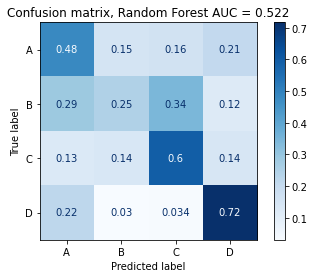

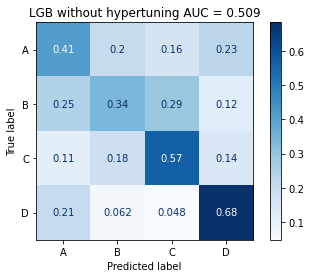

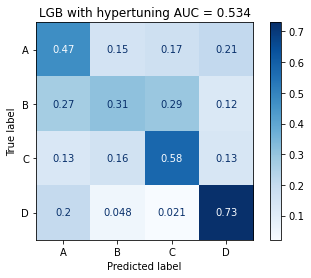

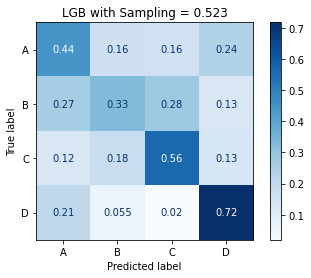

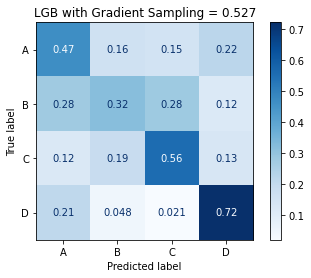

In [404]:
#from sklearn.metrics import plot_confusion_matrix

l_names = ['A', 'B', 'C', 'D'] 
auc_rf= accuracy_score(y_test, y_predict_test_rf)
auc_lgb= accuracy_score(y_test, y_pred_LGB)
auc_lgbh= accuracy_score(y_test, y_predict_test)
auc_gs= accuracy_score(y_test, y_test_gs)
auc_go= accuracy_score(y_test, y_test_go)
# Plot non-normalized confusion matrix
titles_options = [('Confusion matrix, Random Forest AUC = {:.3f}'.format(auc_rf),rfg.best_estimator_),
                  ('LGB without hypertuning AUC = {:.3f}'.format(auc_lgb),clf),
                  ('LGB with hypertuning AUC = {:.3f}'.format(auc_lgbh), clf_grid.best_estimator_),
                  ('LGB with Sampling = {:.3f}'.format(auc_gs), gs_grid.best_estimator_),
                  ('LGB with Gradient Sampling = {:.3f}'.format(auc_go), go_grid.best_estimator_)
                 ]
for title, classifier in titles_options:
    disp = plot_confusion_matrix(classifier, X_test_lgb, y_test, display_labels=l_names,
                                 cmap=plt.cm.Blues, 
                                 normalize='true')
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()